In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

DNot ='posNewTouchedData/-1,-1.csv'
D0_0 = 'posNewTouchedData/0,0.csv'
D0_3 = 'posNewTouchedData/0,3.csv'
D0_6 = 'posNewTouchedData/0,6.csv'
D0_7_5 = 'posNewTouchedData/0,7.5.csv'
D0_9 = 'posNewTouchedData/0,9.csv'
D0_12 = 'posNewTouchedData/0,12.csv'
D0_15 ='posNewTouchedData/0,15.csv'
D3_0 ='posNewTouchedData/3,0.csv'
D3_3 ='posNewTouchedData/3,3.csv'
D3_6 ='posNewTouchedData/3,6.csv'
D3_9 ='posNewTouchedData/3,9.csv'
D3_12 ='posNewTouchedData/3,12.csv'
D3_15 ='posNewTouchedData/3,15.csv'
D6_0 ='posNewTouchedData/6,0.csv'
D6_3 ='posNewTouchedData/6,3.csv'
D6_6 ='posNewTouchedData/6,6.csv'
D6_9 ='posNewTouchedData/6,9.csv'
D6_12 ='posNewTouchedData/6,12.csv'
D6_15 ='posNewTouchedData/6,15.csv'
D7_5_0 ='posNewTouchedData/7.5,0.csv'
D7_5_7_5 ='posNewTouchedData/7.5,7.5.csv'
D7_5_15 ='posNewTouchedData/7.5,15.csv'
D9_0 ='posNewTouchedData/9,0.csv'
D9_3 ='posNewTouchedData/9,3.csv'
D9_6 ='posNewTouchedData/9,6.csv'
D9_9 ='posNewTouchedData/9,9.csv'
D9_12 ='posNewTouchedData/9,12.csv'
D9_15 ='posNewTouchedData/9,15.csv'
D12_0 ='posNewTouchedData/12,0.csv'
D12_3 ='posNewTouchedData/12,3.csv'
D12_6 ='posNewTouchedData/12,6.csv'
D12_9 ='posNewTouchedData/12,9.csv'
D12_12 ='posNewTouchedData/12,12.csv'
D12_15 ='posNewTouchedData/12,15.csv'
D15_0 ='posNewTouchedData/15,0.csv'
D15_3 ='posNewTouchedData/15,3.csv'
D15_6 ='posNewTouchedData/15,6.csv'
D15_7_5 = 'posNewTouchedData/15,7.5.csv'
D15_9 ='posNewTouchedData/15,9.csv'
D15_12 ='posNewTouchedData/15,12.csv'
D15_15 = 'posNewTouchedData/15,15.csv'

#--------------------------
D_0_0='posNewTouchData2/0,0.csv'
D_0_7_5='posNewTouchData2/0,7.5.csv'
D_0_18='posNewTouchData2/0,18.csv'
D_Not='posNewTouchData2/-1,-1.csv'
D_3_3='posNewTouchData2/3,3.csv'
D_3_12='posNewTouchData2/3,12.csv'
D_7_5_0='posNewTouchData2/7.5,0.csv'
D_7_5_7_5='posNewTouchData2/7.5,7.5.csv'
D_7_5_15='posNewTouchData2/7.5,15.csv'
D_12_3='posNewTouchData2/12,3.csv'
D_12_12='posNewTouchData2/12,12.csv'
D_15_0='posNewTouchData2/15,0.csv'
D_15_7_5='posNewTouchData2/15,7.5.csv'
D_15_15='posNewTouchData2/15,15.csv'


# 51 datasets

#df1 = pd.read_csv(url)

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices()
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        #for gpu in gpus:
        #    tf.config.experimental.set_memory_growth(gpu, True)
        #logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        
        #tf_config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
        #tf_config.gpu_options.allow_growth = True
        #s = tf.compat.v1.Session(config=tf_config)
        
        #tf.compat.v1.keras.backend.set_session(s)
        
        logical_gpus = tf.config.list_physical_devices('GPU')
        
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_memory_growth(gpus[1], True)
        #tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
gpus

2 Physical GPUs, 1 Logical GPUs


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [4]:
def ratioSxSy(x):
    x=pressForce(x)
    Sxnum=-(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])-(1/x[x.columns[3]])    
    Synum=-(1/x[x.columns[0]])-(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    Sden=(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    x['Sx'] = Sxnum/Sden
    x['Sy'] = Synum/Sden
    return x

In [5]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [6]:
#dNot = pd.read_csv(DNot,header=None)
d_Not = pd.read_csv(D_Not,header=None)
#dataNot=pd.DataFrame.from_dict(dNot)
dataNot=pd.DataFrame.from_dict(d_Not)
NotDescribe=dataNot.describe()
NotDescribe=NotDescribe.transpose()
MeanNot=NotDescribe['mean']
StdNot=NotDescribe['std']
print("MeanNot:\n{}\nStdNot:\n{}".format(MeanNot,StdNot))

MeanNot:
0    326.27320
1     12.01916
2    310.34624
3    222.99996
4     -1.00000
5     -1.00000
Name: mean, dtype: float64
StdNot:
0    1.869022
1    0.065679
2    2.266601
3    0.002828
4    0.000000
5    0.000000
Name: std, dtype: float64


In [7]:
def lengthNew(x):
    return np.sqrt(np.sum(np.power(x,2),axis=1))

In [8]:
def pressForce(x):    
    x.iloc[:,:4] = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    force = lengthNew(x.iloc[:,:4])
    x['Fdist']=force
    return x

In [9]:
#t=lengthNew(pd.read_csv(D0_0,header=None))
t=pd.read_csv(D0_0,header=None)
t

,0,1,2,3,4,5
0,264.8,13.0,296.2,511.6,0,0
1,265.0,13.0,296.4,512.2,0,0
2,264.8,13.0,296.4,516.4,0,0
3,264.8,13.0,297.0,520.8,0,0
4,265.4,13.0,297.0,518.6,0,0
...,...,...,...,...,...,...
4995,246.8,18.0,340.8,903.2,0,0
4996,248.0,18.0,342.8,904.0,0,0
4997,250.0,18.0,342.4,904.8,0,0
4998,248.4,18.0,343.0,905.6,0,0


In [10]:
d0_0 = ratioSxSy(pd.read_csv(D0_0,header=None))
d0_3 = ratioSxSy(pd.read_csv(D0_3,header=None))
d0_6 = ratioSxSy(pd.read_csv(D0_6,header=None))
d0_7_5 = ChangetoMean(ratioSxSy(pd.read_csv(D0_7_5,header=None)), 5)
d0_9 = ratioSxSy(pd.read_csv(D0_9,header=None))
d0_12 = ratioSxSy(pd.read_csv(D0_12,header=None))
d0_15 = ratioSxSy(pd.read_csv(D0_15,header=None))
d3_0 = ratioSxSy(pd.read_csv(D3_0,header=None))
d3_3 = ratioSxSy(pd.read_csv(D3_3,header=None))
d3_6 =ratioSxSy(pd.read_csv(D3_6,header=None))
d3_9 = ratioSxSy(pd.read_csv(D3_9,header=None))
d3_12 = ratioSxSy(pd.read_csv(D3_12,header=None))
d3_15 = ratioSxSy(pd.read_csv(D3_15,header=None))
d6_0 = ratioSxSy(pd.read_csv(D6_0,header=None))
d6_3 = ratioSxSy(pd.read_csv(D6_3,header=None))
d6_6 = ratioSxSy(pd.read_csv(D6_6,header=None))
d6_9 = ratioSxSy(pd.read_csv(D6_9,header=None))
d6_12 = ratioSxSy(pd.read_csv(D6_12,header=None))
d6_15 = ratioSxSy(pd.read_csv(D6_15,header=None))
d7_5_0 = ratioSxSy(pd.read_csv(D7_5_0,header=None))
d7_5_7_5 = ratioSxSy(pd.read_csv(D7_5_7_5,header=None))
d7_5_15 = ratioSxSy(pd.read_csv(D7_5_15,header=None))
d9_0 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_3 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_6 = ratioSxSy(pd.read_csv(D9_6,header=None))
d9_9 = ratioSxSy(pd.read_csv(D9_9,header=None))
d9_12 = ratioSxSy(pd.read_csv(D9_12,header=None))
d9_15 = ratioSxSy(pd.read_csv(D9_15,header=None))
d12_0 = ratioSxSy(pd.read_csv(D12_0,header=None))
d12_3 = ratioSxSy(pd.read_csv(D12_3,header=None))
d12_6 = ratioSxSy(pd.read_csv(D12_6,header=None))
d12_9 = ratioSxSy(pd.read_csv(D12_9,header=None))
d12_12 = ratioSxSy(pd.read_csv(D12_12,header=None))
d12_15 = ratioSxSy(pd.read_csv(D12_15,header=None))
d15_0 = ratioSxSy(pd.read_csv(D15_0,header=None))
d15_3 = ratioSxSy(pd.read_csv(D15_3,header=None))
d15_6 = ratioSxSy(pd.read_csv(D15_6,header=None))
d15_7_5 = ratioSxSy(pd.read_csv(D15_7_5,header=None))
d15_9 = ratioSxSy(pd.read_csv(D15_9,header=None))
d15_12 = ratioSxSy(pd.read_csv(D15_12,header=None))
d15_15 = ratioSxSy(pd.read_csv(D15_15,header=None)) #42

#--------------------------
d_0_0 = ratioSxSy(pd.read_csv(D_0_0,header=None))
d_0_7_5 = ratioSxSy(pd.read_csv(D_0_7_5,header=None))
d_0_15 = ratioSxSy(changeLast(pd.read_csv(D_0_18,header=None),15))
d_3_3 = ratioSxSy(pd.read_csv(D_3_3,header=None))
d_3_12 = ratioSxSy(pd.read_csv(D_3_12,header=None))
d_7_5_0 = ratioSxSy(pd.read_csv(D_7_5_0,header=None))
d_7_5_7_5 = ratioSxSy(pd.read_csv(D_7_5_7_5,header=None))
d_7_5_15 = ratioSxSy(pd.read_csv(D_7_5_15,header=None))
d_12_3 = ratioSxSy(pd.read_csv(D_12_3,header=None))
d_12_12 = ratioSxSy(pd.read_csv(D_12_12,header=None))
d_15_0 = ratioSxSy(pd.read_csv(D_15_0,header=None))
d_15_7_5 = ratioSxSy(pd.read_csv(D_15_7_5,header=None))
d_15_15 = ratioSxSy(pd.read_csv(D_15_15,header=None)) #14

In [11]:
datasRaw = np.concatenate([d0_0, d0_3, d0_6, d0_7_5, d0_9, d0_12, d0_15, d3_0, d3_3, d3_6, d3_9, d3_12, d3_15, d6_0, d6_3, 
                           d6_6, d6_9, d6_12, d6_15, d7_5_0, d7_5_7_5, d7_5_15, d9_0, d9_3, d9_6, d9_9, d9_12,
                           d9_15, d12_0, d12_3, d12_6, d12_9, d12_12, d12_15, d15_0, d15_3, d15_6, d15_7_5, d15_9, 
                           d15_12, d15_15, d_0_0, d_0_7_5, d_0_15, d_3_3, d_3_12, d_7_5_0, d_7_5_7_5, d_7_5_15, 
                           d_12_3, d_12_12, d_15_0, d_15_7_5, d_15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(237500, 9)

In [12]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y","Fdist","Sx","Sy"]
datasFull.head()

,F0,F1,F2,F3,x,y,Fdist,Sx,Sy
0,-61.4732,0.98084,-14.14624,288.60004,0.0,0.0,295.414989,1.027354,-1.143637
1,-61.2732,0.98084,-13.94624,289.20004,0.0,0.0,295.950212,1.027514,-1.145986
2,-61.4732,0.98084,-13.94624,293.40004,0.0,0.0,300.096647,1.027507,-1.146091
3,-61.4732,0.98084,-13.34624,297.80004,0.0,0.0,304.372966,1.027711,-1.153633
4,-60.8732,0.98084,-13.34624,295.60004,0.0,0.0,302.099345,1.028006,-1.153601


In [13]:
FullDescribe=datasFull.describe()
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [14]:
print("Mean:\n{}\nStd:\n{}".format(MeandataFull,StddataFull))

Mean:
F0        82.669758
F1       126.453971
F2        83.662616
F3        85.599579
x          7.500000
y          7.436842
Fdist    311.351552
Sx        -0.157280
Sy         0.038515
Name: mean, dtype: float64
Std:
F0       106.510489
F1       204.268260
F2       128.503499
F3       149.708490
x          5.164159
y          5.236644
Fdist    179.464143
Sx        45.116143
Sy         9.908787
Name: std, dtype: float64


In [41]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.15)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [ ]:
dataTrain.head()

In [42]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [43]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [44]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    #x = layers.LSTM(128,input_shape=(1, 130))(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)  
    #x = layers.LSTM(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    #x = layers.Dense(130)(x)   
    #x = layers.LSTM(130)(x)
    #x = layers.BatchNormalization()(x)
    #x = tf.keras.activations.relu(x)    
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense = layers.LSTM(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [34]:
with tf.device('/gpu:0'):
    model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [35]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=12000,batch_size=1000, verbose=2, validation_data=(norm_test_X, test_Y), use_multiprocessing=True)

Epoch 1/5000
162/162 - 2s - loss: 7.2771 - x_output_loss: 4.1785 - y_output_loss: 3.0986 - x_output_root_mean_squared_error: 2.0441 - y_output_root_mean_squared_error: 1.7603 - val_loss: 26.3099 - val_x_output_loss: 15.1187 - val_y_output_loss: 11.1912 - val_x_output_root_mean_squared_error: 3.8883 - val_y_output_root_mean_squared_error: 3.3453
Epoch 2/5000
162/162 - 1s - loss: 2.9494 - x_output_loss: 1.9402 - y_output_loss: 1.0092 - x_output_root_mean_squared_error: 1.3929 - y_output_root_mean_squared_error: 1.0046 - val_loss: 7.4219 - val_x_output_loss: 5.3037 - val_y_output_loss: 2.1182 - val_x_output_root_mean_squared_error: 2.3030 - val_y_output_root_mean_squared_error: 1.4554
Epoch 3/5000
162/162 - 1s - loss: 2.4140 - x_output_loss: 1.6366 - y_output_loss: 0.7774 - x_output_root_mean_squared_error: 1.2793 - y_output_root_mean_squared_error: 0.8817 - val_loss: 8.1844 - val_x_output_loss: 5.5827 - val_y_output_loss: 2.6017 - val_x_output_root_mean_squared_error: 2.3628 - val_y_outp

Epoch 25/5000
162/162 - 1s - loss: 1.1434 - x_output_loss: 0.8017 - y_output_loss: 0.3418 - x_output_root_mean_squared_error: 0.8954 - y_output_root_mean_squared_error: 0.5846 - val_loss: 3.0441 - val_x_output_loss: 2.1527 - val_y_output_loss: 0.8915 - val_x_output_root_mean_squared_error: 1.4672 - val_y_output_root_mean_squared_error: 0.9442
Epoch 26/5000
162/162 - 1s - loss: 1.1752 - x_output_loss: 0.8167 - y_output_loss: 0.3585 - x_output_root_mean_squared_error: 0.9037 - y_output_root_mean_squared_error: 0.5988 - val_loss: 2.7753 - val_x_output_loss: 1.8100 - val_y_output_loss: 0.9653 - val_x_output_root_mean_squared_error: 1.3454 - val_y_output_root_mean_squared_error: 0.9825
Epoch 27/5000
162/162 - 1s - loss: 1.1112 - x_output_loss: 0.7662 - y_output_loss: 0.3450 - x_output_root_mean_squared_error: 0.8753 - y_output_root_mean_squared_error: 0.5874 - val_loss: 2.6656 - val_x_output_loss: 1.9449 - val_y_output_loss: 0.7207 - val_x_output_root_mean_squared_error: 1.3946 - val_y_outp

Epoch 49/5000
162/162 - 1s - loss: 0.8848 - x_output_loss: 0.6158 - y_output_loss: 0.2690 - x_output_root_mean_squared_error: 0.7847 - y_output_root_mean_squared_error: 0.5187 - val_loss: 2.2113 - val_x_output_loss: 1.5024 - val_y_output_loss: 0.7089 - val_x_output_root_mean_squared_error: 1.2257 - val_y_output_root_mean_squared_error: 0.8420
Epoch 50/5000
162/162 - 1s - loss: 0.8996 - x_output_loss: 0.6315 - y_output_loss: 0.2680 - x_output_root_mean_squared_error: 0.7947 - y_output_root_mean_squared_error: 0.5177 - val_loss: 1.5572 - val_x_output_loss: 0.7795 - val_y_output_loss: 0.7777 - val_x_output_root_mean_squared_error: 0.8829 - val_y_output_root_mean_squared_error: 0.8818
Epoch 51/5000
162/162 - 1s - loss: 0.8814 - x_output_loss: 0.6197 - y_output_loss: 0.2617 - x_output_root_mean_squared_error: 0.7872 - y_output_root_mean_squared_error: 0.5115 - val_loss: 1.4322 - val_x_output_loss: 0.8777 - val_y_output_loss: 0.5545 - val_x_output_root_mean_squared_error: 0.9369 - val_y_outp

Epoch 73/5000
162/162 - 1s - loss: 0.7043 - x_output_loss: 0.5058 - y_output_loss: 0.1985 - x_output_root_mean_squared_error: 0.7112 - y_output_root_mean_squared_error: 0.4455 - val_loss: 2.0424 - val_x_output_loss: 1.4382 - val_y_output_loss: 0.6042 - val_x_output_root_mean_squared_error: 1.1992 - val_y_output_root_mean_squared_error: 0.7773
Epoch 74/5000
162/162 - 1s - loss: 0.7622 - x_output_loss: 0.5447 - y_output_loss: 0.2175 - x_output_root_mean_squared_error: 0.7380 - y_output_root_mean_squared_error: 0.4663 - val_loss: 1.5669 - val_x_output_loss: 1.0272 - val_y_output_loss: 0.5398 - val_x_output_root_mean_squared_error: 1.0135 - val_y_output_root_mean_squared_error: 0.7347
Epoch 75/5000
162/162 - 1s - loss: 0.7257 - x_output_loss: 0.5164 - y_output_loss: 0.2093 - x_output_root_mean_squared_error: 0.7186 - y_output_root_mean_squared_error: 0.4575 - val_loss: 1.7199 - val_x_output_loss: 1.1238 - val_y_output_loss: 0.5961 - val_x_output_root_mean_squared_error: 1.0601 - val_y_outp

Epoch 97/5000
162/162 - 1s - loss: 0.6686 - x_output_loss: 0.4828 - y_output_loss: 0.1858 - x_output_root_mean_squared_error: 0.6948 - y_output_root_mean_squared_error: 0.4310 - val_loss: 1.6235 - val_x_output_loss: 1.0081 - val_y_output_loss: 0.6154 - val_x_output_root_mean_squared_error: 1.0041 - val_y_output_root_mean_squared_error: 0.7845
Epoch 98/5000
162/162 - 1s - loss: 0.6822 - x_output_loss: 0.4932 - y_output_loss: 0.1890 - x_output_root_mean_squared_error: 0.7023 - y_output_root_mean_squared_error: 0.4348 - val_loss: 1.4478 - val_x_output_loss: 0.8213 - val_y_output_loss: 0.6264 - val_x_output_root_mean_squared_error: 0.9063 - val_y_output_root_mean_squared_error: 0.7915
Epoch 99/5000
162/162 - 1s - loss: 0.6941 - x_output_loss: 0.4997 - y_output_loss: 0.1944 - x_output_root_mean_squared_error: 0.7069 - y_output_root_mean_squared_error: 0.4409 - val_loss: 1.6929 - val_x_output_loss: 0.9463 - val_y_output_loss: 0.7465 - val_x_output_root_mean_squared_error: 0.9728 - val_y_outp

Epoch 121/5000
162/162 - 1s - loss: 0.6095 - x_output_loss: 0.4406 - y_output_loss: 0.1689 - x_output_root_mean_squared_error: 0.6637 - y_output_root_mean_squared_error: 0.4110 - val_loss: 1.7901 - val_x_output_loss: 0.9373 - val_y_output_loss: 0.8527 - val_x_output_root_mean_squared_error: 0.9682 - val_y_output_root_mean_squared_error: 0.9234
Epoch 122/5000
162/162 - 1s - loss: 0.6215 - x_output_loss: 0.4533 - y_output_loss: 0.1682 - x_output_root_mean_squared_error: 0.6732 - y_output_root_mean_squared_error: 0.4102 - val_loss: 1.6413 - val_x_output_loss: 1.0624 - val_y_output_loss: 0.5789 - val_x_output_root_mean_squared_error: 1.0307 - val_y_output_root_mean_squared_error: 0.7609
Epoch 123/5000
162/162 - 1s - loss: 0.6232 - x_output_loss: 0.4498 - y_output_loss: 0.1734 - x_output_root_mean_squared_error: 0.6707 - y_output_root_mean_squared_error: 0.4164 - val_loss: 1.4320 - val_x_output_loss: 0.9369 - val_y_output_loss: 0.4951 - val_x_output_root_mean_squared_error: 0.9679 - val_y_o

Epoch 145/5000
162/162 - 1s - loss: 0.5821 - x_output_loss: 0.4227 - y_output_loss: 0.1594 - x_output_root_mean_squared_error: 0.6501 - y_output_root_mean_squared_error: 0.3993 - val_loss: 1.6475 - val_x_output_loss: 1.0941 - val_y_output_loss: 0.5534 - val_x_output_root_mean_squared_error: 1.0460 - val_y_output_root_mean_squared_error: 0.7439
Epoch 146/5000
162/162 - 1s - loss: 0.5875 - x_output_loss: 0.4304 - y_output_loss: 0.1571 - x_output_root_mean_squared_error: 0.6560 - y_output_root_mean_squared_error: 0.3964 - val_loss: 1.1650 - val_x_output_loss: 0.6698 - val_y_output_loss: 0.4952 - val_x_output_root_mean_squared_error: 0.8184 - val_y_output_root_mean_squared_error: 0.7037
Epoch 147/5000
162/162 - 1s - loss: 0.5873 - x_output_loss: 0.4303 - y_output_loss: 0.1570 - x_output_root_mean_squared_error: 0.6560 - y_output_root_mean_squared_error: 0.3963 - val_loss: 1.0190 - val_x_output_loss: 0.6264 - val_y_output_loss: 0.3926 - val_x_output_root_mean_squared_error: 0.7914 - val_y_o

Epoch 169/5000
162/162 - 2s - loss: 0.5819 - x_output_loss: 0.4275 - y_output_loss: 0.1543 - x_output_root_mean_squared_error: 0.6538 - y_output_root_mean_squared_error: 0.3929 - val_loss: 1.9160 - val_x_output_loss: 1.1723 - val_y_output_loss: 0.7437 - val_x_output_root_mean_squared_error: 1.0827 - val_y_output_root_mean_squared_error: 0.8624
Epoch 170/5000
162/162 - 2s - loss: 0.5548 - x_output_loss: 0.4050 - y_output_loss: 0.1498 - x_output_root_mean_squared_error: 0.6364 - y_output_root_mean_squared_error: 0.3871 - val_loss: 2.0814 - val_x_output_loss: 1.3044 - val_y_output_loss: 0.7770 - val_x_output_root_mean_squared_error: 1.1421 - val_y_output_root_mean_squared_error: 0.8815
Epoch 171/5000
162/162 - 2s - loss: 0.5592 - x_output_loss: 0.4093 - y_output_loss: 0.1498 - x_output_root_mean_squared_error: 0.6398 - y_output_root_mean_squared_error: 0.3871 - val_loss: 2.1346 - val_x_output_loss: 1.2740 - val_y_output_loss: 0.8606 - val_x_output_root_mean_squared_error: 1.1287 - val_y_o

Epoch 193/5000
162/162 - 2s - loss: 0.5223 - x_output_loss: 0.3831 - y_output_loss: 0.1392 - x_output_root_mean_squared_error: 0.6190 - y_output_root_mean_squared_error: 0.3731 - val_loss: 2.5765 - val_x_output_loss: 1.6365 - val_y_output_loss: 0.9400 - val_x_output_root_mean_squared_error: 1.2793 - val_y_output_root_mean_squared_error: 0.9695
Epoch 194/5000
162/162 - 1s - loss: 0.5153 - x_output_loss: 0.3792 - y_output_loss: 0.1361 - x_output_root_mean_squared_error: 0.6158 - y_output_root_mean_squared_error: 0.3689 - val_loss: 2.1396 - val_x_output_loss: 1.2879 - val_y_output_loss: 0.8517 - val_x_output_root_mean_squared_error: 1.1349 - val_y_output_root_mean_squared_error: 0.9229
Epoch 195/5000
162/162 - 1s - loss: 0.5134 - x_output_loss: 0.3765 - y_output_loss: 0.1370 - x_output_root_mean_squared_error: 0.6136 - y_output_root_mean_squared_error: 0.3701 - val_loss: 1.8735 - val_x_output_loss: 1.0512 - val_y_output_loss: 0.8223 - val_x_output_root_mean_squared_error: 1.0253 - val_y_o

Epoch 217/5000
162/162 - 2s - loss: 0.5109 - x_output_loss: 0.3764 - y_output_loss: 0.1345 - x_output_root_mean_squared_error: 0.6135 - y_output_root_mean_squared_error: 0.3668 - val_loss: 1.3887 - val_x_output_loss: 0.8109 - val_y_output_loss: 0.5778 - val_x_output_root_mean_squared_error: 0.9005 - val_y_output_root_mean_squared_error: 0.7601
Epoch 218/5000
162/162 - 2s - loss: 0.5046 - x_output_loss: 0.3723 - y_output_loss: 0.1322 - x_output_root_mean_squared_error: 0.6102 - y_output_root_mean_squared_error: 0.3636 - val_loss: 1.2441 - val_x_output_loss: 0.6049 - val_y_output_loss: 0.6392 - val_x_output_root_mean_squared_error: 0.7777 - val_y_output_root_mean_squared_error: 0.7995
Epoch 219/5000
162/162 - 2s - loss: 0.5187 - x_output_loss: 0.3825 - y_output_loss: 0.1362 - x_output_root_mean_squared_error: 0.6185 - y_output_root_mean_squared_error: 0.3691 - val_loss: 1.4281 - val_x_output_loss: 1.0301 - val_y_output_loss: 0.3980 - val_x_output_root_mean_squared_error: 1.0149 - val_y_o

Epoch 241/5000
162/162 - 2s - loss: 0.4937 - x_output_loss: 0.3615 - y_output_loss: 0.1321 - x_output_root_mean_squared_error: 0.6013 - y_output_root_mean_squared_error: 0.3635 - val_loss: 1.3662 - val_x_output_loss: 0.8370 - val_y_output_loss: 0.5292 - val_x_output_root_mean_squared_error: 0.9149 - val_y_output_root_mean_squared_error: 0.7275
Epoch 242/5000
162/162 - 2s - loss: 0.4741 - x_output_loss: 0.3463 - y_output_loss: 0.1278 - x_output_root_mean_squared_error: 0.5884 - y_output_root_mean_squared_error: 0.3575 - val_loss: 1.5701 - val_x_output_loss: 0.9269 - val_y_output_loss: 0.6432 - val_x_output_root_mean_squared_error: 0.9627 - val_y_output_root_mean_squared_error: 0.8020
Epoch 243/5000
162/162 - 2s - loss: 0.4936 - x_output_loss: 0.3632 - y_output_loss: 0.1304 - x_output_root_mean_squared_error: 0.6027 - y_output_root_mean_squared_error: 0.3610 - val_loss: 1.8402 - val_x_output_loss: 1.1423 - val_y_output_loss: 0.6978 - val_x_output_root_mean_squared_error: 1.0688 - val_y_o

Epoch 265/5000
162/162 - 2s - loss: 0.4908 - x_output_loss: 0.3623 - y_output_loss: 0.1284 - x_output_root_mean_squared_error: 0.6019 - y_output_root_mean_squared_error: 0.3584 - val_loss: 0.8047 - val_x_output_loss: 0.4992 - val_y_output_loss: 0.3055 - val_x_output_root_mean_squared_error: 0.7065 - val_y_output_root_mean_squared_error: 0.5527
Epoch 266/5000
162/162 - 2s - loss: 0.4858 - x_output_loss: 0.3596 - y_output_loss: 0.1262 - x_output_root_mean_squared_error: 0.5997 - y_output_root_mean_squared_error: 0.3553 - val_loss: 0.9018 - val_x_output_loss: 0.6017 - val_y_output_loss: 0.3001 - val_x_output_root_mean_squared_error: 0.7757 - val_y_output_root_mean_squared_error: 0.5478
Epoch 267/5000
162/162 - 2s - loss: 0.4665 - x_output_loss: 0.3446 - y_output_loss: 0.1219 - x_output_root_mean_squared_error: 0.5870 - y_output_root_mean_squared_error: 0.3491 - val_loss: 0.7655 - val_x_output_loss: 0.4856 - val_y_output_loss: 0.2799 - val_x_output_root_mean_squared_error: 0.6969 - val_y_o

Epoch 289/5000
162/162 - 2s - loss: 0.4529 - x_output_loss: 0.3351 - y_output_loss: 0.1179 - x_output_root_mean_squared_error: 0.5788 - y_output_root_mean_squared_error: 0.3433 - val_loss: 0.9087 - val_x_output_loss: 0.5816 - val_y_output_loss: 0.3270 - val_x_output_root_mean_squared_error: 0.7627 - val_y_output_root_mean_squared_error: 0.5718
Epoch 290/5000
162/162 - 2s - loss: 0.4441 - x_output_loss: 0.3284 - y_output_loss: 0.1157 - x_output_root_mean_squared_error: 0.5730 - y_output_root_mean_squared_error: 0.3401 - val_loss: 1.0805 - val_x_output_loss: 0.6989 - val_y_output_loss: 0.3816 - val_x_output_root_mean_squared_error: 0.8360 - val_y_output_root_mean_squared_error: 0.6177
Epoch 291/5000
162/162 - 2s - loss: 0.4638 - x_output_loss: 0.3414 - y_output_loss: 0.1223 - x_output_root_mean_squared_error: 0.5843 - y_output_root_mean_squared_error: 0.3497 - val_loss: 0.9310 - val_x_output_loss: 0.6277 - val_y_output_loss: 0.3034 - val_x_output_root_mean_squared_error: 0.7923 - val_y_o

Epoch 313/5000
162/162 - 2s - loss: 0.4453 - x_output_loss: 0.3309 - y_output_loss: 0.1143 - x_output_root_mean_squared_error: 0.5753 - y_output_root_mean_squared_error: 0.3381 - val_loss: 0.7861 - val_x_output_loss: 0.5386 - val_y_output_loss: 0.2475 - val_x_output_root_mean_squared_error: 0.7339 - val_y_output_root_mean_squared_error: 0.4975
Epoch 314/5000
162/162 - 2s - loss: 0.4336 - x_output_loss: 0.3210 - y_output_loss: 0.1125 - x_output_root_mean_squared_error: 0.5666 - y_output_root_mean_squared_error: 0.3354 - val_loss: 0.6833 - val_x_output_loss: 0.4768 - val_y_output_loss: 0.2065 - val_x_output_root_mean_squared_error: 0.6905 - val_y_output_root_mean_squared_error: 0.4544
Epoch 315/5000
162/162 - 2s - loss: 0.4377 - x_output_loss: 0.3236 - y_output_loss: 0.1141 - x_output_root_mean_squared_error: 0.5689 - y_output_root_mean_squared_error: 0.3378 - val_loss: 0.7712 - val_x_output_loss: 0.5260 - val_y_output_loss: 0.2452 - val_x_output_root_mean_squared_error: 0.7253 - val_y_o

Epoch 337/5000
162/162 - 2s - loss: 0.4435 - x_output_loss: 0.3288 - y_output_loss: 0.1147 - x_output_root_mean_squared_error: 0.5734 - y_output_root_mean_squared_error: 0.3387 - val_loss: 1.2558 - val_x_output_loss: 0.8160 - val_y_output_loss: 0.4398 - val_x_output_root_mean_squared_error: 0.9033 - val_y_output_root_mean_squared_error: 0.6632
Epoch 338/5000
162/162 - 2s - loss: 0.4265 - x_output_loss: 0.3162 - y_output_loss: 0.1103 - x_output_root_mean_squared_error: 0.5623 - y_output_root_mean_squared_error: 0.3322 - val_loss: 0.6124 - val_x_output_loss: 0.3749 - val_y_output_loss: 0.2375 - val_x_output_root_mean_squared_error: 0.6123 - val_y_output_root_mean_squared_error: 0.4874
Epoch 339/5000
162/162 - 2s - loss: 0.4358 - x_output_loss: 0.3246 - y_output_loss: 0.1112 - x_output_root_mean_squared_error: 0.5698 - y_output_root_mean_squared_error: 0.3335 - val_loss: 0.8276 - val_x_output_loss: 0.5167 - val_y_output_loss: 0.3108 - val_x_output_root_mean_squared_error: 0.7189 - val_y_o

Epoch 361/5000
162/162 - 2s - loss: 0.4103 - x_output_loss: 0.3046 - y_output_loss: 0.1057 - x_output_root_mean_squared_error: 0.5519 - y_output_root_mean_squared_error: 0.3251 - val_loss: 0.7478 - val_x_output_loss: 0.5605 - val_y_output_loss: 0.1873 - val_x_output_root_mean_squared_error: 0.7487 - val_y_output_root_mean_squared_error: 0.4327
Epoch 362/5000
162/162 - 2s - loss: 0.4161 - x_output_loss: 0.3087 - y_output_loss: 0.1074 - x_output_root_mean_squared_error: 0.5557 - y_output_root_mean_squared_error: 0.3277 - val_loss: 0.6059 - val_x_output_loss: 0.4157 - val_y_output_loss: 0.1902 - val_x_output_root_mean_squared_error: 0.6448 - val_y_output_root_mean_squared_error: 0.4361
Epoch 363/5000
162/162 - 2s - loss: 0.4132 - x_output_loss: 0.3074 - y_output_loss: 0.1057 - x_output_root_mean_squared_error: 0.5545 - y_output_root_mean_squared_error: 0.3252 - val_loss: 0.8191 - val_x_output_loss: 0.5518 - val_y_output_loss: 0.2673 - val_x_output_root_mean_squared_error: 0.7428 - val_y_o

Epoch 385/5000
162/162 - 2s - loss: 0.4197 - x_output_loss: 0.3097 - y_output_loss: 0.1100 - x_output_root_mean_squared_error: 0.5565 - y_output_root_mean_squared_error: 0.3316 - val_loss: 0.6076 - val_x_output_loss: 0.4452 - val_y_output_loss: 0.1624 - val_x_output_root_mean_squared_error: 0.6672 - val_y_output_root_mean_squared_error: 0.4030
Epoch 386/5000
162/162 - 2s - loss: 0.4113 - x_output_loss: 0.3059 - y_output_loss: 0.1054 - x_output_root_mean_squared_error: 0.5530 - y_output_root_mean_squared_error: 0.3247 - val_loss: 0.6576 - val_x_output_loss: 0.5098 - val_y_output_loss: 0.1478 - val_x_output_root_mean_squared_error: 0.7140 - val_y_output_root_mean_squared_error: 0.3844
Epoch 387/5000
162/162 - 2s - loss: 0.4154 - x_output_loss: 0.3084 - y_output_loss: 0.1069 - x_output_root_mean_squared_error: 0.5554 - y_output_root_mean_squared_error: 0.3270 - val_loss: 0.6745 - val_x_output_loss: 0.5132 - val_y_output_loss: 0.1613 - val_x_output_root_mean_squared_error: 0.7164 - val_y_o

Epoch 409/5000
162/162 - 2s - loss: 0.3985 - x_output_loss: 0.2960 - y_output_loss: 0.1025 - x_output_root_mean_squared_error: 0.5441 - y_output_root_mean_squared_error: 0.3201 - val_loss: 0.9158 - val_x_output_loss: 0.6565 - val_y_output_loss: 0.2594 - val_x_output_root_mean_squared_error: 0.8102 - val_y_output_root_mean_squared_error: 0.5093
Epoch 410/5000
162/162 - 2s - loss: 0.4057 - x_output_loss: 0.3026 - y_output_loss: 0.1031 - x_output_root_mean_squared_error: 0.5501 - y_output_root_mean_squared_error: 0.3211 - val_loss: 0.8672 - val_x_output_loss: 0.6662 - val_y_output_loss: 0.2010 - val_x_output_root_mean_squared_error: 0.8162 - val_y_output_root_mean_squared_error: 0.4483
Epoch 411/5000
162/162 - 2s - loss: 0.4180 - x_output_loss: 0.3092 - y_output_loss: 0.1088 - x_output_root_mean_squared_error: 0.5561 - y_output_root_mean_squared_error: 0.3298 - val_loss: 1.3559 - val_x_output_loss: 1.1324 - val_y_output_loss: 0.2235 - val_x_output_root_mean_squared_error: 1.0641 - val_y_o

Epoch 433/5000
162/162 - 2s - loss: 0.3936 - x_output_loss: 0.2917 - y_output_loss: 0.1019 - x_output_root_mean_squared_error: 0.5401 - y_output_root_mean_squared_error: 0.3192 - val_loss: 1.4182 - val_x_output_loss: 1.2427 - val_y_output_loss: 0.1755 - val_x_output_root_mean_squared_error: 1.1147 - val_y_output_root_mean_squared_error: 0.4190
Epoch 434/5000
162/162 - 2s - loss: 0.3888 - x_output_loss: 0.2907 - y_output_loss: 0.0982 - x_output_root_mean_squared_error: 0.5391 - y_output_root_mean_squared_error: 0.3133 - val_loss: 1.5464 - val_x_output_loss: 1.3306 - val_y_output_loss: 0.2157 - val_x_output_root_mean_squared_error: 1.1535 - val_y_output_root_mean_squared_error: 0.4645
Epoch 435/5000
162/162 - 2s - loss: 0.5257 - x_output_loss: 0.3828 - y_output_loss: 0.1428 - x_output_root_mean_squared_error: 0.6187 - y_output_root_mean_squared_error: 0.3779 - val_loss: 3.0372 - val_x_output_loss: 1.8489 - val_y_output_loss: 1.1883 - val_x_output_root_mean_squared_error: 1.3597 - val_y_o

Epoch 457/5000
162/162 - 2s - loss: 0.3920 - x_output_loss: 0.2926 - y_output_loss: 0.0994 - x_output_root_mean_squared_error: 0.5410 - y_output_root_mean_squared_error: 0.3152 - val_loss: 0.7337 - val_x_output_loss: 0.6207 - val_y_output_loss: 0.1130 - val_x_output_root_mean_squared_error: 0.7879 - val_y_output_root_mean_squared_error: 0.3361
Epoch 458/5000
162/162 - 2s - loss: 0.3809 - x_output_loss: 0.2828 - y_output_loss: 0.0980 - x_output_root_mean_squared_error: 0.5318 - y_output_root_mean_squared_error: 0.3131 - val_loss: 0.7528 - val_x_output_loss: 0.6377 - val_y_output_loss: 0.1151 - val_x_output_root_mean_squared_error: 0.7986 - val_y_output_root_mean_squared_error: 0.3392
Epoch 459/5000
162/162 - 2s - loss: 0.3863 - x_output_loss: 0.2871 - y_output_loss: 0.0993 - x_output_root_mean_squared_error: 0.5358 - y_output_root_mean_squared_error: 0.3151 - val_loss: 0.6704 - val_x_output_loss: 0.5355 - val_y_output_loss: 0.1348 - val_x_output_root_mean_squared_error: 0.7318 - val_y_o

Epoch 481/5000
162/162 - 2s - loss: 0.4165 - x_output_loss: 0.3062 - y_output_loss: 0.1103 - x_output_root_mean_squared_error: 0.5534 - y_output_root_mean_squared_error: 0.3321 - val_loss: 1.3326 - val_x_output_loss: 1.0766 - val_y_output_loss: 0.2560 - val_x_output_root_mean_squared_error: 1.0376 - val_y_output_root_mean_squared_error: 0.5059
Epoch 482/5000
162/162 - 2s - loss: 0.4134 - x_output_loss: 0.3056 - y_output_loss: 0.1078 - x_output_root_mean_squared_error: 0.5528 - y_output_root_mean_squared_error: 0.3283 - val_loss: 0.7127 - val_x_output_loss: 0.5115 - val_y_output_loss: 0.2012 - val_x_output_root_mean_squared_error: 0.7152 - val_y_output_root_mean_squared_error: 0.4486
Epoch 483/5000
162/162 - 2s - loss: 0.3864 - x_output_loss: 0.2856 - y_output_loss: 0.1009 - x_output_root_mean_squared_error: 0.5344 - y_output_root_mean_squared_error: 0.3176 - val_loss: 0.4978 - val_x_output_loss: 0.3584 - val_y_output_loss: 0.1393 - val_x_output_root_mean_squared_error: 0.5987 - val_y_o

Epoch 505/5000
162/162 - 2s - loss: 0.3706 - x_output_loss: 0.2780 - y_output_loss: 0.0926 - x_output_root_mean_squared_error: 0.5273 - y_output_root_mean_squared_error: 0.3043 - val_loss: 0.7935 - val_x_output_loss: 0.6735 - val_y_output_loss: 0.1200 - val_x_output_root_mean_squared_error: 0.8207 - val_y_output_root_mean_squared_error: 0.3464
Epoch 506/5000
162/162 - 2s - loss: 0.3667 - x_output_loss: 0.2736 - y_output_loss: 0.0931 - x_output_root_mean_squared_error: 0.5231 - y_output_root_mean_squared_error: 0.3050 - val_loss: 0.8645 - val_x_output_loss: 0.7059 - val_y_output_loss: 0.1586 - val_x_output_root_mean_squared_error: 0.8402 - val_y_output_root_mean_squared_error: 0.3983
Epoch 507/5000
162/162 - 2s - loss: 0.3580 - x_output_loss: 0.2666 - y_output_loss: 0.0913 - x_output_root_mean_squared_error: 0.5164 - y_output_root_mean_squared_error: 0.3022 - val_loss: 0.8274 - val_x_output_loss: 0.6726 - val_y_output_loss: 0.1548 - val_x_output_root_mean_squared_error: 0.8201 - val_y_o

Epoch 529/5000
162/162 - 2s - loss: 0.3641 - x_output_loss: 0.2710 - y_output_loss: 0.0931 - x_output_root_mean_squared_error: 0.5205 - y_output_root_mean_squared_error: 0.3051 - val_loss: 0.7689 - val_x_output_loss: 0.6126 - val_y_output_loss: 0.1563 - val_x_output_root_mean_squared_error: 0.7827 - val_y_output_root_mean_squared_error: 0.3954
Epoch 530/5000
162/162 - 2s - loss: 0.3560 - x_output_loss: 0.2670 - y_output_loss: 0.0890 - x_output_root_mean_squared_error: 0.5167 - y_output_root_mean_squared_error: 0.2984 - val_loss: 0.6296 - val_x_output_loss: 0.4965 - val_y_output_loss: 0.1331 - val_x_output_root_mean_squared_error: 0.7046 - val_y_output_root_mean_squared_error: 0.3649
Epoch 531/5000
162/162 - 2s - loss: 0.3485 - x_output_loss: 0.2602 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5101 - y_output_root_mean_squared_error: 0.2971 - val_loss: 0.8186 - val_x_output_loss: 0.7079 - val_y_output_loss: 0.1107 - val_x_output_root_mean_squared_error: 0.8414 - val_y_o

Epoch 553/5000
162/162 - 2s - loss: 0.3894 - x_output_loss: 0.2872 - y_output_loss: 0.1022 - x_output_root_mean_squared_error: 0.5359 - y_output_root_mean_squared_error: 0.3197 - val_loss: 0.5574 - val_x_output_loss: 0.4283 - val_y_output_loss: 0.1291 - val_x_output_root_mean_squared_error: 0.6545 - val_y_output_root_mean_squared_error: 0.3592
Epoch 554/5000
162/162 - 2s - loss: 0.3770 - x_output_loss: 0.2812 - y_output_loss: 0.0958 - x_output_root_mean_squared_error: 0.5303 - y_output_root_mean_squared_error: 0.3095 - val_loss: 0.5113 - val_x_output_loss: 0.3821 - val_y_output_loss: 0.1292 - val_x_output_root_mean_squared_error: 0.6181 - val_y_output_root_mean_squared_error: 0.3595
Epoch 555/5000
162/162 - 2s - loss: 0.3829 - x_output_loss: 0.2867 - y_output_loss: 0.0962 - x_output_root_mean_squared_error: 0.5354 - y_output_root_mean_squared_error: 0.3102 - val_loss: 0.7187 - val_x_output_loss: 0.5734 - val_y_output_loss: 0.1454 - val_x_output_root_mean_squared_error: 0.7572 - val_y_o

Epoch 577/5000
162/162 - 2s - loss: 0.3425 - x_output_loss: 0.2571 - y_output_loss: 0.0854 - x_output_root_mean_squared_error: 0.5070 - y_output_root_mean_squared_error: 0.2923 - val_loss: 0.5182 - val_x_output_loss: 0.3990 - val_y_output_loss: 0.1192 - val_x_output_root_mean_squared_error: 0.6317 - val_y_output_root_mean_squared_error: 0.3452
Epoch 578/5000
162/162 - 2s - loss: 0.3535 - x_output_loss: 0.2641 - y_output_loss: 0.0894 - x_output_root_mean_squared_error: 0.5139 - y_output_root_mean_squared_error: 0.2989 - val_loss: 0.6405 - val_x_output_loss: 0.4708 - val_y_output_loss: 0.1696 - val_x_output_root_mean_squared_error: 0.6862 - val_y_output_root_mean_squared_error: 0.4119
Epoch 579/5000
162/162 - 2s - loss: 0.3551 - x_output_loss: 0.2660 - y_output_loss: 0.0892 - x_output_root_mean_squared_error: 0.5157 - y_output_root_mean_squared_error: 0.2986 - val_loss: 0.5541 - val_x_output_loss: 0.4220 - val_y_output_loss: 0.1322 - val_x_output_root_mean_squared_error: 0.6496 - val_y_o

Epoch 601/5000
162/162 - 2s - loss: 0.3490 - x_output_loss: 0.2613 - y_output_loss: 0.0877 - x_output_root_mean_squared_error: 0.5112 - y_output_root_mean_squared_error: 0.2962 - val_loss: 0.6483 - val_x_output_loss: 0.5434 - val_y_output_loss: 0.1049 - val_x_output_root_mean_squared_error: 0.7372 - val_y_output_root_mean_squared_error: 0.3239
Epoch 602/5000
162/162 - 2s - loss: 0.3516 - x_output_loss: 0.2637 - y_output_loss: 0.0879 - x_output_root_mean_squared_error: 0.5136 - y_output_root_mean_squared_error: 0.2965 - val_loss: 1.1253 - val_x_output_loss: 0.9449 - val_y_output_loss: 0.1804 - val_x_output_root_mean_squared_error: 0.9720 - val_y_output_root_mean_squared_error: 0.4247
Epoch 603/5000
162/162 - 2s - loss: 0.3345 - x_output_loss: 0.2496 - y_output_loss: 0.0849 - x_output_root_mean_squared_error: 0.4996 - y_output_root_mean_squared_error: 0.2914 - val_loss: 1.0159 - val_x_output_loss: 0.8588 - val_y_output_loss: 0.1571 - val_x_output_root_mean_squared_error: 0.9267 - val_y_o

Epoch 625/5000
162/162 - 2s - loss: 0.3399 - x_output_loss: 0.2536 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5036 - y_output_root_mean_squared_error: 0.2938 - val_loss: 0.7694 - val_x_output_loss: 0.6139 - val_y_output_loss: 0.1556 - val_x_output_root_mean_squared_error: 0.7835 - val_y_output_root_mean_squared_error: 0.3944
Epoch 626/5000
162/162 - 2s - loss: 0.3347 - x_output_loss: 0.2507 - y_output_loss: 0.0840 - x_output_root_mean_squared_error: 0.5007 - y_output_root_mean_squared_error: 0.2899 - val_loss: 0.8390 - val_x_output_loss: 0.6638 - val_y_output_loss: 0.1752 - val_x_output_root_mean_squared_error: 0.8147 - val_y_output_root_mean_squared_error: 0.4185
Epoch 627/5000
162/162 - 2s - loss: 0.3397 - x_output_loss: 0.2534 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5034 - y_output_root_mean_squared_error: 0.2938 - val_loss: 1.3744 - val_x_output_loss: 1.0136 - val_y_output_loss: 0.3608 - val_x_output_root_mean_squared_error: 1.0068 - val_y_o

Epoch 649/5000
162/162 - 2s - loss: 0.3327 - x_output_loss: 0.2501 - y_output_loss: 0.0826 - x_output_root_mean_squared_error: 0.5001 - y_output_root_mean_squared_error: 0.2874 - val_loss: 0.6986 - val_x_output_loss: 0.5650 - val_y_output_loss: 0.1336 - val_x_output_root_mean_squared_error: 0.7517 - val_y_output_root_mean_squared_error: 0.3655
Epoch 650/5000
162/162 - 2s - loss: 0.3368 - x_output_loss: 0.2527 - y_output_loss: 0.0841 - x_output_root_mean_squared_error: 0.5027 - y_output_root_mean_squared_error: 0.2899 - val_loss: 0.9745 - val_x_output_loss: 0.7753 - val_y_output_loss: 0.1992 - val_x_output_root_mean_squared_error: 0.8805 - val_y_output_root_mean_squared_error: 0.4463
Epoch 651/5000
162/162 - 2s - loss: 0.3394 - x_output_loss: 0.2536 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5036 - y_output_root_mean_squared_error: 0.2928 - val_loss: 0.6195 - val_x_output_loss: 0.5023 - val_y_output_loss: 0.1172 - val_x_output_root_mean_squared_error: 0.7087 - val_y_o

Epoch 673/5000
162/162 - 2s - loss: 0.3507 - x_output_loss: 0.2613 - y_output_loss: 0.0894 - x_output_root_mean_squared_error: 0.5112 - y_output_root_mean_squared_error: 0.2990 - val_loss: 0.4982 - val_x_output_loss: 0.3902 - val_y_output_loss: 0.1080 - val_x_output_root_mean_squared_error: 0.6247 - val_y_output_root_mean_squared_error: 0.3286
Epoch 674/5000
162/162 - 2s - loss: 0.3331 - x_output_loss: 0.2489 - y_output_loss: 0.0842 - x_output_root_mean_squared_error: 0.4989 - y_output_root_mean_squared_error: 0.2902 - val_loss: 0.5316 - val_x_output_loss: 0.3860 - val_y_output_loss: 0.1456 - val_x_output_root_mean_squared_error: 0.6213 - val_y_output_root_mean_squared_error: 0.3816
Epoch 675/5000
162/162 - 2s - loss: 0.3553 - x_output_loss: 0.2621 - y_output_loss: 0.0932 - x_output_root_mean_squared_error: 0.5120 - y_output_root_mean_squared_error: 0.3053 - val_loss: 0.6644 - val_x_output_loss: 0.5739 - val_y_output_loss: 0.0905 - val_x_output_root_mean_squared_error: 0.7575 - val_y_o

Epoch 697/5000
162/162 - 2s - loss: 0.3284 - x_output_loss: 0.2465 - y_output_loss: 0.0819 - x_output_root_mean_squared_error: 0.4965 - y_output_root_mean_squared_error: 0.2862 - val_loss: 0.8096 - val_x_output_loss: 0.6811 - val_y_output_loss: 0.1285 - val_x_output_root_mean_squared_error: 0.8253 - val_y_output_root_mean_squared_error: 0.3585
Epoch 698/5000
162/162 - 2s - loss: 0.3374 - x_output_loss: 0.2544 - y_output_loss: 0.0831 - x_output_root_mean_squared_error: 0.5043 - y_output_root_mean_squared_error: 0.2882 - val_loss: 0.5504 - val_x_output_loss: 0.4457 - val_y_output_loss: 0.1046 - val_x_output_root_mean_squared_error: 0.6676 - val_y_output_root_mean_squared_error: 0.3234
Epoch 699/5000
162/162 - 2s - loss: 0.3291 - x_output_loss: 0.2475 - y_output_loss: 0.0816 - x_output_root_mean_squared_error: 0.4975 - y_output_root_mean_squared_error: 0.2857 - val_loss: 0.5791 - val_x_output_loss: 0.4584 - val_y_output_loss: 0.1207 - val_x_output_root_mean_squared_error: 0.6770 - val_y_o

Epoch 721/5000
162/162 - 2s - loss: 0.3261 - x_output_loss: 0.2449 - y_output_loss: 0.0812 - x_output_root_mean_squared_error: 0.4949 - y_output_root_mean_squared_error: 0.2850 - val_loss: 0.4474 - val_x_output_loss: 0.3173 - val_y_output_loss: 0.1302 - val_x_output_root_mean_squared_error: 0.5633 - val_y_output_root_mean_squared_error: 0.3608
Epoch 722/5000
162/162 - 2s - loss: 0.3229 - x_output_loss: 0.2420 - y_output_loss: 0.0810 - x_output_root_mean_squared_error: 0.4919 - y_output_root_mean_squared_error: 0.2845 - val_loss: 0.5274 - val_x_output_loss: 0.3883 - val_y_output_loss: 0.1392 - val_x_output_root_mean_squared_error: 0.6231 - val_y_output_root_mean_squared_error: 0.3730
Epoch 723/5000
162/162 - 2s - loss: 0.3295 - x_output_loss: 0.2476 - y_output_loss: 0.0819 - x_output_root_mean_squared_error: 0.4976 - y_output_root_mean_squared_error: 0.2862 - val_loss: 0.7069 - val_x_output_loss: 0.5325 - val_y_output_loss: 0.1744 - val_x_output_root_mean_squared_error: 0.7297 - val_y_o

Epoch 745/5000
162/162 - 2s - loss: 0.3254 - x_output_loss: 0.2438 - y_output_loss: 0.0815 - x_output_root_mean_squared_error: 0.4938 - y_output_root_mean_squared_error: 0.2856 - val_loss: 0.4259 - val_x_output_loss: 0.3137 - val_y_output_loss: 0.1122 - val_x_output_root_mean_squared_error: 0.5601 - val_y_output_root_mean_squared_error: 0.3349
Epoch 746/5000
162/162 - 2s - loss: 0.3177 - x_output_loss: 0.2381 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4880 - y_output_root_mean_squared_error: 0.2821 - val_loss: 0.4397 - val_x_output_loss: 0.3008 - val_y_output_loss: 0.1389 - val_x_output_root_mean_squared_error: 0.5485 - val_y_output_root_mean_squared_error: 0.3727
Epoch 747/5000
162/162 - 2s - loss: 0.3229 - x_output_loss: 0.2433 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4933 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.4678 - val_x_output_loss: 0.3356 - val_y_output_loss: 0.1322 - val_x_output_root_mean_squared_error: 0.5793 - val_y_o

Epoch 769/5000
162/162 - 2s - loss: 0.3196 - x_output_loss: 0.2396 - y_output_loss: 0.0800 - x_output_root_mean_squared_error: 0.4894 - y_output_root_mean_squared_error: 0.2828 - val_loss: 0.4740 - val_x_output_loss: 0.3755 - val_y_output_loss: 0.0985 - val_x_output_root_mean_squared_error: 0.6128 - val_y_output_root_mean_squared_error: 0.3138
Epoch 770/5000
162/162 - 2s - loss: 0.3169 - x_output_loss: 0.2389 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4888 - y_output_root_mean_squared_error: 0.2793 - val_loss: 0.5538 - val_x_output_loss: 0.4150 - val_y_output_loss: 0.1388 - val_x_output_root_mean_squared_error: 0.6442 - val_y_output_root_mean_squared_error: 0.3726
Epoch 771/5000
162/162 - 2s - loss: 0.3119 - x_output_loss: 0.2344 - y_output_loss: 0.0775 - x_output_root_mean_squared_error: 0.4842 - y_output_root_mean_squared_error: 0.2783 - val_loss: 0.4590 - val_x_output_loss: 0.3551 - val_y_output_loss: 0.1039 - val_x_output_root_mean_squared_error: 0.5959 - val_y_o

Epoch 793/5000
162/162 - 2s - loss: 0.3098 - x_output_loss: 0.2327 - y_output_loss: 0.0771 - x_output_root_mean_squared_error: 0.4824 - y_output_root_mean_squared_error: 0.2777 - val_loss: 0.4172 - val_x_output_loss: 0.2866 - val_y_output_loss: 0.1306 - val_x_output_root_mean_squared_error: 0.5353 - val_y_output_root_mean_squared_error: 0.3614
Epoch 794/5000
162/162 - 2s - loss: 0.3037 - x_output_loss: 0.2281 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4776 - y_output_root_mean_squared_error: 0.2750 - val_loss: 0.3792 - val_x_output_loss: 0.2737 - val_y_output_loss: 0.1055 - val_x_output_root_mean_squared_error: 0.5231 - val_y_output_root_mean_squared_error: 0.3248
Epoch 795/5000
162/162 - 2s - loss: 0.3049 - x_output_loss: 0.2295 - y_output_loss: 0.0754 - x_output_root_mean_squared_error: 0.4791 - y_output_root_mean_squared_error: 0.2745 - val_loss: 0.3723 - val_x_output_loss: 0.2827 - val_y_output_loss: 0.0896 - val_x_output_root_mean_squared_error: 0.5317 - val_y_o

Epoch 817/5000
162/162 - 2s - loss: 0.3358 - x_output_loss: 0.2528 - y_output_loss: 0.0830 - x_output_root_mean_squared_error: 0.5028 - y_output_root_mean_squared_error: 0.2880 - val_loss: 0.3741 - val_x_output_loss: 0.2677 - val_y_output_loss: 0.1065 - val_x_output_root_mean_squared_error: 0.5174 - val_y_output_root_mean_squared_error: 0.3263
Epoch 818/5000
162/162 - 2s - loss: 0.3304 - x_output_loss: 0.2480 - y_output_loss: 0.0825 - x_output_root_mean_squared_error: 0.4979 - y_output_root_mean_squared_error: 0.2872 - val_loss: 0.3806 - val_x_output_loss: 0.2912 - val_y_output_loss: 0.0894 - val_x_output_root_mean_squared_error: 0.5396 - val_y_output_root_mean_squared_error: 0.2990
Epoch 819/5000
162/162 - 2s - loss: 0.3230 - x_output_loss: 0.2418 - y_output_loss: 0.0812 - x_output_root_mean_squared_error: 0.4917 - y_output_root_mean_squared_error: 0.2849 - val_loss: 0.7040 - val_x_output_loss: 0.4513 - val_y_output_loss: 0.2527 - val_x_output_root_mean_squared_error: 0.6718 - val_y_o

Epoch 841/5000
162/162 - 2s - loss: 0.3059 - x_output_loss: 0.2285 - y_output_loss: 0.0774 - x_output_root_mean_squared_error: 0.4780 - y_output_root_mean_squared_error: 0.2782 - val_loss: 1.6178 - val_x_output_loss: 1.4453 - val_y_output_loss: 0.1724 - val_x_output_root_mean_squared_error: 1.2022 - val_y_output_root_mean_squared_error: 0.4153
Epoch 842/5000
162/162 - 2s - loss: 0.3195 - x_output_loss: 0.2409 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4909 - y_output_root_mean_squared_error: 0.2802 - val_loss: 1.6874 - val_x_output_loss: 1.5335 - val_y_output_loss: 0.1539 - val_x_output_root_mean_squared_error: 1.2384 - val_y_output_root_mean_squared_error: 0.3923
Epoch 843/5000
162/162 - 2s - loss: 0.3025 - x_output_loss: 0.2271 - y_output_loss: 0.0754 - x_output_root_mean_squared_error: 0.4765 - y_output_root_mean_squared_error: 0.2746 - val_loss: 1.5995 - val_x_output_loss: 1.4504 - val_y_output_loss: 0.1492 - val_x_output_root_mean_squared_error: 1.2043 - val_y_o

Epoch 865/5000
162/162 - 2s - loss: 0.3114 - x_output_loss: 0.2340 - y_output_loss: 0.0774 - x_output_root_mean_squared_error: 0.4837 - y_output_root_mean_squared_error: 0.2782 - val_loss: 0.6061 - val_x_output_loss: 0.4840 - val_y_output_loss: 0.1221 - val_x_output_root_mean_squared_error: 0.6957 - val_y_output_root_mean_squared_error: 0.3494
Epoch 866/5000
162/162 - 2s - loss: 0.3104 - x_output_loss: 0.2344 - y_output_loss: 0.0760 - x_output_root_mean_squared_error: 0.4841 - y_output_root_mean_squared_error: 0.2757 - val_loss: 0.4746 - val_x_output_loss: 0.3772 - val_y_output_loss: 0.0974 - val_x_output_root_mean_squared_error: 0.6142 - val_y_output_root_mean_squared_error: 0.3120
Epoch 867/5000
162/162 - 2s - loss: 0.3151 - x_output_loss: 0.2371 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4869 - y_output_root_mean_squared_error: 0.2793 - val_loss: 1.2719 - val_x_output_loss: 0.9935 - val_y_output_loss: 0.2784 - val_x_output_root_mean_squared_error: 0.9967 - val_y_o

Epoch 889/5000
162/162 - 2s - loss: 0.3120 - x_output_loss: 0.2354 - y_output_loss: 0.0767 - x_output_root_mean_squared_error: 0.4851 - y_output_root_mean_squared_error: 0.2769 - val_loss: 0.4171 - val_x_output_loss: 0.3111 - val_y_output_loss: 0.1060 - val_x_output_root_mean_squared_error: 0.5578 - val_y_output_root_mean_squared_error: 0.3256
Epoch 890/5000
162/162 - 2s - loss: 0.2994 - x_output_loss: 0.2253 - y_output_loss: 0.0741 - x_output_root_mean_squared_error: 0.4746 - y_output_root_mean_squared_error: 0.2722 - val_loss: 0.4255 - val_x_output_loss: 0.3160 - val_y_output_loss: 0.1095 - val_x_output_root_mean_squared_error: 0.5622 - val_y_output_root_mean_squared_error: 0.3309
Epoch 891/5000
162/162 - 2s - loss: 0.2953 - x_output_loss: 0.2224 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4716 - y_output_root_mean_squared_error: 0.2701 - val_loss: 0.5277 - val_x_output_loss: 0.4092 - val_y_output_loss: 0.1185 - val_x_output_root_mean_squared_error: 0.6397 - val_y_o

Epoch 913/5000
162/162 - 2s - loss: 0.2990 - x_output_loss: 0.2245 - y_output_loss: 0.0745 - x_output_root_mean_squared_error: 0.4738 - y_output_root_mean_squared_error: 0.2730 - val_loss: 0.5027 - val_x_output_loss: 0.3983 - val_y_output_loss: 0.1044 - val_x_output_root_mean_squared_error: 0.6311 - val_y_output_root_mean_squared_error: 0.3231
Epoch 914/5000
162/162 - 2s - loss: 0.2950 - x_output_loss: 0.2227 - y_output_loss: 0.0723 - x_output_root_mean_squared_error: 0.4719 - y_output_root_mean_squared_error: 0.2690 - val_loss: 0.5893 - val_x_output_loss: 0.4494 - val_y_output_loss: 0.1399 - val_x_output_root_mean_squared_error: 0.6704 - val_y_output_root_mean_squared_error: 0.3741
Epoch 915/5000
162/162 - 2s - loss: 0.2981 - x_output_loss: 0.2239 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4731 - y_output_root_mean_squared_error: 0.2725 - val_loss: 0.4015 - val_x_output_loss: 0.3131 - val_y_output_loss: 0.0885 - val_x_output_root_mean_squared_error: 0.5595 - val_y_o

Epoch 937/5000
162/162 - 2s - loss: 0.3223 - x_output_loss: 0.2403 - y_output_loss: 0.0821 - x_output_root_mean_squared_error: 0.4902 - y_output_root_mean_squared_error: 0.2864 - val_loss: 0.7059 - val_x_output_loss: 0.5278 - val_y_output_loss: 0.1780 - val_x_output_root_mean_squared_error: 0.7265 - val_y_output_root_mean_squared_error: 0.4219
Epoch 938/5000
162/162 - 2s - loss: 0.3171 - x_output_loss: 0.2379 - y_output_loss: 0.0792 - x_output_root_mean_squared_error: 0.4878 - y_output_root_mean_squared_error: 0.2814 - val_loss: 0.6192 - val_x_output_loss: 0.4477 - val_y_output_loss: 0.1715 - val_x_output_root_mean_squared_error: 0.6691 - val_y_output_root_mean_squared_error: 0.4142
Epoch 939/5000
162/162 - 2s - loss: 0.3187 - x_output_loss: 0.2408 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4907 - y_output_root_mean_squared_error: 0.2791 - val_loss: 0.4010 - val_x_output_loss: 0.2805 - val_y_output_loss: 0.1205 - val_x_output_root_mean_squared_error: 0.5297 - val_y_o

Epoch 961/5000
162/162 - 2s - loss: 0.2959 - x_output_loss: 0.2220 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4712 - y_output_root_mean_squared_error: 0.2719 - val_loss: 0.3262 - val_x_output_loss: 0.2376 - val_y_output_loss: 0.0886 - val_x_output_root_mean_squared_error: 0.4874 - val_y_output_root_mean_squared_error: 0.2976
Epoch 962/5000
162/162 - 2s - loss: 0.2910 - x_output_loss: 0.2185 - y_output_loss: 0.0726 - x_output_root_mean_squared_error: 0.4674 - y_output_root_mean_squared_error: 0.2694 - val_loss: 0.3601 - val_x_output_loss: 0.2805 - val_y_output_loss: 0.0797 - val_x_output_root_mean_squared_error: 0.5296 - val_y_output_root_mean_squared_error: 0.2823
Epoch 963/5000
162/162 - 2s - loss: 0.2869 - x_output_loss: 0.2158 - y_output_loss: 0.0711 - x_output_root_mean_squared_error: 0.4646 - y_output_root_mean_squared_error: 0.2666 - val_loss: 0.4865 - val_x_output_loss: 0.3706 - val_y_output_loss: 0.1159 - val_x_output_root_mean_squared_error: 0.6088 - val_y_o

Epoch 985/5000
162/162 - 2s - loss: 0.2976 - x_output_loss: 0.2223 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4715 - y_output_root_mean_squared_error: 0.2744 - val_loss: 0.4920 - val_x_output_loss: 0.3868 - val_y_output_loss: 0.1052 - val_x_output_root_mean_squared_error: 0.6219 - val_y_output_root_mean_squared_error: 0.3244
Epoch 986/5000
162/162 - 2s - loss: 0.2914 - x_output_loss: 0.2189 - y_output_loss: 0.0725 - x_output_root_mean_squared_error: 0.4678 - y_output_root_mean_squared_error: 0.2692 - val_loss: 0.3338 - val_x_output_loss: 0.2441 - val_y_output_loss: 0.0897 - val_x_output_root_mean_squared_error: 0.4941 - val_y_output_root_mean_squared_error: 0.2995
Epoch 987/5000
162/162 - 3s - loss: 0.3034 - x_output_loss: 0.2293 - y_output_loss: 0.0740 - x_output_root_mean_squared_error: 0.4789 - y_output_root_mean_squared_error: 0.2721 - val_loss: 0.3336 - val_x_output_loss: 0.2475 - val_y_output_loss: 0.0860 - val_x_output_root_mean_squared_error: 0.4975 - val_y_o

Epoch 1009/5000
162/162 - 2s - loss: 0.2947 - x_output_loss: 0.2222 - y_output_loss: 0.0725 - x_output_root_mean_squared_error: 0.4714 - y_output_root_mean_squared_error: 0.2693 - val_loss: 0.7771 - val_x_output_loss: 0.6398 - val_y_output_loss: 0.1373 - val_x_output_root_mean_squared_error: 0.7999 - val_y_output_root_mean_squared_error: 0.3705
Epoch 1010/5000
162/162 - 2s - loss: 0.2848 - x_output_loss: 0.2140 - y_output_loss: 0.0709 - x_output_root_mean_squared_error: 0.4626 - y_output_root_mean_squared_error: 0.2662 - val_loss: 0.8350 - val_x_output_loss: 0.6737 - val_y_output_loss: 0.1613 - val_x_output_root_mean_squared_error: 0.8208 - val_y_output_root_mean_squared_error: 0.4016
Epoch 1011/5000
162/162 - 2s - loss: 0.2886 - x_output_loss: 0.2176 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4665 - y_output_root_mean_squared_error: 0.2665 - val_loss: 0.9390 - val_x_output_loss: 0.7939 - val_y_output_loss: 0.1450 - val_x_output_root_mean_squared_error: 0.8910 - val_

Epoch 1033/5000
162/162 - 2s - loss: 0.2965 - x_output_loss: 0.2243 - y_output_loss: 0.0722 - x_output_root_mean_squared_error: 0.4736 - y_output_root_mean_squared_error: 0.2687 - val_loss: 0.9402 - val_x_output_loss: 0.7641 - val_y_output_loss: 0.1760 - val_x_output_root_mean_squared_error: 0.8741 - val_y_output_root_mean_squared_error: 0.4196
Epoch 1034/5000
162/162 - 2s - loss: 0.2836 - x_output_loss: 0.2131 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4617 - y_output_root_mean_squared_error: 0.2655 - val_loss: 0.6792 - val_x_output_loss: 0.5642 - val_y_output_loss: 0.1151 - val_x_output_root_mean_squared_error: 0.7511 - val_y_output_root_mean_squared_error: 0.3392
Epoch 1035/5000
162/162 - 2s - loss: 0.2924 - x_output_loss: 0.2197 - y_output_loss: 0.0727 - x_output_root_mean_squared_error: 0.4687 - y_output_root_mean_squared_error: 0.2697 - val_loss: 0.5216 - val_x_output_loss: 0.2680 - val_y_output_loss: 0.2537 - val_x_output_root_mean_squared_error: 0.5177 - val_

Epoch 1057/5000
162/162 - 2s - loss: 0.2829 - x_output_loss: 0.2129 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4614 - y_output_root_mean_squared_error: 0.2646 - val_loss: 1.8627 - val_x_output_loss: 1.4443 - val_y_output_loss: 0.4184 - val_x_output_root_mean_squared_error: 1.2018 - val_y_output_root_mean_squared_error: 0.6468
Epoch 1058/5000
162/162 - 2s - loss: 0.2898 - x_output_loss: 0.2181 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4671 - y_output_root_mean_squared_error: 0.2677 - val_loss: 0.8680 - val_x_output_loss: 0.6868 - val_y_output_loss: 0.1812 - val_x_output_root_mean_squared_error: 0.8288 - val_y_output_root_mean_squared_error: 0.4256
Epoch 1059/5000
162/162 - 2s - loss: 0.2828 - x_output_loss: 0.2129 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4615 - y_output_root_mean_squared_error: 0.2643 - val_loss: 0.6629 - val_x_output_loss: 0.4524 - val_y_output_loss: 0.2105 - val_x_output_root_mean_squared_error: 0.6726 - val_

Epoch 1081/5000
162/162 - 2s - loss: 0.2843 - x_output_loss: 0.2138 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4624 - y_output_root_mean_squared_error: 0.2656 - val_loss: 0.4933 - val_x_output_loss: 0.3550 - val_y_output_loss: 0.1383 - val_x_output_root_mean_squared_error: 0.5958 - val_y_output_root_mean_squared_error: 0.3719
Epoch 1082/5000
162/162 - 2s - loss: 0.2937 - x_output_loss: 0.2204 - y_output_loss: 0.0733 - x_output_root_mean_squared_error: 0.4695 - y_output_root_mean_squared_error: 0.2707 - val_loss: 0.5472 - val_x_output_loss: 0.4260 - val_y_output_loss: 0.1211 - val_x_output_root_mean_squared_error: 0.6527 - val_y_output_root_mean_squared_error: 0.3480
Epoch 1083/5000
162/162 - 2s - loss: 0.2990 - x_output_loss: 0.2256 - y_output_loss: 0.0735 - x_output_root_mean_squared_error: 0.4749 - y_output_root_mean_squared_error: 0.2710 - val_loss: 0.7789 - val_x_output_loss: 0.6079 - val_y_output_loss: 0.1710 - val_x_output_root_mean_squared_error: 0.7797 - val_

Epoch 1105/5000
162/162 - 2s - loss: 0.2890 - x_output_loss: 0.2175 - y_output_loss: 0.0715 - x_output_root_mean_squared_error: 0.4664 - y_output_root_mean_squared_error: 0.2674 - val_loss: 0.3601 - val_x_output_loss: 0.2785 - val_y_output_loss: 0.0816 - val_x_output_root_mean_squared_error: 0.5277 - val_y_output_root_mean_squared_error: 0.2856
Epoch 1106/5000
162/162 - 2s - loss: 0.2836 - x_output_loss: 0.2126 - y_output_loss: 0.0709 - x_output_root_mean_squared_error: 0.4611 - y_output_root_mean_squared_error: 0.2663 - val_loss: 0.3986 - val_x_output_loss: 0.3017 - val_y_output_loss: 0.0968 - val_x_output_root_mean_squared_error: 0.5493 - val_y_output_root_mean_squared_error: 0.3112
Epoch 1107/5000
162/162 - 2s - loss: 0.2849 - x_output_loss: 0.2149 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4636 - y_output_root_mean_squared_error: 0.2646 - val_loss: 0.5452 - val_x_output_loss: 0.4423 - val_y_output_loss: 0.1029 - val_x_output_root_mean_squared_error: 0.6651 - val_

Epoch 1129/5000
162/162 - 2s - loss: 0.2847 - x_output_loss: 0.2139 - y_output_loss: 0.0708 - x_output_root_mean_squared_error: 0.4625 - y_output_root_mean_squared_error: 0.2661 - val_loss: 0.3974 - val_x_output_loss: 0.3168 - val_y_output_loss: 0.0807 - val_x_output_root_mean_squared_error: 0.5628 - val_y_output_root_mean_squared_error: 0.2840
Epoch 1130/5000
162/162 - 2s - loss: 0.2881 - x_output_loss: 0.2178 - y_output_loss: 0.0703 - x_output_root_mean_squared_error: 0.4667 - y_output_root_mean_squared_error: 0.2651 - val_loss: 0.3859 - val_x_output_loss: 0.3139 - val_y_output_loss: 0.0720 - val_x_output_root_mean_squared_error: 0.5603 - val_y_output_root_mean_squared_error: 0.2683
Epoch 1131/5000
162/162 - 2s - loss: 0.2791 - x_output_loss: 0.2107 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4591 - y_output_root_mean_squared_error: 0.2614 - val_loss: 0.3680 - val_x_output_loss: 0.2874 - val_y_output_loss: 0.0806 - val_x_output_root_mean_squared_error: 0.5361 - val_

Epoch 1153/5000
162/162 - 2s - loss: 0.2801 - x_output_loss: 0.2111 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4594 - y_output_root_mean_squared_error: 0.2628 - val_loss: 1.3587 - val_x_output_loss: 1.1438 - val_y_output_loss: 0.2149 - val_x_output_root_mean_squared_error: 1.0695 - val_y_output_root_mean_squared_error: 0.4636
Epoch 1154/5000
162/162 - 3s - loss: 0.2849 - x_output_loss: 0.2150 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4637 - y_output_root_mean_squared_error: 0.2643 - val_loss: 1.3244 - val_x_output_loss: 1.1444 - val_y_output_loss: 0.1800 - val_x_output_root_mean_squared_error: 1.0698 - val_y_output_root_mean_squared_error: 0.4242
Epoch 1155/5000
162/162 - 2s - loss: 0.2712 - x_output_loss: 0.2037 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4513 - y_output_root_mean_squared_error: 0.2597 - val_loss: 1.3021 - val_x_output_loss: 1.1545 - val_y_output_loss: 0.1475 - val_x_output_root_mean_squared_error: 1.0745 - val_

Epoch 1177/5000
162/162 - 2s - loss: 0.2786 - x_output_loss: 0.2091 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.4195 - val_x_output_loss: 0.3211 - val_y_output_loss: 0.0983 - val_x_output_root_mean_squared_error: 0.5667 - val_y_output_root_mean_squared_error: 0.3136
Epoch 1178/5000
162/162 - 2s - loss: 0.2783 - x_output_loss: 0.2087 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4569 - y_output_root_mean_squared_error: 0.2638 - val_loss: 0.4411 - val_x_output_loss: 0.3349 - val_y_output_loss: 0.1062 - val_x_output_root_mean_squared_error: 0.5787 - val_y_output_root_mean_squared_error: 0.3259
Epoch 1179/5000
162/162 - 2s - loss: 0.2870 - x_output_loss: 0.2167 - y_output_loss: 0.0703 - x_output_root_mean_squared_error: 0.4655 - y_output_root_mean_squared_error: 0.2651 - val_loss: 0.4544 - val_x_output_loss: 0.3544 - val_y_output_loss: 0.1001 - val_x_output_root_mean_squared_error: 0.5953 - val_

Epoch 1201/5000
162/162 - 2s - loss: 0.2717 - x_output_loss: 0.2048 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4525 - y_output_root_mean_squared_error: 0.2587 - val_loss: 0.5717 - val_x_output_loss: 0.4766 - val_y_output_loss: 0.0952 - val_x_output_root_mean_squared_error: 0.6903 - val_y_output_root_mean_squared_error: 0.3085
Epoch 1202/5000
162/162 - 2s - loss: 0.2811 - x_output_loss: 0.2110 - y_output_loss: 0.0702 - x_output_root_mean_squared_error: 0.4593 - y_output_root_mean_squared_error: 0.2649 - val_loss: 0.4819 - val_x_output_loss: 0.3975 - val_y_output_loss: 0.0844 - val_x_output_root_mean_squared_error: 0.6304 - val_y_output_root_mean_squared_error: 0.2905
Epoch 1203/5000
162/162 - 2s - loss: 0.2762 - x_output_loss: 0.2086 - y_output_loss: 0.0677 - x_output_root_mean_squared_error: 0.4567 - y_output_root_mean_squared_error: 0.2602 - val_loss: 0.5379 - val_x_output_loss: 0.4570 - val_y_output_loss: 0.0808 - val_x_output_root_mean_squared_error: 0.6761 - val_

Epoch 1225/5000
162/162 - 2s - loss: 0.2766 - x_output_loss: 0.2082 - y_output_loss: 0.0685 - x_output_root_mean_squared_error: 0.4562 - y_output_root_mean_squared_error: 0.2616 - val_loss: 0.5390 - val_x_output_loss: 0.4469 - val_y_output_loss: 0.0921 - val_x_output_root_mean_squared_error: 0.6685 - val_y_output_root_mean_squared_error: 0.3035
Epoch 1226/5000
162/162 - 2s - loss: 0.2756 - x_output_loss: 0.2088 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4570 - y_output_root_mean_squared_error: 0.2584 - val_loss: 0.9990 - val_x_output_loss: 0.8201 - val_y_output_loss: 0.1789 - val_x_output_root_mean_squared_error: 0.9056 - val_y_output_root_mean_squared_error: 0.4229
Epoch 1227/5000
162/162 - 2s - loss: 0.2763 - x_output_loss: 0.2084 - y_output_loss: 0.0679 - x_output_root_mean_squared_error: 0.4565 - y_output_root_mean_squared_error: 0.2606 - val_loss: 0.7682 - val_x_output_loss: 0.6742 - val_y_output_loss: 0.0940 - val_x_output_root_mean_squared_error: 0.8211 - val_

Epoch 1249/5000
162/162 - 2s - loss: 0.2724 - x_output_loss: 0.2052 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4530 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.3540 - val_x_output_loss: 0.2789 - val_y_output_loss: 0.0751 - val_x_output_root_mean_squared_error: 0.5281 - val_y_output_root_mean_squared_error: 0.2741
Epoch 1250/5000
162/162 - 2s - loss: 0.2740 - x_output_loss: 0.2063 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.4542 - y_output_root_mean_squared_error: 0.2603 - val_loss: 0.3823 - val_x_output_loss: 0.2963 - val_y_output_loss: 0.0860 - val_x_output_root_mean_squared_error: 0.5443 - val_y_output_root_mean_squared_error: 0.2932
Epoch 1251/5000
162/162 - 2s - loss: 0.2753 - x_output_loss: 0.2077 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4557 - y_output_root_mean_squared_error: 0.2600 - val_loss: 0.3862 - val_x_output_loss: 0.2968 - val_y_output_loss: 0.0894 - val_x_output_root_mean_squared_error: 0.5448 - val_

Epoch 1273/5000
162/162 - 2s - loss: 0.2841 - x_output_loss: 0.2145 - y_output_loss: 0.0697 - x_output_root_mean_squared_error: 0.4631 - y_output_root_mean_squared_error: 0.2640 - val_loss: 0.6566 - val_x_output_loss: 0.5623 - val_y_output_loss: 0.0943 - val_x_output_root_mean_squared_error: 0.7499 - val_y_output_root_mean_squared_error: 0.3070
Epoch 1274/5000
162/162 - 2s - loss: 0.2765 - x_output_loss: 0.2092 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4574 - y_output_root_mean_squared_error: 0.2595 - val_loss: 0.4537 - val_x_output_loss: 0.3698 - val_y_output_loss: 0.0839 - val_x_output_root_mean_squared_error: 0.6081 - val_y_output_root_mean_squared_error: 0.2896
Epoch 1275/5000
162/162 - 2s - loss: 0.2748 - x_output_loss: 0.2069 - y_output_loss: 0.0679 - x_output_root_mean_squared_error: 0.4549 - y_output_root_mean_squared_error: 0.2605 - val_loss: 0.4581 - val_x_output_loss: 0.3814 - val_y_output_loss: 0.0767 - val_x_output_root_mean_squared_error: 0.6176 - val_

Epoch 1297/5000
162/162 - 2s - loss: 0.2709 - x_output_loss: 0.2056 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.4378 - val_x_output_loss: 0.3494 - val_y_output_loss: 0.0884 - val_x_output_root_mean_squared_error: 0.5911 - val_y_output_root_mean_squared_error: 0.2973
Epoch 1298/5000
162/162 - 2s - loss: 0.2752 - x_output_loss: 0.2084 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4565 - y_output_root_mean_squared_error: 0.2585 - val_loss: 0.8315 - val_x_output_loss: 0.6283 - val_y_output_loss: 0.2031 - val_x_output_root_mean_squared_error: 0.7927 - val_y_output_root_mean_squared_error: 0.4507
Epoch 1299/5000
162/162 - 2s - loss: 0.2687 - x_output_loss: 0.2029 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4504 - y_output_root_mean_squared_error: 0.2565 - val_loss: 0.6758 - val_x_output_loss: 0.5294 - val_y_output_loss: 0.1464 - val_x_output_root_mean_squared_error: 0.7276 - val_

Epoch 1321/5000
162/162 - 2s - loss: 0.2731 - x_output_loss: 0.2069 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4548 - y_output_root_mean_squared_error: 0.2573 - val_loss: 0.5533 - val_x_output_loss: 0.4339 - val_y_output_loss: 0.1194 - val_x_output_root_mean_squared_error: 0.6587 - val_y_output_root_mean_squared_error: 0.3455
Epoch 1322/5000
162/162 - 2s - loss: 0.2748 - x_output_loss: 0.2076 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4556 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.4993 - val_x_output_loss: 0.3810 - val_y_output_loss: 0.1184 - val_x_output_root_mean_squared_error: 0.6172 - val_y_output_root_mean_squared_error: 0.3440
Epoch 1323/5000
162/162 - 2s - loss: 0.2667 - x_output_loss: 0.2013 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4487 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.5196 - val_x_output_loss: 0.3908 - val_y_output_loss: 0.1288 - val_x_output_root_mean_squared_error: 0.6251 - val_

Epoch 1345/5000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1979 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4449 - y_output_root_mean_squared_error: 0.2529 - val_loss: 2.0112 - val_x_output_loss: 1.2247 - val_y_output_loss: 0.7866 - val_x_output_root_mean_squared_error: 1.1067 - val_y_output_root_mean_squared_error: 0.8869
Epoch 1346/5000
162/162 - 2s - loss: 0.2675 - x_output_loss: 0.2021 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4495 - y_output_root_mean_squared_error: 0.2558 - val_loss: 2.3068 - val_x_output_loss: 1.6681 - val_y_output_loss: 0.6387 - val_x_output_root_mean_squared_error: 1.2915 - val_y_output_root_mean_squared_error: 0.7992
Epoch 1347/5000
162/162 - 2s - loss: 0.2682 - x_output_loss: 0.2029 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4504 - y_output_root_mean_squared_error: 0.2555 - val_loss: 2.1731 - val_x_output_loss: 1.3985 - val_y_output_loss: 0.7746 - val_x_output_root_mean_squared_error: 1.1826 - val_

Epoch 1369/5000
162/162 - 2s - loss: 0.2643 - x_output_loss: 0.1999 - y_output_loss: 0.0644 - x_output_root_mean_squared_error: 0.4471 - y_output_root_mean_squared_error: 0.2538 - val_loss: 1.3861 - val_x_output_loss: 1.0914 - val_y_output_loss: 0.2946 - val_x_output_root_mean_squared_error: 1.0447 - val_y_output_root_mean_squared_error: 0.5428
Epoch 1370/5000
162/162 - 2s - loss: 0.2730 - x_output_loss: 0.2062 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4541 - y_output_root_mean_squared_error: 0.2585 - val_loss: 0.6955 - val_x_output_loss: 0.4851 - val_y_output_loss: 0.2104 - val_x_output_root_mean_squared_error: 0.6965 - val_y_output_root_mean_squared_error: 0.4587
Epoch 1371/5000
162/162 - 2s - loss: 0.2660 - x_output_loss: 0.2005 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4478 - y_output_root_mean_squared_error: 0.2559 - val_loss: 0.8200 - val_x_output_loss: 0.5742 - val_y_output_loss: 0.2458 - val_x_output_root_mean_squared_error: 0.7577 - val_

Epoch 1393/5000
162/162 - 3s - loss: 0.2693 - x_output_loss: 0.2026 - y_output_loss: 0.0667 - x_output_root_mean_squared_error: 0.4502 - y_output_root_mean_squared_error: 0.2582 - val_loss: 0.3428 - val_x_output_loss: 0.2518 - val_y_output_loss: 0.0911 - val_x_output_root_mean_squared_error: 0.5018 - val_y_output_root_mean_squared_error: 0.3018
Epoch 1394/5000
162/162 - 2s - loss: 0.2671 - x_output_loss: 0.2013 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4487 - y_output_root_mean_squared_error: 0.2564 - val_loss: 0.3958 - val_x_output_loss: 0.2938 - val_y_output_loss: 0.1020 - val_x_output_root_mean_squared_error: 0.5420 - val_y_output_root_mean_squared_error: 0.3194
Epoch 1395/5000
162/162 - 2s - loss: 0.2659 - x_output_loss: 0.2001 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4473 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.4572 - val_x_output_loss: 0.3297 - val_y_output_loss: 0.1275 - val_x_output_root_mean_squared_error: 0.5742 - val_

Epoch 1417/5000
162/162 - 2s - loss: 0.2670 - x_output_loss: 0.2014 - y_output_loss: 0.0657 - x_output_root_mean_squared_error: 0.4487 - y_output_root_mean_squared_error: 0.2563 - val_loss: 0.5256 - val_x_output_loss: 0.3871 - val_y_output_loss: 0.1385 - val_x_output_root_mean_squared_error: 0.6222 - val_y_output_root_mean_squared_error: 0.3721
Epoch 1418/5000
162/162 - 2s - loss: 0.2606 - x_output_loss: 0.1973 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4442 - y_output_root_mean_squared_error: 0.2517 - val_loss: 0.3550 - val_x_output_loss: 0.2423 - val_y_output_loss: 0.1127 - val_x_output_root_mean_squared_error: 0.4923 - val_y_output_root_mean_squared_error: 0.3357
Epoch 1419/5000
162/162 - 2s - loss: 0.2582 - x_output_loss: 0.1953 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4420 - y_output_root_mean_squared_error: 0.2508 - val_loss: 0.3751 - val_x_output_loss: 0.2399 - val_y_output_loss: 0.1352 - val_x_output_root_mean_squared_error: 0.4898 - val_

Epoch 1441/5000
162/162 - 2s - loss: 0.2582 - x_output_loss: 0.1958 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4425 - y_output_root_mean_squared_error: 0.2498 - val_loss: 0.4211 - val_x_output_loss: 0.2885 - val_y_output_loss: 0.1326 - val_x_output_root_mean_squared_error: 0.5371 - val_y_output_root_mean_squared_error: 0.3641
Epoch 1442/5000
162/162 - 2s - loss: 0.2632 - x_output_loss: 0.1991 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.4462 - y_output_root_mean_squared_error: 0.2532 - val_loss: 0.4310 - val_x_output_loss: 0.3193 - val_y_output_loss: 0.1117 - val_x_output_root_mean_squared_error: 0.5651 - val_y_output_root_mean_squared_error: 0.3342
Epoch 1443/5000
162/162 - 2s - loss: 0.2608 - x_output_loss: 0.1974 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4443 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.4587 - val_x_output_loss: 0.3301 - val_y_output_loss: 0.1286 - val_x_output_root_mean_squared_error: 0.5745 - val_

Epoch 1465/5000
162/162 - 2s - loss: 0.2567 - x_output_loss: 0.1932 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4396 - y_output_root_mean_squared_error: 0.2520 - val_loss: 1.0439 - val_x_output_loss: 0.7196 - val_y_output_loss: 0.3243 - val_x_output_root_mean_squared_error: 0.8483 - val_y_output_root_mean_squared_error: 0.5695
Epoch 1466/5000
162/162 - 2s - loss: 0.2573 - x_output_loss: 0.1944 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4409 - y_output_root_mean_squared_error: 0.2507 - val_loss: 0.9952 - val_x_output_loss: 0.7083 - val_y_output_loss: 0.2869 - val_x_output_root_mean_squared_error: 0.8416 - val_y_output_root_mean_squared_error: 0.5356
Epoch 1467/5000
162/162 - 2s - loss: 0.2600 - x_output_loss: 0.1965 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4433 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.9104 - val_x_output_loss: 0.6242 - val_y_output_loss: 0.2861 - val_x_output_root_mean_squared_error: 0.7901 - val_

Epoch 1489/5000
162/162 - 2s - loss: 0.2604 - x_output_loss: 0.1963 - y_output_loss: 0.0642 - x_output_root_mean_squared_error: 0.4430 - y_output_root_mean_squared_error: 0.2533 - val_loss: 1.3785 - val_x_output_loss: 0.9046 - val_y_output_loss: 0.4739 - val_x_output_root_mean_squared_error: 0.9511 - val_y_output_root_mean_squared_error: 0.6884
Epoch 1490/5000
162/162 - 2s - loss: 0.2592 - x_output_loss: 0.1968 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4436 - y_output_root_mean_squared_error: 0.2497 - val_loss: 1.1296 - val_x_output_loss: 0.7821 - val_y_output_loss: 0.3475 - val_x_output_root_mean_squared_error: 0.8844 - val_y_output_root_mean_squared_error: 0.5895
Epoch 1491/5000
162/162 - 2s - loss: 0.2640 - x_output_loss: 0.2002 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4474 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.9642 - val_x_output_loss: 0.6105 - val_y_output_loss: 0.3537 - val_x_output_root_mean_squared_error: 0.7814 - val_

Epoch 1513/5000
162/162 - 2s - loss: 0.2666 - x_output_loss: 0.2014 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4488 - y_output_root_mean_squared_error: 0.2554 - val_loss: 1.5293 - val_x_output_loss: 1.0995 - val_y_output_loss: 0.4298 - val_x_output_root_mean_squared_error: 1.0486 - val_y_output_root_mean_squared_error: 0.6556
Epoch 1514/5000
162/162 - 3s - loss: 0.2510 - x_output_loss: 0.1890 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4348 - y_output_root_mean_squared_error: 0.2490 - val_loss: 1.2699 - val_x_output_loss: 0.9060 - val_y_output_loss: 0.3639 - val_x_output_root_mean_squared_error: 0.9519 - val_y_output_root_mean_squared_error: 0.6033
Epoch 1515/5000
162/162 - 2s - loss: 0.2603 - x_output_loss: 0.1974 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4443 - y_output_root_mean_squared_error: 0.2508 - val_loss: 1.1129 - val_x_output_loss: 0.7774 - val_y_output_loss: 0.3356 - val_x_output_root_mean_squared_error: 0.8817 - val_

Epoch 1537/5000
162/162 - 2s - loss: 0.2594 - x_output_loss: 0.1957 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4424 - y_output_root_mean_squared_error: 0.2523 - val_loss: 1.5567 - val_x_output_loss: 1.3208 - val_y_output_loss: 0.2360 - val_x_output_root_mean_squared_error: 1.1492 - val_y_output_root_mean_squared_error: 0.4858
Epoch 1538/5000
162/162 - 2s - loss: 0.2617 - x_output_loss: 0.1982 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4452 - y_output_root_mean_squared_error: 0.2520 - val_loss: 2.5073 - val_x_output_loss: 2.1160 - val_y_output_loss: 0.3913 - val_x_output_root_mean_squared_error: 1.4547 - val_y_output_root_mean_squared_error: 0.6255
Epoch 1539/5000
162/162 - 2s - loss: 0.2563 - x_output_loss: 0.1936 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4399 - y_output_root_mean_squared_error: 0.2504 - val_loss: 2.4208 - val_x_output_loss: 2.0739 - val_y_output_loss: 0.3468 - val_x_output_root_mean_squared_error: 1.4401 - val_

Epoch 1561/5000
162/162 - 2s - loss: 0.2539 - x_output_loss: 0.1922 - y_output_loss: 0.0617 - x_output_root_mean_squared_error: 0.4384 - y_output_root_mean_squared_error: 0.2485 - val_loss: 1.6373 - val_x_output_loss: 1.2208 - val_y_output_loss: 0.4166 - val_x_output_root_mean_squared_error: 1.1049 - val_y_output_root_mean_squared_error: 0.6454
Epoch 1562/5000
162/162 - 2s - loss: 0.2546 - x_output_loss: 0.1925 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.4387 - y_output_root_mean_squared_error: 0.2492 - val_loss: 1.7220 - val_x_output_loss: 1.2748 - val_y_output_loss: 0.4472 - val_x_output_root_mean_squared_error: 1.1291 - val_y_output_root_mean_squared_error: 0.6687
Epoch 1563/5000
162/162 - 2s - loss: 0.2560 - x_output_loss: 0.1937 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4401 - y_output_root_mean_squared_error: 0.2498 - val_loss: 2.1324 - val_x_output_loss: 1.6682 - val_y_output_loss: 0.4641 - val_x_output_root_mean_squared_error: 1.2916 - val_

Epoch 1585/5000
162/162 - 2s - loss: 0.2835 - x_output_loss: 0.2166 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4654 - y_output_root_mean_squared_error: 0.2587 - val_loss: 1.3318 - val_x_output_loss: 1.0499 - val_y_output_loss: 0.2819 - val_x_output_root_mean_squared_error: 1.0246 - val_y_output_root_mean_squared_error: 0.5310
Epoch 1586/5000
162/162 - 2s - loss: 0.3110 - x_output_loss: 0.2325 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4822 - y_output_root_mean_squared_error: 0.2801 - val_loss: 1.4171 - val_x_output_loss: 1.2351 - val_y_output_loss: 0.1820 - val_x_output_root_mean_squared_error: 1.1113 - val_y_output_root_mean_squared_error: 0.4266
Epoch 1587/5000
162/162 - 2s - loss: 0.3124 - x_output_loss: 0.2393 - y_output_loss: 0.0730 - x_output_root_mean_squared_error: 0.4892 - y_output_root_mean_squared_error: 0.2702 - val_loss: 0.4068 - val_x_output_loss: 0.2418 - val_y_output_loss: 0.1651 - val_x_output_root_mean_squared_error: 0.4917 - val_

Epoch 1609/5000
162/162 - 2s - loss: 0.2869 - x_output_loss: 0.2151 - y_output_loss: 0.0718 - x_output_root_mean_squared_error: 0.4638 - y_output_root_mean_squared_error: 0.2680 - val_loss: 0.3460 - val_x_output_loss: 0.2512 - val_y_output_loss: 0.0948 - val_x_output_root_mean_squared_error: 0.5012 - val_y_output_root_mean_squared_error: 0.3079
Epoch 1610/5000
162/162 - 2s - loss: 0.2862 - x_output_loss: 0.2152 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4639 - y_output_root_mean_squared_error: 0.2664 - val_loss: 0.3102 - val_x_output_loss: 0.2088 - val_y_output_loss: 0.1014 - val_x_output_root_mean_squared_error: 0.4569 - val_y_output_root_mean_squared_error: 0.3185
Epoch 1611/5000
162/162 - 2s - loss: 0.2726 - x_output_loss: 0.2047 - y_output_loss: 0.0679 - x_output_root_mean_squared_error: 0.4524 - y_output_root_mean_squared_error: 0.2605 - val_loss: 0.3969 - val_x_output_loss: 0.2984 - val_y_output_loss: 0.0984 - val_x_output_root_mean_squared_error: 0.5463 - val_

Epoch 1633/5000
162/162 - 2s - loss: 0.2717 - x_output_loss: 0.2049 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4527 - y_output_root_mean_squared_error: 0.2584 - val_loss: 0.3634 - val_x_output_loss: 0.2486 - val_y_output_loss: 0.1148 - val_x_output_root_mean_squared_error: 0.4986 - val_y_output_root_mean_squared_error: 0.3388
Epoch 1634/5000
162/162 - 2s - loss: 0.2759 - x_output_loss: 0.2069 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4548 - y_output_root_mean_squared_error: 0.2627 - val_loss: 0.3718 - val_x_output_loss: 0.2737 - val_y_output_loss: 0.0981 - val_x_output_root_mean_squared_error: 0.5231 - val_y_output_root_mean_squared_error: 0.3133
Epoch 1635/5000
162/162 - 2s - loss: 0.2738 - x_output_loss: 0.2066 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4545 - y_output_root_mean_squared_error: 0.2592 - val_loss: 0.4110 - val_x_output_loss: 0.2890 - val_y_output_loss: 0.1220 - val_x_output_root_mean_squared_error: 0.5376 - val_

Epoch 1657/5000
162/162 - 2s - loss: 0.2701 - x_output_loss: 0.2039 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4516 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.3593 - val_x_output_loss: 0.2606 - val_y_output_loss: 0.0987 - val_x_output_root_mean_squared_error: 0.5105 - val_y_output_root_mean_squared_error: 0.3142
Epoch 1658/5000
162/162 - 2s - loss: 0.2667 - x_output_loss: 0.2016 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4490 - y_output_root_mean_squared_error: 0.2551 - val_loss: 0.3790 - val_x_output_loss: 0.2781 - val_y_output_loss: 0.1009 - val_x_output_root_mean_squared_error: 0.5274 - val_y_output_root_mean_squared_error: 0.3176
Epoch 1659/5000
162/162 - 2s - loss: 0.2568 - x_output_loss: 0.1938 - y_output_loss: 0.0630 - x_output_root_mean_squared_error: 0.4402 - y_output_root_mean_squared_error: 0.2510 - val_loss: 0.3734 - val_x_output_loss: 0.2745 - val_y_output_loss: 0.0989 - val_x_output_root_mean_squared_error: 0.5239 - val_

Epoch 1681/5000
162/162 - 2s - loss: 0.2639 - x_output_loss: 0.1996 - y_output_loss: 0.0643 - x_output_root_mean_squared_error: 0.4468 - y_output_root_mean_squared_error: 0.2535 - val_loss: 0.3594 - val_x_output_loss: 0.2642 - val_y_output_loss: 0.0952 - val_x_output_root_mean_squared_error: 0.5140 - val_y_output_root_mean_squared_error: 0.3086
Epoch 1682/5000
162/162 - 2s - loss: 0.2569 - x_output_loss: 0.1949 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4414 - y_output_root_mean_squared_error: 0.2490 - val_loss: 0.2840 - val_x_output_loss: 0.2157 - val_y_output_loss: 0.0683 - val_x_output_root_mean_squared_error: 0.4644 - val_y_output_root_mean_squared_error: 0.2614
Epoch 1683/5000
162/162 - 2s - loss: 0.2517 - x_output_loss: 0.1908 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4368 - y_output_root_mean_squared_error: 0.2469 - val_loss: 0.3067 - val_x_output_loss: 0.2286 - val_y_output_loss: 0.0781 - val_x_output_root_mean_squared_error: 0.4781 - val_

Epoch 1705/5000
162/162 - 2s - loss: 0.2570 - x_output_loss: 0.1932 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4396 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.3164 - val_x_output_loss: 0.2450 - val_y_output_loss: 0.0714 - val_x_output_root_mean_squared_error: 0.4950 - val_y_output_root_mean_squared_error: 0.2672
Epoch 1706/5000
162/162 - 2s - loss: 0.2466 - x_output_loss: 0.1857 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4309 - y_output_root_mean_squared_error: 0.2469 - val_loss: 0.2991 - val_x_output_loss: 0.2251 - val_y_output_loss: 0.0740 - val_x_output_root_mean_squared_error: 0.4745 - val_y_output_root_mean_squared_error: 0.2721
Epoch 1707/5000
162/162 - 2s - loss: 0.2566 - x_output_loss: 0.1935 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4399 - y_output_root_mean_squared_error: 0.2513 - val_loss: 0.4453 - val_x_output_loss: 0.3284 - val_y_output_loss: 0.1169 - val_x_output_root_mean_squared_error: 0.5731 - val_

Epoch 1729/5000
162/162 - 2s - loss: 0.2492 - x_output_loss: 0.1894 - y_output_loss: 0.0598 - x_output_root_mean_squared_error: 0.4352 - y_output_root_mean_squared_error: 0.2445 - val_loss: 0.3126 - val_x_output_loss: 0.2378 - val_y_output_loss: 0.0747 - val_x_output_root_mean_squared_error: 0.4877 - val_y_output_root_mean_squared_error: 0.2734
Epoch 1730/5000
162/162 - 2s - loss: 0.2496 - x_output_loss: 0.1881 - y_output_loss: 0.0615 - x_output_root_mean_squared_error: 0.4337 - y_output_root_mean_squared_error: 0.2480 - val_loss: 0.3862 - val_x_output_loss: 0.2872 - val_y_output_loss: 0.0990 - val_x_output_root_mean_squared_error: 0.5359 - val_y_output_root_mean_squared_error: 0.3146
Epoch 1731/5000
162/162 - 2s - loss: 0.2508 - x_output_loss: 0.1906 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4366 - y_output_root_mean_squared_error: 0.2454 - val_loss: 0.3062 - val_x_output_loss: 0.2259 - val_y_output_loss: 0.0803 - val_x_output_root_mean_squared_error: 0.4753 - val_

Epoch 1753/5000
162/162 - 2s - loss: 0.2537 - x_output_loss: 0.1918 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4380 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.3461 - val_x_output_loss: 0.2586 - val_y_output_loss: 0.0875 - val_x_output_root_mean_squared_error: 0.5085 - val_y_output_root_mean_squared_error: 0.2958
Epoch 1754/5000
162/162 - 2s - loss: 0.2510 - x_output_loss: 0.1894 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4352 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.3821 - val_x_output_loss: 0.2790 - val_y_output_loss: 0.1032 - val_x_output_root_mean_squared_error: 0.5282 - val_y_output_root_mean_squared_error: 0.3212
Epoch 1755/5000
162/162 - 2s - loss: 0.2480 - x_output_loss: 0.1877 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4333 - y_output_root_mean_squared_error: 0.2456 - val_loss: 0.3076 - val_x_output_loss: 0.2255 - val_y_output_loss: 0.0821 - val_x_output_root_mean_squared_error: 0.4749 - val_

Epoch 1777/5000
162/162 - 2s - loss: 0.2639 - x_output_loss: 0.1998 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.4470 - y_output_root_mean_squared_error: 0.2531 - val_loss: 0.3435 - val_x_output_loss: 0.2161 - val_y_output_loss: 0.1274 - val_x_output_root_mean_squared_error: 0.4648 - val_y_output_root_mean_squared_error: 0.3569
Epoch 1778/5000
162/162 - 2s - loss: 0.2672 - x_output_loss: 0.2018 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4492 - y_output_root_mean_squared_error: 0.2558 - val_loss: 0.3446 - val_x_output_loss: 0.2410 - val_y_output_loss: 0.1037 - val_x_output_root_mean_squared_error: 0.4909 - val_y_output_root_mean_squared_error: 0.3220
Epoch 1779/5000
162/162 - 2s - loss: 0.2630 - x_output_loss: 0.1995 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4467 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.3267 - val_x_output_loss: 0.2258 - val_y_output_loss: 0.1009 - val_x_output_root_mean_squared_error: 0.4752 - val_

Epoch 1801/5000
162/162 - 2s - loss: 0.2524 - x_output_loss: 0.1912 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4373 - y_output_root_mean_squared_error: 0.2473 - val_loss: 0.3450 - val_x_output_loss: 0.2465 - val_y_output_loss: 0.0985 - val_x_output_root_mean_squared_error: 0.4965 - val_y_output_root_mean_squared_error: 0.3138
Epoch 1802/5000
162/162 - 2s - loss: 0.2485 - x_output_loss: 0.1876 - y_output_loss: 0.0608 - x_output_root_mean_squared_error: 0.4332 - y_output_root_mean_squared_error: 0.2466 - val_loss: 0.3325 - val_x_output_loss: 0.2329 - val_y_output_loss: 0.0996 - val_x_output_root_mean_squared_error: 0.4826 - val_y_output_root_mean_squared_error: 0.3156
Epoch 1803/5000
162/162 - 2s - loss: 0.2506 - x_output_loss: 0.1898 - y_output_loss: 0.0608 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2466 - val_loss: 0.3912 - val_x_output_loss: 0.2730 - val_y_output_loss: 0.1182 - val_x_output_root_mean_squared_error: 0.5225 - val_

Epoch 1825/5000
162/162 - 2s - loss: 0.2652 - x_output_loss: 0.2007 - y_output_loss: 0.0645 - x_output_root_mean_squared_error: 0.4480 - y_output_root_mean_squared_error: 0.2539 - val_loss: 0.3160 - val_x_output_loss: 0.2436 - val_y_output_loss: 0.0724 - val_x_output_root_mean_squared_error: 0.4936 - val_y_output_root_mean_squared_error: 0.2691
Epoch 1826/5000
162/162 - 2s - loss: 0.2586 - x_output_loss: 0.1958 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4425 - y_output_root_mean_squared_error: 0.2507 - val_loss: 0.3125 - val_x_output_loss: 0.2382 - val_y_output_loss: 0.0742 - val_x_output_root_mean_squared_error: 0.4881 - val_y_output_root_mean_squared_error: 0.2725
Epoch 1827/5000
162/162 - 2s - loss: 0.2494 - x_output_loss: 0.1892 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4349 - y_output_root_mean_squared_error: 0.2455 - val_loss: 0.3164 - val_x_output_loss: 0.2454 - val_y_output_loss: 0.0710 - val_x_output_root_mean_squared_error: 0.4954 - val_

Epoch 1849/5000
162/162 - 2s - loss: 0.2456 - x_output_loss: 0.1861 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4314 - y_output_root_mean_squared_error: 0.2439 - val_loss: 0.3593 - val_x_output_loss: 0.2773 - val_y_output_loss: 0.0820 - val_x_output_root_mean_squared_error: 0.5266 - val_y_output_root_mean_squared_error: 0.2863
Epoch 1850/5000
162/162 - 2s - loss: 0.2461 - x_output_loss: 0.1873 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4328 - y_output_root_mean_squared_error: 0.2424 - val_loss: 0.2979 - val_x_output_loss: 0.2255 - val_y_output_loss: 0.0724 - val_x_output_root_mean_squared_error: 0.4748 - val_y_output_root_mean_squared_error: 0.2691
Epoch 1851/5000
162/162 - 2s - loss: 0.2424 - x_output_loss: 0.1829 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4277 - y_output_root_mean_squared_error: 0.2439 - val_loss: 0.3059 - val_x_output_loss: 0.2342 - val_y_output_loss: 0.0718 - val_x_output_root_mean_squared_error: 0.4839 - val_

Epoch 1873/5000
162/162 - 2s - loss: 0.2450 - x_output_loss: 0.1853 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4305 - y_output_root_mean_squared_error: 0.2443 - val_loss: 0.3773 - val_x_output_loss: 0.2931 - val_y_output_loss: 0.0842 - val_x_output_root_mean_squared_error: 0.5414 - val_y_output_root_mean_squared_error: 0.2902
Epoch 1874/5000
162/162 - 2s - loss: 0.2465 - x_output_loss: 0.1869 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4323 - y_output_root_mean_squared_error: 0.2442 - val_loss: 0.4175 - val_x_output_loss: 0.3233 - val_y_output_loss: 0.0941 - val_x_output_root_mean_squared_error: 0.5686 - val_y_output_root_mean_squared_error: 0.3068
Epoch 1875/5000
162/162 - 2s - loss: 0.2484 - x_output_loss: 0.1888 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4346 - y_output_root_mean_squared_error: 0.2440 - val_loss: 0.3455 - val_x_output_loss: 0.2674 - val_y_output_loss: 0.0781 - val_x_output_root_mean_squared_error: 0.5171 - val_

Epoch 1897/5000
162/162 - 2s - loss: 0.2404 - x_output_loss: 0.1825 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4272 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.4169 - val_x_output_loss: 0.3105 - val_y_output_loss: 0.1064 - val_x_output_root_mean_squared_error: 0.5572 - val_y_output_root_mean_squared_error: 0.3262
Epoch 1898/5000
162/162 - 2s - loss: 0.2497 - x_output_loss: 0.1901 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4360 - y_output_root_mean_squared_error: 0.2442 - val_loss: 0.3662 - val_x_output_loss: 0.2798 - val_y_output_loss: 0.0864 - val_x_output_root_mean_squared_error: 0.5290 - val_y_output_root_mean_squared_error: 0.2940
Epoch 1899/5000
162/162 - 2s - loss: 0.2461 - x_output_loss: 0.1864 - y_output_loss: 0.0598 - x_output_root_mean_squared_error: 0.4317 - y_output_root_mean_squared_error: 0.2445 - val_loss: 0.2631 - val_x_output_loss: 0.1976 - val_y_output_loss: 0.0655 - val_x_output_root_mean_squared_error: 0.4445 - val_

Epoch 1921/5000
162/162 - 2s - loss: 0.2377 - x_output_loss: 0.1799 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4242 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2698 - val_x_output_loss: 0.1993 - val_y_output_loss: 0.0706 - val_x_output_root_mean_squared_error: 0.4464 - val_y_output_root_mean_squared_error: 0.2656
Epoch 1922/5000
162/162 - 2s - loss: 0.2433 - x_output_loss: 0.1860 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4313 - y_output_root_mean_squared_error: 0.2393 - val_loss: 0.3115 - val_x_output_loss: 0.2322 - val_y_output_loss: 0.0794 - val_x_output_root_mean_squared_error: 0.4818 - val_y_output_root_mean_squared_error: 0.2817
Epoch 1923/5000
162/162 - 2s - loss: 0.2486 - x_output_loss: 0.1896 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4354 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.3104 - val_x_output_loss: 0.2250 - val_y_output_loss: 0.0853 - val_x_output_root_mean_squared_error: 0.4744 - val_

Epoch 1945/5000
162/162 - 2s - loss: 0.2379 - x_output_loss: 0.1805 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4249 - y_output_root_mean_squared_error: 0.2396 - val_loss: 0.2748 - val_x_output_loss: 0.2057 - val_y_output_loss: 0.0691 - val_x_output_root_mean_squared_error: 0.4535 - val_y_output_root_mean_squared_error: 0.2629
Epoch 1946/5000
162/162 - 2s - loss: 0.2405 - x_output_loss: 0.1834 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2390 - val_loss: 0.3198 - val_x_output_loss: 0.2421 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4921 - val_y_output_root_mean_squared_error: 0.2787
Epoch 1947/5000
162/162 - 2s - loss: 0.2361 - x_output_loss: 0.1796 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4238 - y_output_root_mean_squared_error: 0.2377 - val_loss: 0.3042 - val_x_output_loss: 0.2336 - val_y_output_loss: 0.0705 - val_x_output_root_mean_squared_error: 0.4834 - val_

Epoch 1969/5000
162/162 - 2s - loss: 0.2742 - x_output_loss: 0.2079 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4560 - y_output_root_mean_squared_error: 0.2574 - val_loss: 3.0858 - val_x_output_loss: 2.2612 - val_y_output_loss: 0.8245 - val_x_output_root_mean_squared_error: 1.5037 - val_y_output_root_mean_squared_error: 0.9080
Epoch 1970/5000
162/162 - 2s - loss: 0.3130 - x_output_loss: 0.2359 - y_output_loss: 0.0771 - x_output_root_mean_squared_error: 0.4857 - y_output_root_mean_squared_error: 0.2777 - val_loss: 1.7305 - val_x_output_loss: 1.3083 - val_y_output_loss: 0.4222 - val_x_output_root_mean_squared_error: 1.1438 - val_y_output_root_mean_squared_error: 0.6498
Epoch 1971/5000
162/162 - 2s - loss: 0.2712 - x_output_loss: 0.2024 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4499 - y_output_root_mean_squared_error: 0.2623 - val_loss: 0.3902 - val_x_output_loss: 0.2862 - val_y_output_loss: 0.1040 - val_x_output_root_mean_squared_error: 0.5350 - val_

Epoch 1993/5000
162/162 - 2s - loss: 0.2412 - x_output_loss: 0.1829 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4276 - y_output_root_mean_squared_error: 0.2415 - val_loss: 0.9608 - val_x_output_loss: 0.5667 - val_y_output_loss: 0.3940 - val_x_output_root_mean_squared_error: 0.7528 - val_y_output_root_mean_squared_error: 0.6277
Epoch 1994/5000
162/162 - 2s - loss: 0.2434 - x_output_loss: 0.1847 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4297 - y_output_root_mean_squared_error: 0.2424 - val_loss: 1.0010 - val_x_output_loss: 0.5376 - val_y_output_loss: 0.4635 - val_x_output_root_mean_squared_error: 0.7332 - val_y_output_root_mean_squared_error: 0.6808
Epoch 1995/5000
162/162 - 2s - loss: 0.2444 - x_output_loss: 0.1856 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4308 - y_output_root_mean_squared_error: 0.2425 - val_loss: 1.1795 - val_x_output_loss: 0.6850 - val_y_output_loss: 0.4945 - val_x_output_root_mean_squared_error: 0.8276 - val_

Epoch 2017/5000
162/162 - 2s - loss: 0.2487 - x_output_loss: 0.1879 - y_output_loss: 0.0608 - x_output_root_mean_squared_error: 0.4335 - y_output_root_mean_squared_error: 0.2466 - val_loss: 0.3817 - val_x_output_loss: 0.3003 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.5480 - val_y_output_root_mean_squared_error: 0.2852
Epoch 2018/5000
162/162 - 2s - loss: 0.2426 - x_output_loss: 0.1840 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4289 - y_output_root_mean_squared_error: 0.2422 - val_loss: 0.3219 - val_x_output_loss: 0.2425 - val_y_output_loss: 0.0795 - val_x_output_root_mean_squared_error: 0.4924 - val_y_output_root_mean_squared_error: 0.2819
Epoch 2019/5000
162/162 - 2s - loss: 0.2485 - x_output_loss: 0.1889 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4346 - y_output_root_mean_squared_error: 0.2442 - val_loss: 0.3315 - val_x_output_loss: 0.2357 - val_y_output_loss: 0.0958 - val_x_output_root_mean_squared_error: 0.4854 - val_

Epoch 2041/5000
162/162 - 2s - loss: 0.2457 - x_output_loss: 0.1869 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4323 - y_output_root_mean_squared_error: 0.2424 - val_loss: 0.3667 - val_x_output_loss: 0.2758 - val_y_output_loss: 0.0909 - val_x_output_root_mean_squared_error: 0.5251 - val_y_output_root_mean_squared_error: 0.3015
Epoch 2042/5000
162/162 - 2s - loss: 0.2372 - x_output_loss: 0.1789 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2415 - val_loss: 0.3796 - val_x_output_loss: 0.2854 - val_y_output_loss: 0.0942 - val_x_output_root_mean_squared_error: 0.5342 - val_y_output_root_mean_squared_error: 0.3069
Epoch 2043/5000
162/162 - 2s - loss: 0.2354 - x_output_loss: 0.1785 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4225 - y_output_root_mean_squared_error: 0.2385 - val_loss: 0.3070 - val_x_output_loss: 0.2304 - val_y_output_loss: 0.0766 - val_x_output_root_mean_squared_error: 0.4800 - val_

Epoch 2065/5000
162/162 - 2s - loss: 0.2375 - x_output_loss: 0.1801 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4243 - y_output_root_mean_squared_error: 0.2396 - val_loss: 0.6328 - val_x_output_loss: 0.4742 - val_y_output_loss: 0.1585 - val_x_output_root_mean_squared_error: 0.6887 - val_y_output_root_mean_squared_error: 0.3981
Epoch 2066/5000
162/162 - 2s - loss: 0.2443 - x_output_loss: 0.1847 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.4575 - val_x_output_loss: 0.3467 - val_y_output_loss: 0.1108 - val_x_output_root_mean_squared_error: 0.5888 - val_y_output_root_mean_squared_error: 0.3328
Epoch 2067/5000
162/162 - 2s - loss: 0.2395 - x_output_loss: 0.1826 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4274 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.5634 - val_x_output_loss: 0.4163 - val_y_output_loss: 0.1470 - val_x_output_root_mean_squared_error: 0.6452 - val_

Epoch 2089/5000
162/162 - 2s - loss: 0.2550 - x_output_loss: 0.1917 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4378 - y_output_root_mean_squared_error: 0.2517 - val_loss: 0.3348 - val_x_output_loss: 0.2588 - val_y_output_loss: 0.0761 - val_x_output_root_mean_squared_error: 0.5087 - val_y_output_root_mean_squared_error: 0.2758
Epoch 2090/5000
162/162 - 2s - loss: 0.2528 - x_output_loss: 0.1909 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4370 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.3443 - val_x_output_loss: 0.2685 - val_y_output_loss: 0.0759 - val_x_output_root_mean_squared_error: 0.5181 - val_y_output_root_mean_squared_error: 0.2754
Epoch 2091/5000
162/162 - 2s - loss: 0.2454 - x_output_loss: 0.1858 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4310 - y_output_root_mean_squared_error: 0.2442 - val_loss: 0.4409 - val_x_output_loss: 0.3438 - val_y_output_loss: 0.0971 - val_x_output_root_mean_squared_error: 0.5863 - val_

Epoch 2113/5000
162/162 - 2s - loss: 0.2360 - x_output_loss: 0.1786 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4226 - y_output_root_mean_squared_error: 0.2396 - val_loss: 0.3039 - val_x_output_loss: 0.2213 - val_y_output_loss: 0.0826 - val_x_output_root_mean_squared_error: 0.4704 - val_y_output_root_mean_squared_error: 0.2874
Epoch 2114/5000
162/162 - 2s - loss: 0.2387 - x_output_loss: 0.1816 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4261 - y_output_root_mean_squared_error: 0.2390 - val_loss: 0.3815 - val_x_output_loss: 0.2971 - val_y_output_loss: 0.0844 - val_x_output_root_mean_squared_error: 0.5451 - val_y_output_root_mean_squared_error: 0.2905
Epoch 2115/5000
162/162 - 2s - loss: 0.2423 - x_output_loss: 0.1835 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2426 - val_loss: 0.3138 - val_x_output_loss: 0.2339 - val_y_output_loss: 0.0799 - val_x_output_root_mean_squared_error: 0.4837 - val_

Epoch 2137/5000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1774 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4212 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.4238 - val_x_output_loss: 0.3140 - val_y_output_loss: 0.1098 - val_x_output_root_mean_squared_error: 0.5604 - val_y_output_root_mean_squared_error: 0.3314
Epoch 2138/5000
162/162 - 2s - loss: 0.2296 - x_output_loss: 0.1736 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4167 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.4042 - val_x_output_loss: 0.3101 - val_y_output_loss: 0.0941 - val_x_output_root_mean_squared_error: 0.5569 - val_y_output_root_mean_squared_error: 0.3067
Epoch 2139/5000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1847 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.3106 - val_x_output_loss: 0.2377 - val_y_output_loss: 0.0729 - val_x_output_root_mean_squared_error: 0.4875 - val_

Epoch 2161/5000
162/162 - 2s - loss: 0.2325 - x_output_loss: 0.1767 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.3142 - val_x_output_loss: 0.2381 - val_y_output_loss: 0.0762 - val_x_output_root_mean_squared_error: 0.4879 - val_y_output_root_mean_squared_error: 0.2760
Epoch 2162/5000
162/162 - 2s - loss: 0.2364 - x_output_loss: 0.1795 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4237 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.4483 - val_x_output_loss: 0.3540 - val_y_output_loss: 0.0943 - val_x_output_root_mean_squared_error: 0.5950 - val_y_output_root_mean_squared_error: 0.3071
Epoch 2163/5000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1780 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4219 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.4869 - val_x_output_loss: 0.3620 - val_y_output_loss: 0.1249 - val_x_output_root_mean_squared_error: 0.6017 - val_

Epoch 2185/5000
162/162 - 2s - loss: 0.2376 - x_output_loss: 0.1804 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4248 - y_output_root_mean_squared_error: 0.2391 - val_loss: 0.4518 - val_x_output_loss: 0.3567 - val_y_output_loss: 0.0951 - val_x_output_root_mean_squared_error: 0.5973 - val_y_output_root_mean_squared_error: 0.3084
Epoch 2186/5000
162/162 - 2s - loss: 0.2322 - x_output_loss: 0.1758 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4193 - y_output_root_mean_squared_error: 0.2375 - val_loss: 0.6827 - val_x_output_loss: 0.5431 - val_y_output_loss: 0.1397 - val_x_output_root_mean_squared_error: 0.7369 - val_y_output_root_mean_squared_error: 0.3737
Epoch 2187/5000
162/162 - 2s - loss: 0.2357 - x_output_loss: 0.1790 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4231 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.5122 - val_x_output_loss: 0.3977 - val_y_output_loss: 0.1144 - val_x_output_root_mean_squared_error: 0.6306 - val_

Epoch 2209/5000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1778 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4217 - y_output_root_mean_squared_error: 0.2362 - val_loss: 3.1341 - val_x_output_loss: 1.7578 - val_y_output_loss: 1.3764 - val_x_output_root_mean_squared_error: 1.3258 - val_y_output_root_mean_squared_error: 1.1732
Epoch 2210/5000
162/162 - 2s - loss: 0.2361 - x_output_loss: 0.1798 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4240 - y_output_root_mean_squared_error: 0.2373 - val_loss: 2.9713 - val_x_output_loss: 1.7779 - val_y_output_loss: 1.1934 - val_x_output_root_mean_squared_error: 1.3334 - val_y_output_root_mean_squared_error: 1.0925
Epoch 2211/5000
162/162 - 2s - loss: 0.2323 - x_output_loss: 0.1754 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4189 - y_output_root_mean_squared_error: 0.2385 - val_loss: 3.1073 - val_x_output_loss: 1.8745 - val_y_output_loss: 1.2329 - val_x_output_root_mean_squared_error: 1.3691 - val_

Epoch 2233/5000
162/162 - 2s - loss: 0.2305 - x_output_loss: 0.1754 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4188 - y_output_root_mean_squared_error: 0.2346 - val_loss: 1.8410 - val_x_output_loss: 1.1074 - val_y_output_loss: 0.7336 - val_x_output_root_mean_squared_error: 1.0523 - val_y_output_root_mean_squared_error: 0.8565
Epoch 2234/5000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1777 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4215 - y_output_root_mean_squared_error: 0.2375 - val_loss: 2.0528 - val_x_output_loss: 1.2992 - val_y_output_loss: 0.7536 - val_x_output_root_mean_squared_error: 1.1398 - val_y_output_root_mean_squared_error: 0.8681
Epoch 2235/5000
162/162 - 2s - loss: 0.2337 - x_output_loss: 0.1773 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4210 - y_output_root_mean_squared_error: 0.2375 - val_loss: 1.5965 - val_x_output_loss: 1.0526 - val_y_output_loss: 0.5439 - val_x_output_root_mean_squared_error: 1.0260 - val_

Epoch 2257/5000
162/162 - 2s - loss: 0.2301 - x_output_loss: 0.1743 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4175 - y_output_root_mean_squared_error: 0.2362 - val_loss: 2.3444 - val_x_output_loss: 1.5699 - val_y_output_loss: 0.7745 - val_x_output_root_mean_squared_error: 1.2529 - val_y_output_root_mean_squared_error: 0.8801
Epoch 2258/5000
162/162 - 2s - loss: 0.2296 - x_output_loss: 0.1747 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2343 - val_loss: 2.3168 - val_x_output_loss: 1.5713 - val_y_output_loss: 0.7455 - val_x_output_root_mean_squared_error: 1.2535 - val_y_output_root_mean_squared_error: 0.8634
Epoch 2259/5000
162/162 - 2s - loss: 0.2332 - x_output_loss: 0.1774 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4212 - y_output_root_mean_squared_error: 0.2364 - val_loss: 1.8643 - val_x_output_loss: 1.2121 - val_y_output_loss: 0.6522 - val_x_output_root_mean_squared_error: 1.1010 - val_

Epoch 2281/5000
162/162 - 2s - loss: 0.2319 - x_output_loss: 0.1767 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2350 - val_loss: 0.8470 - val_x_output_loss: 0.6635 - val_y_output_loss: 0.1835 - val_x_output_root_mean_squared_error: 0.8145 - val_y_output_root_mean_squared_error: 0.4284
Epoch 2282/5000
162/162 - 2s - loss: 0.2346 - x_output_loss: 0.1776 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4214 - y_output_root_mean_squared_error: 0.2387 - val_loss: 0.8497 - val_x_output_loss: 0.6330 - val_y_output_loss: 0.2167 - val_x_output_root_mean_squared_error: 0.7956 - val_y_output_root_mean_squared_error: 0.4655
Epoch 2283/5000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1777 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4215 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.7375 - val_x_output_loss: 0.5757 - val_y_output_loss: 0.1618 - val_x_output_root_mean_squared_error: 0.7587 - val_

Epoch 2305/5000
162/162 - 2s - loss: 0.2348 - x_output_loss: 0.1777 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.6740 - val_x_output_loss: 0.5240 - val_y_output_loss: 0.1500 - val_x_output_root_mean_squared_error: 0.7239 - val_y_output_root_mean_squared_error: 0.3873
Epoch 2306/5000
162/162 - 2s - loss: 0.2310 - x_output_loss: 0.1754 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4188 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.6637 - val_x_output_loss: 0.5069 - val_y_output_loss: 0.1568 - val_x_output_root_mean_squared_error: 0.7120 - val_y_output_root_mean_squared_error: 0.3960
Epoch 2307/5000
162/162 - 3s - loss: 0.2287 - x_output_loss: 0.1748 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.5485 - val_x_output_loss: 0.4340 - val_y_output_loss: 0.1145 - val_x_output_root_mean_squared_error: 0.6588 - val_

Epoch 2329/5000
162/162 - 2s - loss: 0.2320 - x_output_loss: 0.1759 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2368 - val_loss: 1.0781 - val_x_output_loss: 0.8012 - val_y_output_loss: 0.2769 - val_x_output_root_mean_squared_error: 0.8951 - val_y_output_root_mean_squared_error: 0.5262
Epoch 2330/5000
162/162 - 2s - loss: 0.2355 - x_output_loss: 0.1793 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4234 - y_output_root_mean_squared_error: 0.2371 - val_loss: 1.1888 - val_x_output_loss: 0.8668 - val_y_output_loss: 0.3220 - val_x_output_root_mean_squared_error: 0.9310 - val_y_output_root_mean_squared_error: 0.5675
Epoch 2331/5000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1712 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2337 - val_loss: 1.1078 - val_x_output_loss: 0.7786 - val_y_output_loss: 0.3291 - val_x_output_root_mean_squared_error: 0.8824 - val_

Epoch 2353/5000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1730 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4159 - y_output_root_mean_squared_error: 0.2333 - val_loss: 1.8034 - val_x_output_loss: 1.1400 - val_y_output_loss: 0.6634 - val_x_output_root_mean_squared_error: 1.0677 - val_y_output_root_mean_squared_error: 0.8145
Epoch 2354/5000
162/162 - 2s - loss: 0.2319 - x_output_loss: 0.1769 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2346 - val_loss: 1.3616 - val_x_output_loss: 0.8860 - val_y_output_loss: 0.4756 - val_x_output_root_mean_squared_error: 0.9413 - val_y_output_root_mean_squared_error: 0.6896
Epoch 2355/5000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1763 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4198 - y_output_root_mean_squared_error: 0.2379 - val_loss: 1.4316 - val_x_output_loss: 0.9712 - val_y_output_loss: 0.4603 - val_x_output_root_mean_squared_error: 0.9855 - val_

Epoch 2377/5000
162/162 - 2s - loss: 0.2282 - x_output_loss: 0.1740 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4172 - y_output_root_mean_squared_error: 0.2329 - val_loss: 1.7464 - val_x_output_loss: 0.9587 - val_y_output_loss: 0.7877 - val_x_output_root_mean_squared_error: 0.9791 - val_y_output_root_mean_squared_error: 0.8875
Epoch 2378/5000
162/162 - 2s - loss: 0.2324 - x_output_loss: 0.1759 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2378 - val_loss: 1.5013 - val_x_output_loss: 0.7113 - val_y_output_loss: 0.7899 - val_x_output_root_mean_squared_error: 0.8434 - val_y_output_root_mean_squared_error: 0.8888
Epoch 2379/5000
162/162 - 2s - loss: 0.2305 - x_output_loss: 0.1747 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.3309 - val_x_output_loss: 0.2564 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.5064 - val_

Epoch 2401/5000
162/162 - 2s - loss: 0.2249 - x_output_loss: 0.1708 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2326 - val_loss: 1.2850 - val_x_output_loss: 0.8432 - val_y_output_loss: 0.4419 - val_x_output_root_mean_squared_error: 0.9182 - val_y_output_root_mean_squared_error: 0.6647
Epoch 2402/5000
162/162 - 2s - loss: 0.2284 - x_output_loss: 0.1744 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2325 - val_loss: 1.0744 - val_x_output_loss: 0.6991 - val_y_output_loss: 0.3753 - val_x_output_root_mean_squared_error: 0.8361 - val_y_output_root_mean_squared_error: 0.6126
Epoch 2403/5000
162/162 - 2s - loss: 0.2291 - x_output_loss: 0.1738 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4169 - y_output_root_mean_squared_error: 0.2350 - val_loss: 0.9164 - val_x_output_loss: 0.5239 - val_y_output_loss: 0.3925 - val_x_output_root_mean_squared_error: 0.7238 - val_

Epoch 2425/5000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1734 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2323 - val_loss: 1.5510 - val_x_output_loss: 0.9636 - val_y_output_loss: 0.5874 - val_x_output_root_mean_squared_error: 0.9816 - val_y_output_root_mean_squared_error: 0.7664
Epoch 2426/5000
162/162 - 2s - loss: 0.2298 - x_output_loss: 0.1753 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4187 - y_output_root_mean_squared_error: 0.2335 - val_loss: 1.4898 - val_x_output_loss: 0.9306 - val_y_output_loss: 0.5593 - val_x_output_root_mean_squared_error: 0.9647 - val_y_output_root_mean_squared_error: 0.7478
Epoch 2427/5000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1777 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2348 - val_loss: 1.6445 - val_x_output_loss: 1.0147 - val_y_output_loss: 0.6298 - val_x_output_root_mean_squared_error: 1.0073 - val_

Epoch 2449/5000
162/162 - 2s - loss: 0.2313 - x_output_loss: 0.1766 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4202 - y_output_root_mean_squared_error: 0.2340 - val_loss: 1.2008 - val_x_output_loss: 0.8162 - val_y_output_loss: 0.3846 - val_x_output_root_mean_squared_error: 0.9034 - val_y_output_root_mean_squared_error: 0.6202
Epoch 2450/5000
162/162 - 2s - loss: 0.2251 - x_output_loss: 0.1712 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2321 - val_loss: 1.1212 - val_x_output_loss: 0.7752 - val_y_output_loss: 0.3460 - val_x_output_root_mean_squared_error: 0.8804 - val_y_output_root_mean_squared_error: 0.5882
Epoch 2451/5000
162/162 - 2s - loss: 0.2325 - x_output_loss: 0.1777 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2339 - val_loss: 1.2794 - val_x_output_loss: 0.8381 - val_y_output_loss: 0.4413 - val_x_output_root_mean_squared_error: 0.9155 - val_

Epoch 2473/5000
162/162 - 2s - loss: 0.2257 - x_output_loss: 0.1717 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2323 - val_loss: 1.2127 - val_x_output_loss: 0.6523 - val_y_output_loss: 0.5604 - val_x_output_root_mean_squared_error: 0.8076 - val_y_output_root_mean_squared_error: 0.7486
Epoch 2474/5000
162/162 - 2s - loss: 0.2251 - x_output_loss: 0.1716 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4142 - y_output_root_mean_squared_error: 0.2313 - val_loss: 0.8922 - val_x_output_loss: 0.4351 - val_y_output_loss: 0.4571 - val_x_output_root_mean_squared_error: 0.6596 - val_y_output_root_mean_squared_error: 0.6761
Epoch 2475/5000
162/162 - 2s - loss: 0.2305 - x_output_loss: 0.1760 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4196 - y_output_root_mean_squared_error: 0.2334 - val_loss: 1.1463 - val_x_output_loss: 0.5851 - val_y_output_loss: 0.5612 - val_x_output_root_mean_squared_error: 0.7649 - val_

Epoch 2497/5000
162/162 - 2s - loss: 0.2311 - x_output_loss: 0.1766 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4202 - y_output_root_mean_squared_error: 0.2335 - val_loss: 2.1707 - val_x_output_loss: 1.2560 - val_y_output_loss: 0.9147 - val_x_output_root_mean_squared_error: 1.1207 - val_y_output_root_mean_squared_error: 0.9564
Epoch 2498/5000
162/162 - 2s - loss: 0.2267 - x_output_loss: 0.1726 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4155 - y_output_root_mean_squared_error: 0.2326 - val_loss: 1.9572 - val_x_output_loss: 0.9433 - val_y_output_loss: 1.0139 - val_x_output_root_mean_squared_error: 0.9712 - val_y_output_root_mean_squared_error: 1.0069
Epoch 2499/5000
162/162 - 2s - loss: 0.2269 - x_output_loss: 0.1735 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2311 - val_loss: 1.6099 - val_x_output_loss: 0.7747 - val_y_output_loss: 0.8352 - val_x_output_root_mean_squared_error: 0.8802 - val_

Epoch 2521/5000
162/162 - 2s - loss: 0.2452 - x_output_loss: 0.1859 - y_output_loss: 0.0593 - x_output_root_mean_squared_error: 0.4312 - y_output_root_mean_squared_error: 0.2435 - val_loss: 0.4149 - val_x_output_loss: 0.2560 - val_y_output_loss: 0.1589 - val_x_output_root_mean_squared_error: 0.5059 - val_y_output_root_mean_squared_error: 0.3986
Epoch 2522/5000
162/162 - 2s - loss: 0.2451 - x_output_loss: 0.1860 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4313 - y_output_root_mean_squared_error: 0.2431 - val_loss: 0.6556 - val_x_output_loss: 0.2694 - val_y_output_loss: 0.3862 - val_x_output_root_mean_squared_error: 0.5190 - val_y_output_root_mean_squared_error: 0.6215
Epoch 2523/5000
162/162 - 2s - loss: 0.2333 - x_output_loss: 0.1777 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.4528 - val_x_output_loss: 0.2338 - val_y_output_loss: 0.2190 - val_x_output_root_mean_squared_error: 0.4836 - val_

Epoch 2545/5000
162/162 - 2s - loss: 0.2302 - x_output_loss: 0.1746 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.3651 - val_x_output_loss: 0.2845 - val_y_output_loss: 0.0805 - val_x_output_root_mean_squared_error: 0.5334 - val_y_output_root_mean_squared_error: 0.2838
Epoch 2546/5000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1768 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.3392 - val_x_output_loss: 0.2648 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.5146 - val_y_output_root_mean_squared_error: 0.2727
Epoch 2547/5000
162/162 - 2s - loss: 0.2388 - x_output_loss: 0.1813 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4258 - y_output_root_mean_squared_error: 0.2397 - val_loss: 0.3271 - val_x_output_loss: 0.2519 - val_y_output_loss: 0.0752 - val_x_output_root_mean_squared_error: 0.5019 - val_

Epoch 2569/5000
162/162 - 2s - loss: 0.2237 - x_output_loss: 0.1708 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4132 - y_output_root_mean_squared_error: 0.2300 - val_loss: 0.2989 - val_x_output_loss: 0.2143 - val_y_output_loss: 0.0846 - val_x_output_root_mean_squared_error: 0.4629 - val_y_output_root_mean_squared_error: 0.2909
Epoch 2570/5000
162/162 - 2s - loss: 0.2291 - x_output_loss: 0.1729 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4158 - y_output_root_mean_squared_error: 0.2371 - val_loss: 0.3095 - val_x_output_loss: 0.2431 - val_y_output_loss: 0.0663 - val_x_output_root_mean_squared_error: 0.4931 - val_y_output_root_mean_squared_error: 0.2575
Epoch 2571/5000
162/162 - 2s - loss: 0.2273 - x_output_loss: 0.1717 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.3699 - val_x_output_loss: 0.2884 - val_y_output_loss: 0.0814 - val_x_output_root_mean_squared_error: 0.5371 - val_

Epoch 2593/5000
162/162 - 2s - loss: 0.2578 - x_output_loss: 0.1960 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4427 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.3300 - val_x_output_loss: 0.2219 - val_y_output_loss: 0.1082 - val_x_output_root_mean_squared_error: 0.4711 - val_y_output_root_mean_squared_error: 0.3289
Epoch 2594/5000
162/162 - 2s - loss: 0.2416 - x_output_loss: 0.1829 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4277 - y_output_root_mean_squared_error: 0.2422 - val_loss: 0.3642 - val_x_output_loss: 0.2745 - val_y_output_loss: 0.0897 - val_x_output_root_mean_squared_error: 0.5239 - val_y_output_root_mean_squared_error: 0.2995
Epoch 2595/5000
162/162 - 2s - loss: 0.2403 - x_output_loss: 0.1819 - y_output_loss: 0.0584 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2416 - val_loss: 0.3612 - val_x_output_loss: 0.2792 - val_y_output_loss: 0.0820 - val_x_output_root_mean_squared_error: 0.5284 - val_

Epoch 2617/5000
162/162 - 2s - loss: 0.2262 - x_output_loss: 0.1719 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4146 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.3535 - val_x_output_loss: 0.2209 - val_y_output_loss: 0.1326 - val_x_output_root_mean_squared_error: 0.4700 - val_y_output_root_mean_squared_error: 0.3642
Epoch 2618/5000
162/162 - 2s - loss: 0.2256 - x_output_loss: 0.1712 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2333 - val_loss: 0.4696 - val_x_output_loss: 0.2523 - val_y_output_loss: 0.2173 - val_x_output_root_mean_squared_error: 0.5023 - val_y_output_root_mean_squared_error: 0.4662
Epoch 2619/5000
162/162 - 2s - loss: 0.2256 - x_output_loss: 0.1714 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4140 - y_output_root_mean_squared_error: 0.2328 - val_loss: 0.4484 - val_x_output_loss: 0.2485 - val_y_output_loss: 0.1998 - val_x_output_root_mean_squared_error: 0.4985 - val_

Epoch 2641/5000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1746 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.3385 - val_x_output_loss: 0.2042 - val_y_output_loss: 0.1343 - val_x_output_root_mean_squared_error: 0.4519 - val_y_output_root_mean_squared_error: 0.3664
Epoch 2642/5000
162/162 - 2s - loss: 0.2219 - x_output_loss: 0.1690 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2300 - val_loss: 0.3276 - val_x_output_loss: 0.2054 - val_y_output_loss: 0.1221 - val_x_output_root_mean_squared_error: 0.4532 - val_y_output_root_mean_squared_error: 0.3495
Epoch 2643/5000
162/162 - 2s - loss: 0.2291 - x_output_loss: 0.1747 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2333 - val_loss: 0.3656 - val_x_output_loss: 0.2143 - val_y_output_loss: 0.1513 - val_x_output_root_mean_squared_error: 0.4629 - val_

Epoch 2665/5000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1723 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4151 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.3421 - val_x_output_loss: 0.2159 - val_y_output_loss: 0.1262 - val_x_output_root_mean_squared_error: 0.4647 - val_y_output_root_mean_squared_error: 0.3552
Epoch 2666/5000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1715 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4141 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.4701 - val_x_output_loss: 0.2792 - val_y_output_loss: 0.1909 - val_x_output_root_mean_squared_error: 0.5284 - val_y_output_root_mean_squared_error: 0.4369
Epoch 2667/5000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1689 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4109 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.3914 - val_x_output_loss: 0.2295 - val_y_output_loss: 0.1618 - val_x_output_root_mean_squared_error: 0.4791 - val_

Epoch 2689/5000
162/162 - 2s - loss: 0.2251 - x_output_loss: 0.1715 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4141 - y_output_root_mean_squared_error: 0.2316 - val_loss: 0.5303 - val_x_output_loss: 0.3381 - val_y_output_loss: 0.1922 - val_x_output_root_mean_squared_error: 0.5815 - val_y_output_root_mean_squared_error: 0.4384
Epoch 2690/5000
162/162 - 2s - loss: 0.2303 - x_output_loss: 0.1764 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4200 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.3969 - val_x_output_loss: 0.2492 - val_y_output_loss: 0.1477 - val_x_output_root_mean_squared_error: 0.4992 - val_y_output_root_mean_squared_error: 0.3843
Epoch 2691/5000
162/162 - 2s - loss: 0.2202 - x_output_loss: 0.1669 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4085 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.4301 - val_x_output_loss: 0.2724 - val_y_output_loss: 0.1577 - val_x_output_root_mean_squared_error: 0.5219 - val_

Epoch 2713/5000
162/162 - 2s - loss: 0.2225 - x_output_loss: 0.1690 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2312 - val_loss: 1.0038 - val_x_output_loss: 0.5570 - val_y_output_loss: 0.4468 - val_x_output_root_mean_squared_error: 0.7463 - val_y_output_root_mean_squared_error: 0.6684
Epoch 2714/5000
162/162 - 2s - loss: 0.2209 - x_output_loss: 0.1685 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4105 - y_output_root_mean_squared_error: 0.2288 - val_loss: 1.0880 - val_x_output_loss: 0.6253 - val_y_output_loss: 0.4627 - val_x_output_root_mean_squared_error: 0.7908 - val_y_output_root_mean_squared_error: 0.6802
Epoch 2715/5000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1707 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4132 - y_output_root_mean_squared_error: 0.2308 - val_loss: 1.3588 - val_x_output_loss: 0.7303 - val_y_output_loss: 0.6285 - val_x_output_root_mean_squared_error: 0.8546 - val_

Epoch 2737/5000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1718 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2319 - val_loss: 0.2923 - val_x_output_loss: 0.1829 - val_y_output_loss: 0.1094 - val_x_output_root_mean_squared_error: 0.4277 - val_y_output_root_mean_squared_error: 0.3307
Epoch 2738/5000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1723 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4151 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.3537 - val_x_output_loss: 0.2026 - val_y_output_loss: 0.1512 - val_x_output_root_mean_squared_error: 0.4501 - val_y_output_root_mean_squared_error: 0.3888
Epoch 2739/5000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1735 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2321 - val_loss: 0.3180 - val_x_output_loss: 0.1896 - val_y_output_loss: 0.1284 - val_x_output_root_mean_squared_error: 0.4354 - val_

Epoch 2761/5000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1715 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4141 - y_output_root_mean_squared_error: 0.2294 - val_loss: 1.8828 - val_x_output_loss: 1.0851 - val_y_output_loss: 0.7978 - val_x_output_root_mean_squared_error: 1.0417 - val_y_output_root_mean_squared_error: 0.8932
Epoch 2762/5000
162/162 - 2s - loss: 0.2185 - x_output_loss: 0.1669 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4085 - y_output_root_mean_squared_error: 0.2272 - val_loss: 1.4910 - val_x_output_loss: 0.8620 - val_y_output_loss: 0.6290 - val_x_output_root_mean_squared_error: 0.9284 - val_y_output_root_mean_squared_error: 0.7931
Epoch 2763/5000
162/162 - 2s - loss: 0.2199 - x_output_loss: 0.1675 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4093 - y_output_root_mean_squared_error: 0.2289 - val_loss: 1.5611 - val_x_output_loss: 0.8766 - val_y_output_loss: 0.6845 - val_x_output_root_mean_squared_error: 0.9363 - val_

Epoch 2785/5000
162/162 - 2s - loss: 0.2185 - x_output_loss: 0.1665 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4080 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.9369 - val_x_output_loss: 0.4595 - val_y_output_loss: 0.4774 - val_x_output_root_mean_squared_error: 0.6779 - val_y_output_root_mean_squared_error: 0.6909
Epoch 2786/5000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1752 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4186 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.4905 - val_x_output_loss: 0.2187 - val_y_output_loss: 0.2718 - val_x_output_root_mean_squared_error: 0.4677 - val_y_output_root_mean_squared_error: 0.5213
Epoch 2787/5000
162/162 - 2s - loss: 0.2189 - x_output_loss: 0.1668 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4084 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.6904 - val_x_output_loss: 0.3560 - val_y_output_loss: 0.3344 - val_x_output_root_mean_squared_error: 0.5967 - val_

Epoch 2809/5000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1685 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4104 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.6054 - val_x_output_loss: 0.3205 - val_y_output_loss: 0.2849 - val_x_output_root_mean_squared_error: 0.5661 - val_y_output_root_mean_squared_error: 0.5338
Epoch 2810/5000
162/162 - 2s - loss: 0.2207 - x_output_loss: 0.1682 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4101 - y_output_root_mean_squared_error: 0.2291 - val_loss: 0.6236 - val_x_output_loss: 0.2784 - val_y_output_loss: 0.3451 - val_x_output_root_mean_squared_error: 0.5277 - val_y_output_root_mean_squared_error: 0.5875
Epoch 2811/5000
162/162 - 2s - loss: 0.2211 - x_output_loss: 0.1686 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4106 - y_output_root_mean_squared_error: 0.2290 - val_loss: 0.5901 - val_x_output_loss: 0.2916 - val_y_output_loss: 0.2986 - val_x_output_root_mean_squared_error: 0.5400 - val_

Epoch 2833/5000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1700 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4123 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.3379 - val_x_output_loss: 0.2305 - val_y_output_loss: 0.1074 - val_x_output_root_mean_squared_error: 0.4801 - val_y_output_root_mean_squared_error: 0.3278
Epoch 2834/5000
162/162 - 2s - loss: 0.2351 - x_output_loss: 0.1797 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4239 - y_output_root_mean_squared_error: 0.2354 - val_loss: 0.2893 - val_x_output_loss: 0.1804 - val_y_output_loss: 0.1088 - val_x_output_root_mean_squared_error: 0.4248 - val_y_output_root_mean_squared_error: 0.3299
Epoch 2835/5000
162/162 - 2s - loss: 0.2247 - x_output_loss: 0.1706 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.3867 - val_x_output_loss: 0.1904 - val_y_output_loss: 0.1963 - val_x_output_root_mean_squared_error: 0.4364 - val_

Epoch 2857/5000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1688 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4109 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2841 - val_x_output_loss: 0.2186 - val_y_output_loss: 0.0655 - val_x_output_root_mean_squared_error: 0.4675 - val_y_output_root_mean_squared_error: 0.2560
Epoch 2858/5000
162/162 - 2s - loss: 0.2328 - x_output_loss: 0.1774 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4212 - y_output_root_mean_squared_error: 0.2352 - val_loss: 0.4117 - val_x_output_loss: 0.3287 - val_y_output_loss: 0.0830 - val_x_output_root_mean_squared_error: 0.5734 - val_y_output_root_mean_squared_error: 0.2880
Epoch 2859/5000
162/162 - 2s - loss: 0.2408 - x_output_loss: 0.1803 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.7543 - val_x_output_loss: 0.3106 - val_y_output_loss: 0.4438 - val_x_output_root_mean_squared_error: 0.5573 - val_

Epoch 2881/5000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1689 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4110 - y_output_root_mean_squared_error: 0.2279 - val_loss: 0.4304 - val_x_output_loss: 0.3679 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.6066 - val_y_output_root_mean_squared_error: 0.2501
Epoch 2882/5000
162/162 - 2s - loss: 0.2168 - x_output_loss: 0.1645 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4056 - y_output_root_mean_squared_error: 0.2287 - val_loss: 0.3090 - val_x_output_loss: 0.2391 - val_y_output_loss: 0.0699 - val_x_output_root_mean_squared_error: 0.4890 - val_y_output_root_mean_squared_error: 0.2643
Epoch 2883/5000
162/162 - 2s - loss: 0.2173 - x_output_loss: 0.1654 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4066 - y_output_root_mean_squared_error: 0.2279 - val_loss: 0.4269 - val_x_output_loss: 0.3333 - val_y_output_loss: 0.0936 - val_x_output_root_mean_squared_error: 0.5773 - val_

Epoch 2905/5000
162/162 - 2s - loss: 0.2174 - x_output_loss: 0.1662 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4077 - y_output_root_mean_squared_error: 0.2262 - val_loss: 0.5084 - val_x_output_loss: 0.4297 - val_y_output_loss: 0.0787 - val_x_output_root_mean_squared_error: 0.6555 - val_y_output_root_mean_squared_error: 0.2806
Epoch 2906/5000
162/162 - 2s - loss: 0.2146 - x_output_loss: 0.1639 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.4048 - y_output_root_mean_squared_error: 0.2253 - val_loss: 0.3524 - val_x_output_loss: 0.2661 - val_y_output_loss: 0.0863 - val_x_output_root_mean_squared_error: 0.5158 - val_y_output_root_mean_squared_error: 0.2938
Epoch 2907/5000
162/162 - 3s - loss: 0.2177 - x_output_loss: 0.1659 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4073 - y_output_root_mean_squared_error: 0.2275 - val_loss: 0.3641 - val_x_output_loss: 0.2788 - val_y_output_loss: 0.0853 - val_x_output_root_mean_squared_error: 0.5280 - val_

Epoch 2929/5000
162/162 - 2s - loss: 0.2244 - x_output_loss: 0.1710 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4135 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.6615 - val_x_output_loss: 0.5424 - val_y_output_loss: 0.1191 - val_x_output_root_mean_squared_error: 0.7365 - val_y_output_root_mean_squared_error: 0.3450
Epoch 2930/5000
162/162 - 2s - loss: 0.2217 - x_output_loss: 0.1691 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4112 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.5176 - val_x_output_loss: 0.4240 - val_y_output_loss: 0.0936 - val_x_output_root_mean_squared_error: 0.6511 - val_y_output_root_mean_squared_error: 0.3060
Epoch 2931/5000
162/162 - 2s - loss: 0.2191 - x_output_loss: 0.1669 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4085 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.4788 - val_x_output_loss: 0.3550 - val_y_output_loss: 0.1237 - val_x_output_root_mean_squared_error: 0.5959 - val_

Epoch 2953/5000
162/162 - 2s - loss: 0.2170 - x_output_loss: 0.1653 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4066 - y_output_root_mean_squared_error: 0.2273 - val_loss: 0.5542 - val_x_output_loss: 0.2879 - val_y_output_loss: 0.2664 - val_x_output_root_mean_squared_error: 0.5365 - val_y_output_root_mean_squared_error: 0.5161
Epoch 2954/5000
162/162 - 2s - loss: 0.2236 - x_output_loss: 0.1707 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4131 - y_output_root_mean_squared_error: 0.2300 - val_loss: 0.5584 - val_x_output_loss: 0.3154 - val_y_output_loss: 0.2430 - val_x_output_root_mean_squared_error: 0.5616 - val_y_output_root_mean_squared_error: 0.4930
Epoch 2955/5000
162/162 - 2s - loss: 0.2126 - x_output_loss: 0.1623 - y_output_loss: 0.0503 - x_output_root_mean_squared_error: 0.4029 - y_output_root_mean_squared_error: 0.2242 - val_loss: 0.5694 - val_x_output_loss: 0.3633 - val_y_output_loss: 0.2061 - val_x_output_root_mean_squared_error: 0.6027 - val_

Epoch 2977/5000
162/162 - 2s - loss: 0.2163 - x_output_loss: 0.1649 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.4061 - y_output_root_mean_squared_error: 0.2267 - val_loss: 1.2483 - val_x_output_loss: 0.2789 - val_y_output_loss: 0.9694 - val_x_output_root_mean_squared_error: 0.5281 - val_y_output_root_mean_squared_error: 0.9846
Epoch 2978/5000
162/162 - 2s - loss: 0.2196 - x_output_loss: 0.1672 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4089 - y_output_root_mean_squared_error: 0.2289 - val_loss: 1.9331 - val_x_output_loss: 0.6506 - val_y_output_loss: 1.2825 - val_x_output_root_mean_squared_error: 0.8066 - val_y_output_root_mean_squared_error: 1.1325
Epoch 2979/5000
162/162 - 2s - loss: 0.2160 - x_output_loss: 0.1645 - y_output_loss: 0.0515 - x_output_root_mean_squared_error: 0.4056 - y_output_root_mean_squared_error: 0.2269 - val_loss: 1.0481 - val_x_output_loss: 0.2659 - val_y_output_loss: 0.7822 - val_x_output_root_mean_squared_error: 0.5156 - val_

Epoch 3001/5000
162/162 - 2s - loss: 0.2224 - x_output_loss: 0.1705 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4129 - y_output_root_mean_squared_error: 0.2277 - val_loss: 1.7374 - val_x_output_loss: 0.3208 - val_y_output_loss: 1.4166 - val_x_output_root_mean_squared_error: 0.5664 - val_y_output_root_mean_squared_error: 1.1902
Epoch 3002/5000
162/162 - 2s - loss: 0.2143 - x_output_loss: 0.1631 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.4038 - y_output_root_mean_squared_error: 0.2264 - val_loss: 1.5121 - val_x_output_loss: 0.3031 - val_y_output_loss: 1.2090 - val_x_output_root_mean_squared_error: 0.5505 - val_y_output_root_mean_squared_error: 1.0995
Epoch 3003/5000
162/162 - 2s - loss: 0.2186 - x_output_loss: 0.1673 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.4090 - y_output_root_mean_squared_error: 0.2265 - val_loss: 1.4619 - val_x_output_loss: 0.3326 - val_y_output_loss: 1.1293 - val_x_output_root_mean_squared_error: 0.5767 - val_

Epoch 3025/5000
162/162 - 2s - loss: 0.2128 - x_output_loss: 0.1617 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4021 - y_output_root_mean_squared_error: 0.2260 - val_loss: 2.0538 - val_x_output_loss: 0.5231 - val_y_output_loss: 1.5307 - val_x_output_root_mean_squared_error: 0.7232 - val_y_output_root_mean_squared_error: 1.2372
Epoch 3026/5000
162/162 - 2s - loss: 0.2214 - x_output_loss: 0.1684 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4104 - y_output_root_mean_squared_error: 0.2300 - val_loss: 1.7043 - val_x_output_loss: 0.4054 - val_y_output_loss: 1.2989 - val_x_output_root_mean_squared_error: 0.6367 - val_y_output_root_mean_squared_error: 1.1397
Epoch 3027/5000
162/162 - 2s - loss: 0.2217 - x_output_loss: 0.1698 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4120 - y_output_root_mean_squared_error: 0.2278 - val_loss: 1.5109 - val_x_output_loss: 0.3498 - val_y_output_loss: 1.1611 - val_x_output_root_mean_squared_error: 0.5914 - val_

Epoch 3049/5000
162/162 - 2s - loss: 0.2205 - x_output_loss: 0.1687 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4107 - y_output_root_mean_squared_error: 0.2276 - val_loss: 2.1412 - val_x_output_loss: 0.1906 - val_y_output_loss: 1.9507 - val_x_output_root_mean_squared_error: 0.4365 - val_y_output_root_mean_squared_error: 1.3967
Epoch 3050/5000
162/162 - 2s - loss: 0.2237 - x_output_loss: 0.1706 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4131 - y_output_root_mean_squared_error: 0.2304 - val_loss: 2.4432 - val_x_output_loss: 0.3113 - val_y_output_loss: 2.1319 - val_x_output_root_mean_squared_error: 0.5580 - val_y_output_root_mean_squared_error: 1.4601
Epoch 3051/5000
162/162 - 2s - loss: 0.2174 - x_output_loss: 0.1667 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.4083 - y_output_root_mean_squared_error: 0.2251 - val_loss: 2.2071 - val_x_output_loss: 0.2309 - val_y_output_loss: 1.9762 - val_x_output_root_mean_squared_error: 0.4805 - val_

Epoch 3073/5000
162/162 - 2s - loss: 0.2403 - x_output_loss: 0.1811 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4256 - y_output_root_mean_squared_error: 0.2433 - val_loss: 2.9206 - val_x_output_loss: 1.4888 - val_y_output_loss: 1.4318 - val_x_output_root_mean_squared_error: 1.2202 - val_y_output_root_mean_squared_error: 1.1966
Epoch 3074/5000
162/162 - 2s - loss: 0.2278 - x_output_loss: 0.1736 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2328 - val_loss: 2.8486 - val_x_output_loss: 1.5785 - val_y_output_loss: 1.2700 - val_x_output_root_mean_squared_error: 1.2564 - val_y_output_root_mean_squared_error: 1.1270
Epoch 3075/5000
162/162 - 2s - loss: 0.2243 - x_output_loss: 0.1708 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2313 - val_loss: 3.0663 - val_x_output_loss: 1.7717 - val_y_output_loss: 1.2946 - val_x_output_root_mean_squared_error: 1.3311 - val_

Epoch 3097/5000
162/162 - 2s - loss: 0.2160 - x_output_loss: 0.1654 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.4067 - y_output_root_mean_squared_error: 0.2251 - val_loss: 3.7289 - val_x_output_loss: 2.1927 - val_y_output_loss: 1.5361 - val_x_output_root_mean_squared_error: 1.4808 - val_y_output_root_mean_squared_error: 1.2394
Epoch 3098/5000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1720 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4147 - y_output_root_mean_squared_error: 0.2313 - val_loss: 4.1032 - val_x_output_loss: 2.0654 - val_y_output_loss: 2.0378 - val_x_output_root_mean_squared_error: 1.4372 - val_y_output_root_mean_squared_error: 1.4275
Epoch 3099/5000
162/162 - 2s - loss: 0.2132 - x_output_loss: 0.1632 - y_output_loss: 0.0500 - x_output_root_mean_squared_error: 0.4040 - y_output_root_mean_squared_error: 0.2237 - val_loss: 3.6202 - val_x_output_loss: 1.8288 - val_y_output_loss: 1.7914 - val_x_output_root_mean_squared_error: 1.3523 - val_

Epoch 3121/5000
162/162 - 2s - loss: 0.2122 - x_output_loss: 0.1619 - y_output_loss: 0.0503 - x_output_root_mean_squared_error: 0.4024 - y_output_root_mean_squared_error: 0.2244 - val_loss: 4.4673 - val_x_output_loss: 2.4509 - val_y_output_loss: 2.0165 - val_x_output_root_mean_squared_error: 1.5655 - val_y_output_root_mean_squared_error: 1.4200
Epoch 3122/5000
162/162 - 2s - loss: 0.2150 - x_output_loss: 0.1641 - y_output_loss: 0.0509 - x_output_root_mean_squared_error: 0.4051 - y_output_root_mean_squared_error: 0.2255 - val_loss: 3.3853 - val_x_output_loss: 1.8591 - val_y_output_loss: 1.5262 - val_x_output_root_mean_squared_error: 1.3635 - val_y_output_root_mean_squared_error: 1.2354
Epoch 3123/5000
162/162 - 2s - loss: 0.2166 - x_output_loss: 0.1653 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4066 - y_output_root_mean_squared_error: 0.2264 - val_loss: 3.6390 - val_x_output_loss: 2.1251 - val_y_output_loss: 1.5139 - val_x_output_root_mean_squared_error: 1.4578 - val_

Epoch 3145/5000
162/162 - 2s - loss: 0.2197 - x_output_loss: 0.1672 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4089 - y_output_root_mean_squared_error: 0.2291 - val_loss: 1.1040 - val_x_output_loss: 0.4722 - val_y_output_loss: 0.6318 - val_x_output_root_mean_squared_error: 0.6872 - val_y_output_root_mean_squared_error: 0.7948
Epoch 3146/5000
162/162 - 2s - loss: 0.2131 - x_output_loss: 0.1622 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.4028 - y_output_root_mean_squared_error: 0.2255 - val_loss: 0.9086 - val_x_output_loss: 0.4382 - val_y_output_loss: 0.4703 - val_x_output_root_mean_squared_error: 0.6620 - val_y_output_root_mean_squared_error: 0.6858
Epoch 3147/5000
162/162 - 2s - loss: 0.2183 - x_output_loss: 0.1662 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4077 - y_output_root_mean_squared_error: 0.2282 - val_loss: 0.5561 - val_x_output_loss: 0.2457 - val_y_output_loss: 0.3104 - val_x_output_root_mean_squared_error: 0.4957 - val_

Epoch 3169/5000
162/162 - 2s - loss: 0.2206 - x_output_loss: 0.1684 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4104 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.6494 - val_x_output_loss: 0.2033 - val_y_output_loss: 0.4461 - val_x_output_root_mean_squared_error: 0.4509 - val_y_output_root_mean_squared_error: 0.6679
Epoch 3170/5000
162/162 - 2s - loss: 0.2168 - x_output_loss: 0.1652 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4064 - y_output_root_mean_squared_error: 0.2273 - val_loss: 0.7780 - val_x_output_loss: 0.2219 - val_y_output_loss: 0.5561 - val_x_output_root_mean_squared_error: 0.4710 - val_y_output_root_mean_squared_error: 0.7458
Epoch 3171/5000
162/162 - 2s - loss: 0.2112 - x_output_loss: 0.1617 - y_output_loss: 0.0496 - x_output_root_mean_squared_error: 0.4021 - y_output_root_mean_squared_error: 0.2226 - val_loss: 0.9602 - val_x_output_loss: 0.3015 - val_y_output_loss: 0.6587 - val_x_output_root_mean_squared_error: 0.5491 - val_

Epoch 3193/5000
162/162 - 2s - loss: 0.2309 - x_output_loss: 0.1763 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4198 - y_output_root_mean_squared_error: 0.2338 - val_loss: 1.5767 - val_x_output_loss: 0.4834 - val_y_output_loss: 1.0933 - val_x_output_root_mean_squared_error: 0.6952 - val_y_output_root_mean_squared_error: 1.0456
Epoch 3194/5000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1725 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4153 - y_output_root_mean_squared_error: 0.2343 - val_loss: 0.7074 - val_x_output_loss: 0.3307 - val_y_output_loss: 0.3767 - val_x_output_root_mean_squared_error: 0.5750 - val_y_output_root_mean_squared_error: 0.6138
Epoch 3195/5000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1699 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4122 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.8863 - val_x_output_loss: 0.3427 - val_y_output_loss: 0.5436 - val_x_output_root_mean_squared_error: 0.5854 - val_

Epoch 3217/5000
162/162 - 2s - loss: 0.2178 - x_output_loss: 0.1657 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4071 - y_output_root_mean_squared_error: 0.2281 - val_loss: 0.4004 - val_x_output_loss: 0.2740 - val_y_output_loss: 0.1264 - val_x_output_root_mean_squared_error: 0.5235 - val_y_output_root_mean_squared_error: 0.3556
Epoch 3218/5000
162/162 - 2s - loss: 0.2178 - x_output_loss: 0.1657 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4071 - y_output_root_mean_squared_error: 0.2281 - val_loss: 0.2927 - val_x_output_loss: 0.2093 - val_y_output_loss: 0.0834 - val_x_output_root_mean_squared_error: 0.4575 - val_y_output_root_mean_squared_error: 0.2888
Epoch 3219/5000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1713 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2956 - val_x_output_loss: 0.2300 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4795 - val_

Epoch 3241/5000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1692 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4114 - y_output_root_mean_squared_error: 0.2286 - val_loss: 0.4372 - val_x_output_loss: 0.2334 - val_y_output_loss: 0.2038 - val_x_output_root_mean_squared_error: 0.4831 - val_y_output_root_mean_squared_error: 0.4514
Epoch 3242/5000
162/162 - 2s - loss: 0.2144 - x_output_loss: 0.1634 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.4043 - y_output_root_mean_squared_error: 0.2257 - val_loss: 0.4534 - val_x_output_loss: 0.2692 - val_y_output_loss: 0.1842 - val_x_output_root_mean_squared_error: 0.5188 - val_y_output_root_mean_squared_error: 0.4292
Epoch 3243/5000
162/162 - 2s - loss: 0.2162 - x_output_loss: 0.1648 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.4059 - y_output_root_mean_squared_error: 0.2268 - val_loss: 0.3324 - val_x_output_loss: 0.2193 - val_y_output_loss: 0.1131 - val_x_output_root_mean_squared_error: 0.4682 - val_

Epoch 3265/5000
162/162 - 2s - loss: 0.2173 - x_output_loss: 0.1662 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4077 - y_output_root_mean_squared_error: 0.2261 - val_loss: 0.3642 - val_x_output_loss: 0.2323 - val_y_output_loss: 0.1320 - val_x_output_root_mean_squared_error: 0.4819 - val_y_output_root_mean_squared_error: 0.3633
Epoch 3266/5000
162/162 - 2s - loss: 0.2086 - x_output_loss: 0.1594 - y_output_loss: 0.0492 - x_output_root_mean_squared_error: 0.3993 - y_output_root_mean_squared_error: 0.2217 - val_loss: 0.3942 - val_x_output_loss: 0.2264 - val_y_output_loss: 0.1678 - val_x_output_root_mean_squared_error: 0.4758 - val_y_output_root_mean_squared_error: 0.4096
Epoch 3267/5000
162/162 - 2s - loss: 0.2184 - x_output_loss: 0.1668 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4085 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.4884 - val_x_output_loss: 0.2724 - val_y_output_loss: 0.2161 - val_x_output_root_mean_squared_error: 0.5219 - val_

Epoch 3289/5000
162/162 - 2s - loss: 0.2254 - x_output_loss: 0.1718 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4145 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.6408 - val_x_output_loss: 0.3633 - val_y_output_loss: 0.2775 - val_x_output_root_mean_squared_error: 0.6027 - val_y_output_root_mean_squared_error: 0.5268
Epoch 3290/5000
162/162 - 2s - loss: 0.2125 - x_output_loss: 0.1630 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.4037 - y_output_root_mean_squared_error: 0.2225 - val_loss: 0.7039 - val_x_output_loss: 0.3771 - val_y_output_loss: 0.3268 - val_x_output_root_mean_squared_error: 0.6141 - val_y_output_root_mean_squared_error: 0.5717
Epoch 3291/5000
162/162 - 2s - loss: 0.2195 - x_output_loss: 0.1670 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4086 - y_output_root_mean_squared_error: 0.2291 - val_loss: 0.7198 - val_x_output_loss: 0.3763 - val_y_output_loss: 0.3435 - val_x_output_root_mean_squared_error: 0.6134 - val_

Epoch 3313/5000
162/162 - 2s - loss: 0.2123 - x_output_loss: 0.1618 - y_output_loss: 0.0505 - x_output_root_mean_squared_error: 0.4023 - y_output_root_mean_squared_error: 0.2247 - val_loss: 0.9982 - val_x_output_loss: 0.5074 - val_y_output_loss: 0.4908 - val_x_output_root_mean_squared_error: 0.7123 - val_y_output_root_mean_squared_error: 0.7006
Epoch 3314/5000
162/162 - 2s - loss: 0.2142 - x_output_loss: 0.1638 - y_output_loss: 0.0504 - x_output_root_mean_squared_error: 0.4047 - y_output_root_mean_squared_error: 0.2245 - val_loss: 0.6653 - val_x_output_loss: 0.2929 - val_y_output_loss: 0.3724 - val_x_output_root_mean_squared_error: 0.5412 - val_y_output_root_mean_squared_error: 0.6102
Epoch 3315/5000
162/162 - 2s - loss: 0.2147 - x_output_loss: 0.1637 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.4046 - y_output_root_mean_squared_error: 0.2258 - val_loss: 0.7068 - val_x_output_loss: 0.3306 - val_y_output_loss: 0.3761 - val_x_output_root_mean_squared_error: 0.5750 - val_

Epoch 3337/5000
162/162 - 2s - loss: 0.2166 - x_output_loss: 0.1654 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4067 - y_output_root_mean_squared_error: 0.2262 - val_loss: 1.0387 - val_x_output_loss: 0.2841 - val_y_output_loss: 0.7546 - val_x_output_root_mean_squared_error: 0.5330 - val_y_output_root_mean_squared_error: 0.8687
Epoch 3338/5000
162/162 - 2s - loss: 0.2232 - x_output_loss: 0.1708 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4132 - y_output_root_mean_squared_error: 0.2289 - val_loss: 0.8728 - val_x_output_loss: 0.2211 - val_y_output_loss: 0.6516 - val_x_output_root_mean_squared_error: 0.4702 - val_y_output_root_mean_squared_error: 0.8072
Epoch 3339/5000
162/162 - 2s - loss: 0.2204 - x_output_loss: 0.1677 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4096 - y_output_root_mean_squared_error: 0.2295 - val_loss: 1.0392 - val_x_output_loss: 0.3169 - val_y_output_loss: 0.7223 - val_x_output_root_mean_squared_error: 0.5629 - val_

Epoch 3361/5000
162/162 - 2s - loss: 0.2153 - x_output_loss: 0.1641 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4051 - y_output_root_mean_squared_error: 0.2262 - val_loss: 1.4210 - val_x_output_loss: 0.5753 - val_y_output_loss: 0.8457 - val_x_output_root_mean_squared_error: 0.7585 - val_y_output_root_mean_squared_error: 0.9196
Epoch 3362/5000
162/162 - 2s - loss: 0.2171 - x_output_loss: 0.1656 - y_output_loss: 0.0515 - x_output_root_mean_squared_error: 0.4069 - y_output_root_mean_squared_error: 0.2269 - val_loss: 0.8738 - val_x_output_loss: 0.2503 - val_y_output_loss: 0.6235 - val_x_output_root_mean_squared_error: 0.5003 - val_y_output_root_mean_squared_error: 0.7896
Epoch 3363/5000
162/162 - 2s - loss: 0.2169 - x_output_loss: 0.1660 - y_output_loss: 0.0509 - x_output_root_mean_squared_error: 0.4074 - y_output_root_mean_squared_error: 0.2255 - val_loss: 0.9696 - val_x_output_loss: 0.2544 - val_y_output_loss: 0.7152 - val_x_output_root_mean_squared_error: 0.5043 - val_

Epoch 3385/5000
162/162 - 2s - loss: 0.2184 - x_output_loss: 0.1669 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4085 - y_output_root_mean_squared_error: 0.2271 - val_loss: 1.0153 - val_x_output_loss: 0.4125 - val_y_output_loss: 0.6028 - val_x_output_root_mean_squared_error: 0.6423 - val_y_output_root_mean_squared_error: 0.7764
Epoch 3386/5000
162/162 - 2s - loss: 0.2103 - x_output_loss: 0.1607 - y_output_loss: 0.0496 - x_output_root_mean_squared_error: 0.4009 - y_output_root_mean_squared_error: 0.2227 - val_loss: 0.9349 - val_x_output_loss: 0.3514 - val_y_output_loss: 0.5835 - val_x_output_root_mean_squared_error: 0.5928 - val_y_output_root_mean_squared_error: 0.7639
Epoch 3387/5000
162/162 - 2s - loss: 0.2043 - x_output_loss: 0.1559 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3949 - y_output_root_mean_squared_error: 0.2199 - val_loss: 1.0540 - val_x_output_loss: 0.4118 - val_y_output_loss: 0.6422 - val_x_output_root_mean_squared_error: 0.6417 - val_

Epoch 3409/5000
162/162 - 2s - loss: 0.2173 - x_output_loss: 0.1662 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4077 - y_output_root_mean_squared_error: 0.2260 - val_loss: 0.8899 - val_x_output_loss: 0.5195 - val_y_output_loss: 0.3704 - val_x_output_root_mean_squared_error: 0.7208 - val_y_output_root_mean_squared_error: 0.6086
Epoch 3410/5000
162/162 - 2s - loss: 0.2162 - x_output_loss: 0.1653 - y_output_loss: 0.0509 - x_output_root_mean_squared_error: 0.4066 - y_output_root_mean_squared_error: 0.2255 - val_loss: 0.8036 - val_x_output_loss: 0.3973 - val_y_output_loss: 0.4063 - val_x_output_root_mean_squared_error: 0.6303 - val_y_output_root_mean_squared_error: 0.6374
Epoch 3411/5000
162/162 - 2s - loss: 0.2108 - x_output_loss: 0.1613 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.4016 - y_output_root_mean_squared_error: 0.2226 - val_loss: 0.7885 - val_x_output_loss: 0.3982 - val_y_output_loss: 0.3903 - val_x_output_root_mean_squared_error: 0.6310 - val_

Epoch 3433/5000
162/162 - 2s - loss: 0.2122 - x_output_loss: 0.1625 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.4031 - y_output_root_mean_squared_error: 0.2228 - val_loss: 0.9303 - val_x_output_loss: 0.5181 - val_y_output_loss: 0.4123 - val_x_output_root_mean_squared_error: 0.7198 - val_y_output_root_mean_squared_error: 0.6421
Epoch 3434/5000
162/162 - 2s - loss: 0.2101 - x_output_loss: 0.1601 - y_output_loss: 0.0499 - x_output_root_mean_squared_error: 0.4002 - y_output_root_mean_squared_error: 0.2234 - val_loss: 0.5407 - val_x_output_loss: 0.1795 - val_y_output_loss: 0.3612 - val_x_output_root_mean_squared_error: 0.4237 - val_y_output_root_mean_squared_error: 0.6010
Epoch 3435/5000
162/162 - 2s - loss: 0.2098 - x_output_loss: 0.1595 - y_output_loss: 0.0503 - x_output_root_mean_squared_error: 0.3994 - y_output_root_mean_squared_error: 0.2242 - val_loss: 0.7351 - val_x_output_loss: 0.3658 - val_y_output_loss: 0.3694 - val_x_output_root_mean_squared_error: 0.6048 - val_

Epoch 3457/5000
162/162 - 2s - loss: 0.2088 - x_output_loss: 0.1596 - y_output_loss: 0.0492 - x_output_root_mean_squared_error: 0.3995 - y_output_root_mean_squared_error: 0.2219 - val_loss: 1.9160 - val_x_output_loss: 1.2327 - val_y_output_loss: 0.6833 - val_x_output_root_mean_squared_error: 1.1103 - val_y_output_root_mean_squared_error: 0.8266
Epoch 3458/5000
162/162 - 2s - loss: 0.2064 - x_output_loss: 0.1573 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.3967 - y_output_root_mean_squared_error: 0.2215 - val_loss: 1.8937 - val_x_output_loss: 1.2530 - val_y_output_loss: 0.6408 - val_x_output_root_mean_squared_error: 1.1194 - val_y_output_root_mean_squared_error: 0.8005
Epoch 3459/5000
162/162 - 2s - loss: 0.2156 - x_output_loss: 0.1650 - y_output_loss: 0.0506 - x_output_root_mean_squared_error: 0.4062 - y_output_root_mean_squared_error: 0.2249 - val_loss: 2.4952 - val_x_output_loss: 1.6143 - val_y_output_loss: 0.8809 - val_x_output_root_mean_squared_error: 1.2706 - val_

Epoch 3481/5000
162/162 - 2s - loss: 0.2128 - x_output_loss: 0.1625 - y_output_loss: 0.0502 - x_output_root_mean_squared_error: 0.4032 - y_output_root_mean_squared_error: 0.2241 - val_loss: 2.4028 - val_x_output_loss: 1.2980 - val_y_output_loss: 1.1048 - val_x_output_root_mean_squared_error: 1.1393 - val_y_output_root_mean_squared_error: 1.0511
Epoch 3482/5000
162/162 - 2s - loss: 0.2109 - x_output_loss: 0.1610 - y_output_loss: 0.0499 - x_output_root_mean_squared_error: 0.4012 - y_output_root_mean_squared_error: 0.2234 - val_loss: 2.1547 - val_x_output_loss: 0.9869 - val_y_output_loss: 1.1678 - val_x_output_root_mean_squared_error: 0.9934 - val_y_output_root_mean_squared_error: 1.0807
Epoch 3483/5000
162/162 - 2s - loss: 0.2172 - x_output_loss: 0.1663 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.4078 - y_output_root_mean_squared_error: 0.2255 - val_loss: 1.7877 - val_x_output_loss: 0.8290 - val_y_output_loss: 0.9587 - val_x_output_root_mean_squared_error: 0.9105 - val_

Epoch 3505/5000
162/162 - 2s - loss: 0.2060 - x_output_loss: 0.1574 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3967 - y_output_root_mean_squared_error: 0.2205 - val_loss: 3.0507 - val_x_output_loss: 1.7709 - val_y_output_loss: 1.2798 - val_x_output_root_mean_squared_error: 1.3308 - val_y_output_root_mean_squared_error: 1.1313
Epoch 3506/5000
162/162 - 2s - loss: 0.2122 - x_output_loss: 0.1621 - y_output_loss: 0.0501 - x_output_root_mean_squared_error: 0.4026 - y_output_root_mean_squared_error: 0.2238 - val_loss: 3.2971 - val_x_output_loss: 2.0436 - val_y_output_loss: 1.2536 - val_x_output_root_mean_squared_error: 1.4295 - val_y_output_root_mean_squared_error: 1.1196
Epoch 3507/5000
162/162 - 2s - loss: 0.2092 - x_output_loss: 0.1610 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.4013 - y_output_root_mean_squared_error: 0.2195 - val_loss: 3.5520 - val_x_output_loss: 2.2409 - val_y_output_loss: 1.3111 - val_x_output_root_mean_squared_error: 1.4970 - val_

Epoch 3529/5000
162/162 - 2s - loss: 0.2112 - x_output_loss: 0.1614 - y_output_loss: 0.0498 - x_output_root_mean_squared_error: 0.4018 - y_output_root_mean_squared_error: 0.2231 - val_loss: 2.1877 - val_x_output_loss: 0.8005 - val_y_output_loss: 1.3872 - val_x_output_root_mean_squared_error: 0.8947 - val_y_output_root_mean_squared_error: 1.1778
Epoch 3530/5000
162/162 - 2s - loss: 0.2059 - x_output_loss: 0.1572 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3965 - y_output_root_mean_squared_error: 0.2205 - val_loss: 2.7130 - val_x_output_loss: 1.1878 - val_y_output_loss: 1.5251 - val_x_output_root_mean_squared_error: 1.0899 - val_y_output_root_mean_squared_error: 1.2350
Epoch 3531/5000
162/162 - 2s - loss: 0.2111 - x_output_loss: 0.1617 - y_output_loss: 0.0494 - x_output_root_mean_squared_error: 0.4021 - y_output_root_mean_squared_error: 0.2222 - val_loss: 3.0531 - val_x_output_loss: 1.4229 - val_y_output_loss: 1.6302 - val_x_output_root_mean_squared_error: 1.1929 - val_

Epoch 3553/5000
162/162 - 2s - loss: 0.2090 - x_output_loss: 0.1602 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.4002 - y_output_root_mean_squared_error: 0.2210 - val_loss: 1.4548 - val_x_output_loss: 0.4931 - val_y_output_loss: 0.9617 - val_x_output_root_mean_squared_error: 0.7022 - val_y_output_root_mean_squared_error: 0.9806
Epoch 3554/5000
162/162 - 2s - loss: 0.2097 - x_output_loss: 0.1600 - y_output_loss: 0.0496 - x_output_root_mean_squared_error: 0.4000 - y_output_root_mean_squared_error: 0.2228 - val_loss: 2.1480 - val_x_output_loss: 0.8970 - val_y_output_loss: 1.2510 - val_x_output_root_mean_squared_error: 0.9471 - val_y_output_root_mean_squared_error: 1.1185
Epoch 3555/5000
162/162 - 2s - loss: 0.2062 - x_output_loss: 0.1572 - y_output_loss: 0.0490 - x_output_root_mean_squared_error: 0.3965 - y_output_root_mean_squared_error: 0.2213 - val_loss: 2.1699 - val_x_output_loss: 0.9558 - val_y_output_loss: 1.2140 - val_x_output_root_mean_squared_error: 0.9777 - val_

Epoch 3577/5000
162/162 - 2s - loss: 0.2091 - x_output_loss: 0.1597 - y_output_loss: 0.0494 - x_output_root_mean_squared_error: 0.3996 - y_output_root_mean_squared_error: 0.2222 - val_loss: 2.1470 - val_x_output_loss: 1.0177 - val_y_output_loss: 1.1293 - val_x_output_root_mean_squared_error: 1.0088 - val_y_output_root_mean_squared_error: 1.0627
Epoch 3578/5000
162/162 - 2s - loss: 0.2102 - x_output_loss: 0.1607 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.4008 - y_output_root_mean_squared_error: 0.2225 - val_loss: 1.6230 - val_x_output_loss: 0.6612 - val_y_output_loss: 0.9618 - val_x_output_root_mean_squared_error: 0.8131 - val_y_output_root_mean_squared_error: 0.9807
Epoch 3579/5000
162/162 - 2s - loss: 0.2134 - x_output_loss: 0.1627 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.4033 - y_output_root_mean_squared_error: 0.2253 - val_loss: 1.4976 - val_x_output_loss: 0.5691 - val_y_output_loss: 0.9284 - val_x_output_root_mean_squared_error: 0.7544 - val_

Epoch 3601/5000
162/162 - 2s - loss: 0.2124 - x_output_loss: 0.1623 - y_output_loss: 0.0501 - x_output_root_mean_squared_error: 0.4029 - y_output_root_mean_squared_error: 0.2239 - val_loss: 1.4663 - val_x_output_loss: 0.6514 - val_y_output_loss: 0.8149 - val_x_output_root_mean_squared_error: 0.8071 - val_y_output_root_mean_squared_error: 0.9027
Epoch 3602/5000
162/162 - 2s - loss: 0.2072 - x_output_loss: 0.1586 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3982 - y_output_root_mean_squared_error: 0.2204 - val_loss: 1.4475 - val_x_output_loss: 0.5564 - val_y_output_loss: 0.8911 - val_x_output_root_mean_squared_error: 0.7459 - val_y_output_root_mean_squared_error: 0.9440
Epoch 3603/5000
162/162 - 2s - loss: 0.2119 - x_output_loss: 0.1622 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.4027 - y_output_root_mean_squared_error: 0.2230 - val_loss: 1.2730 - val_x_output_loss: 0.5342 - val_y_output_loss: 0.7388 - val_x_output_root_mean_squared_error: 0.7309 - val_

Epoch 3625/5000
162/162 - 2s - loss: 0.2107 - x_output_loss: 0.1611 - y_output_loss: 0.0496 - x_output_root_mean_squared_error: 0.4014 - y_output_root_mean_squared_error: 0.2227 - val_loss: 1.1500 - val_x_output_loss: 0.5112 - val_y_output_loss: 0.6389 - val_x_output_root_mean_squared_error: 0.7150 - val_y_output_root_mean_squared_error: 0.7993
Epoch 3626/5000
162/162 - 2s - loss: 0.2074 - x_output_loss: 0.1590 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3987 - y_output_root_mean_squared_error: 0.2200 - val_loss: 1.2097 - val_x_output_loss: 0.4835 - val_y_output_loss: 0.7262 - val_x_output_root_mean_squared_error: 0.6953 - val_y_output_root_mean_squared_error: 0.8522
Epoch 3627/5000
162/162 - 2s - loss: 0.2096 - x_output_loss: 0.1603 - y_output_loss: 0.0494 - x_output_root_mean_squared_error: 0.4004 - y_output_root_mean_squared_error: 0.2222 - val_loss: 1.5719 - val_x_output_loss: 0.7480 - val_y_output_loss: 0.8240 - val_x_output_root_mean_squared_error: 0.8648 - val_

Epoch 3649/5000
162/162 - 2s - loss: 0.2134 - x_output_loss: 0.1641 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.4051 - y_output_root_mean_squared_error: 0.2221 - val_loss: 1.4772 - val_x_output_loss: 0.5757 - val_y_output_loss: 0.9015 - val_x_output_root_mean_squared_error: 0.7587 - val_y_output_root_mean_squared_error: 0.9495
Epoch 3650/5000
162/162 - 2s - loss: 0.2039 - x_output_loss: 0.1564 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3954 - y_output_root_mean_squared_error: 0.2181 - val_loss: 1.3854 - val_x_output_loss: 0.4404 - val_y_output_loss: 0.9450 - val_x_output_root_mean_squared_error: 0.6636 - val_y_output_root_mean_squared_error: 0.9721
Epoch 3651/5000
162/162 - 2s - loss: 0.2115 - x_output_loss: 0.1615 - y_output_loss: 0.0500 - x_output_root_mean_squared_error: 0.4019 - y_output_root_mean_squared_error: 0.2236 - val_loss: 1.6981 - val_x_output_loss: 0.7295 - val_y_output_loss: 0.9686 - val_x_output_root_mean_squared_error: 0.8541 - val_

Epoch 3673/5000
162/162 - 2s - loss: 0.2030 - x_output_loss: 0.1552 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3940 - y_output_root_mean_squared_error: 0.2186 - val_loss: 1.4781 - val_x_output_loss: 0.7249 - val_y_output_loss: 0.7532 - val_x_output_root_mean_squared_error: 0.8514 - val_y_output_root_mean_squared_error: 0.8679
Epoch 3674/5000
162/162 - 2s - loss: 0.2143 - x_output_loss: 0.1641 - y_output_loss: 0.0502 - x_output_root_mean_squared_error: 0.4051 - y_output_root_mean_squared_error: 0.2241 - val_loss: 1.9418 - val_x_output_loss: 0.9012 - val_y_output_loss: 1.0406 - val_x_output_root_mean_squared_error: 0.9493 - val_y_output_root_mean_squared_error: 1.0201
Epoch 3675/5000
162/162 - 2s - loss: 0.2096 - x_output_loss: 0.1613 - y_output_loss: 0.0483 - x_output_root_mean_squared_error: 0.4017 - y_output_root_mean_squared_error: 0.2197 - val_loss: 1.5240 - val_x_output_loss: 0.6010 - val_y_output_loss: 0.9230 - val_x_output_root_mean_squared_error: 0.7753 - val_

Epoch 3697/5000
162/162 - 2s - loss: 0.2048 - x_output_loss: 0.1565 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3956 - y_output_root_mean_squared_error: 0.2199 - val_loss: 1.4621 - val_x_output_loss: 0.6761 - val_y_output_loss: 0.7860 - val_x_output_root_mean_squared_error: 0.8222 - val_y_output_root_mean_squared_error: 0.8866
Epoch 3698/5000
162/162 - 2s - loss: 0.2077 - x_output_loss: 0.1593 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3991 - y_output_root_mean_squared_error: 0.2200 - val_loss: 1.9660 - val_x_output_loss: 0.9989 - val_y_output_loss: 0.9671 - val_x_output_root_mean_squared_error: 0.9995 - val_y_output_root_mean_squared_error: 0.9834
Epoch 3699/5000
162/162 - 2s - loss: 0.2100 - x_output_loss: 0.1602 - y_output_loss: 0.0498 - x_output_root_mean_squared_error: 0.4003 - y_output_root_mean_squared_error: 0.2232 - val_loss: 1.7885 - val_x_output_loss: 0.8926 - val_y_output_loss: 0.8959 - val_x_output_root_mean_squared_error: 0.9448 - val_

Epoch 3721/5000
162/162 - 2s - loss: 0.2103 - x_output_loss: 0.1610 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.4013 - y_output_root_mean_squared_error: 0.2221 - val_loss: 1.0286 - val_x_output_loss: 0.4709 - val_y_output_loss: 0.5578 - val_x_output_root_mean_squared_error: 0.6862 - val_y_output_root_mean_squared_error: 0.7468
Epoch 3722/5000
162/162 - 2s - loss: 0.2046 - x_output_loss: 0.1563 - y_output_loss: 0.0483 - x_output_root_mean_squared_error: 0.3953 - y_output_root_mean_squared_error: 0.2198 - val_loss: 1.2262 - val_x_output_loss: 0.5076 - val_y_output_loss: 0.7186 - val_x_output_root_mean_squared_error: 0.7124 - val_y_output_root_mean_squared_error: 0.8477
Epoch 3723/5000
162/162 - 2s - loss: 0.2076 - x_output_loss: 0.1583 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.3979 - y_output_root_mean_squared_error: 0.2219 - val_loss: 1.8140 - val_x_output_loss: 0.8424 - val_y_output_loss: 0.9716 - val_x_output_root_mean_squared_error: 0.9178 - val_

Epoch 3745/5000
162/162 - 2s - loss: 0.2048 - x_output_loss: 0.1567 - y_output_loss: 0.0480 - x_output_root_mean_squared_error: 0.3959 - y_output_root_mean_squared_error: 0.2191 - val_loss: 1.1108 - val_x_output_loss: 0.6177 - val_y_output_loss: 0.4931 - val_x_output_root_mean_squared_error: 0.7860 - val_y_output_root_mean_squared_error: 0.7022
Epoch 3746/5000
162/162 - 2s - loss: 0.2050 - x_output_loss: 0.1571 - y_output_loss: 0.0479 - x_output_root_mean_squared_error: 0.3964 - y_output_root_mean_squared_error: 0.2189 - val_loss: 1.2508 - val_x_output_loss: 0.6735 - val_y_output_loss: 0.5773 - val_x_output_root_mean_squared_error: 0.8207 - val_y_output_root_mean_squared_error: 0.7598
Epoch 3747/5000
162/162 - 2s - loss: 0.2132 - x_output_loss: 0.1634 - y_output_loss: 0.0499 - x_output_root_mean_squared_error: 0.4042 - y_output_root_mean_squared_error: 0.2233 - val_loss: 0.9440 - val_x_output_loss: 0.5149 - val_y_output_loss: 0.4290 - val_x_output_root_mean_squared_error: 0.7176 - val_

Epoch 3769/5000
162/162 - 2s - loss: 0.2097 - x_output_loss: 0.1604 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.4005 - y_output_root_mean_squared_error: 0.2221 - val_loss: 0.7572 - val_x_output_loss: 0.4355 - val_y_output_loss: 0.3217 - val_x_output_root_mean_squared_error: 0.6600 - val_y_output_root_mean_squared_error: 0.5672
Epoch 3770/5000
162/162 - 2s - loss: 0.2104 - x_output_loss: 0.1616 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.4020 - y_output_root_mean_squared_error: 0.2208 - val_loss: 0.7918 - val_x_output_loss: 0.5199 - val_y_output_loss: 0.2719 - val_x_output_root_mean_squared_error: 0.7211 - val_y_output_root_mean_squared_error: 0.5214
Epoch 3771/5000
162/162 - 2s - loss: 0.2087 - x_output_loss: 0.1601 - y_output_loss: 0.0487 - x_output_root_mean_squared_error: 0.4001 - y_output_root_mean_squared_error: 0.2206 - val_loss: 0.8115 - val_x_output_loss: 0.4228 - val_y_output_loss: 0.3886 - val_x_output_root_mean_squared_error: 0.6503 - val_

Epoch 3793/5000
162/162 - 2s - loss: 0.2165 - x_output_loss: 0.1658 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.4072 - y_output_root_mean_squared_error: 0.2251 - val_loss: 1.8173 - val_x_output_loss: 1.2635 - val_y_output_loss: 0.5538 - val_x_output_root_mean_squared_error: 1.1240 - val_y_output_root_mean_squared_error: 0.7442
Epoch 3794/5000
162/162 - 2s - loss: 0.2061 - x_output_loss: 0.1576 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3970 - y_output_root_mean_squared_error: 0.2202 - val_loss: 1.6279 - val_x_output_loss: 1.0804 - val_y_output_loss: 0.5476 - val_x_output_root_mean_squared_error: 1.0394 - val_y_output_root_mean_squared_error: 0.7400
Epoch 3795/5000
162/162 - 2s - loss: 0.2026 - x_output_loss: 0.1551 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3938 - y_output_root_mean_squared_error: 0.2181 - val_loss: 1.3959 - val_x_output_loss: 0.8888 - val_y_output_loss: 0.5071 - val_x_output_root_mean_squared_error: 0.9428 - val_

Epoch 3817/5000
162/162 - 2s - loss: 0.2121 - x_output_loss: 0.1624 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.4030 - y_output_root_mean_squared_error: 0.2229 - val_loss: 0.7672 - val_x_output_loss: 0.3917 - val_y_output_loss: 0.3755 - val_x_output_root_mean_squared_error: 0.6258 - val_y_output_root_mean_squared_error: 0.6128
Epoch 3818/5000
162/162 - 2s - loss: 0.2039 - x_output_loss: 0.1562 - y_output_loss: 0.0477 - x_output_root_mean_squared_error: 0.3952 - y_output_root_mean_squared_error: 0.2184 - val_loss: 0.5663 - val_x_output_loss: 0.2932 - val_y_output_loss: 0.2731 - val_x_output_root_mean_squared_error: 0.5415 - val_y_output_root_mean_squared_error: 0.5226
Epoch 3819/5000
162/162 - 2s - loss: 0.2085 - x_output_loss: 0.1598 - y_output_loss: 0.0487 - x_output_root_mean_squared_error: 0.3997 - y_output_root_mean_squared_error: 0.2207 - val_loss: 1.1579 - val_x_output_loss: 0.7232 - val_y_output_loss: 0.4346 - val_x_output_root_mean_squared_error: 0.8504 - val_

Epoch 3841/5000
162/162 - 2s - loss: 0.2369 - x_output_loss: 0.1807 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4251 - y_output_root_mean_squared_error: 0.2370 - val_loss: 2.7842 - val_x_output_loss: 1.2831 - val_y_output_loss: 1.5011 - val_x_output_root_mean_squared_error: 1.1327 - val_y_output_root_mean_squared_error: 1.2252
Epoch 3842/5000
162/162 - 2s - loss: 0.2184 - x_output_loss: 0.1672 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4089 - y_output_root_mean_squared_error: 0.2264 - val_loss: 4.8624 - val_x_output_loss: 2.6413 - val_y_output_loss: 2.2211 - val_x_output_root_mean_squared_error: 1.6252 - val_y_output_root_mean_squared_error: 1.4903
Epoch 3843/5000
162/162 - 2s - loss: 0.2194 - x_output_loss: 0.1676 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4094 - y_output_root_mean_squared_error: 0.2277 - val_loss: 3.9928 - val_x_output_loss: 2.2075 - val_y_output_loss: 1.7852 - val_x_output_root_mean_squared_error: 1.4858 - val_

Epoch 3865/5000
162/162 - 2s - loss: 0.2110 - x_output_loss: 0.1621 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.4027 - y_output_root_mean_squared_error: 0.2210 - val_loss: 1.4564 - val_x_output_loss: 0.5962 - val_y_output_loss: 0.8602 - val_x_output_root_mean_squared_error: 0.7721 - val_y_output_root_mean_squared_error: 0.9275
Epoch 3866/5000
162/162 - 2s - loss: 0.2118 - x_output_loss: 0.1617 - y_output_loss: 0.0501 - x_output_root_mean_squared_error: 0.4021 - y_output_root_mean_squared_error: 0.2239 - val_loss: 1.4740 - val_x_output_loss: 0.4700 - val_y_output_loss: 1.0040 - val_x_output_root_mean_squared_error: 0.6855 - val_y_output_root_mean_squared_error: 1.0020
Epoch 3867/5000
162/162 - 2s - loss: 0.2159 - x_output_loss: 0.1654 - y_output_loss: 0.0505 - x_output_root_mean_squared_error: 0.4067 - y_output_root_mean_squared_error: 0.2247 - val_loss: 1.0605 - val_x_output_loss: 0.5347 - val_y_output_loss: 0.5258 - val_x_output_root_mean_squared_error: 0.7312 - val_

Epoch 3889/5000
162/162 - 2s - loss: 0.2192 - x_output_loss: 0.1674 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4091 - y_output_root_mean_squared_error: 0.2277 - val_loss: 0.3279 - val_x_output_loss: 0.2467 - val_y_output_loss: 0.0812 - val_x_output_root_mean_squared_error: 0.4967 - val_y_output_root_mean_squared_error: 0.2850
Epoch 3890/5000
162/162 - 2s - loss: 0.2184 - x_output_loss: 0.1665 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4081 - y_output_root_mean_squared_error: 0.2279 - val_loss: 0.2487 - val_x_output_loss: 0.1797 - val_y_output_loss: 0.0691 - val_x_output_root_mean_squared_error: 0.4239 - val_y_output_root_mean_squared_error: 0.2628
Epoch 3891/5000
162/162 - 2s - loss: 0.2148 - x_output_loss: 0.1645 - y_output_loss: 0.0503 - x_output_root_mean_squared_error: 0.4056 - y_output_root_mean_squared_error: 0.2243 - val_loss: 0.2898 - val_x_output_loss: 0.2045 - val_y_output_loss: 0.0853 - val_x_output_root_mean_squared_error: 0.4523 - val_

Epoch 3913/5000
162/162 - 2s - loss: 0.2135 - x_output_loss: 0.1634 - y_output_loss: 0.0501 - x_output_root_mean_squared_error: 0.4043 - y_output_root_mean_squared_error: 0.2238 - val_loss: 1.2923 - val_x_output_loss: 0.6158 - val_y_output_loss: 0.6765 - val_x_output_root_mean_squared_error: 0.7847 - val_y_output_root_mean_squared_error: 0.8225
Epoch 3914/5000
162/162 - 2s - loss: 0.2041 - x_output_loss: 0.1564 - y_output_loss: 0.0477 - x_output_root_mean_squared_error: 0.3955 - y_output_root_mean_squared_error: 0.2184 - val_loss: 1.3527 - val_x_output_loss: 0.7918 - val_y_output_loss: 0.5609 - val_x_output_root_mean_squared_error: 0.8898 - val_y_output_root_mean_squared_error: 0.7489
Epoch 3915/5000
162/162 - 2s - loss: 0.2105 - x_output_loss: 0.1614 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.4018 - y_output_root_mean_squared_error: 0.2216 - val_loss: 1.3799 - val_x_output_loss: 0.7519 - val_y_output_loss: 0.6280 - val_x_output_root_mean_squared_error: 0.8671 - val_

Epoch 3937/5000
162/162 - 2s - loss: 0.2083 - x_output_loss: 0.1593 - y_output_loss: 0.0490 - x_output_root_mean_squared_error: 0.3991 - y_output_root_mean_squared_error: 0.2214 - val_loss: 1.2238 - val_x_output_loss: 0.5869 - val_y_output_loss: 0.6369 - val_x_output_root_mean_squared_error: 0.7661 - val_y_output_root_mean_squared_error: 0.7981
Epoch 3938/5000
162/162 - 2s - loss: 0.2075 - x_output_loss: 0.1582 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.3978 - y_output_root_mean_squared_error: 0.2221 - val_loss: 1.2685 - val_x_output_loss: 0.6587 - val_y_output_loss: 0.6098 - val_x_output_root_mean_squared_error: 0.8116 - val_y_output_root_mean_squared_error: 0.7809
Epoch 3939/5000
162/162 - 2s - loss: 0.2071 - x_output_loss: 0.1589 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3986 - y_output_root_mean_squared_error: 0.2195 - val_loss: 1.1140 - val_x_output_loss: 0.5251 - val_y_output_loss: 0.5888 - val_x_output_root_mean_squared_error: 0.7247 - val_

Epoch 3961/5000
162/162 - 2s - loss: 0.2029 - x_output_loss: 0.1550 - y_output_loss: 0.0479 - x_output_root_mean_squared_error: 0.3937 - y_output_root_mean_squared_error: 0.2188 - val_loss: 0.7292 - val_x_output_loss: 0.3209 - val_y_output_loss: 0.4084 - val_x_output_root_mean_squared_error: 0.5664 - val_y_output_root_mean_squared_error: 0.6390
Epoch 3962/5000
162/162 - 2s - loss: 0.2095 - x_output_loss: 0.1596 - y_output_loss: 0.0498 - x_output_root_mean_squared_error: 0.3996 - y_output_root_mean_squared_error: 0.2232 - val_loss: 1.0979 - val_x_output_loss: 0.4892 - val_y_output_loss: 0.6087 - val_x_output_root_mean_squared_error: 0.6994 - val_y_output_root_mean_squared_error: 0.7802
Epoch 3963/5000
162/162 - 2s - loss: 0.2062 - x_output_loss: 0.1574 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.3967 - y_output_root_mean_squared_error: 0.2209 - val_loss: 1.0003 - val_x_output_loss: 0.4874 - val_y_output_loss: 0.5129 - val_x_output_root_mean_squared_error: 0.6981 - val_

Epoch 3985/5000
162/162 - 2s - loss: 0.2011 - x_output_loss: 0.1538 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3922 - y_output_root_mean_squared_error: 0.2174 - val_loss: 0.4178 - val_x_output_loss: 0.3022 - val_y_output_loss: 0.1155 - val_x_output_root_mean_squared_error: 0.5498 - val_y_output_root_mean_squared_error: 0.3399
Epoch 3986/5000
162/162 - 2s - loss: 0.2071 - x_output_loss: 0.1586 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3982 - y_output_root_mean_squared_error: 0.2202 - val_loss: 0.8887 - val_x_output_loss: 0.5687 - val_y_output_loss: 0.3201 - val_x_output_root_mean_squared_error: 0.7541 - val_y_output_root_mean_squared_error: 0.5658
Epoch 3987/5000
162/162 - 2s - loss: 0.2095 - x_output_loss: 0.1604 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.4005 - y_output_root_mean_squared_error: 0.2216 - val_loss: 0.7207 - val_x_output_loss: 0.4313 - val_y_output_loss: 0.2894 - val_x_output_root_mean_squared_error: 0.6568 - val_

Epoch 4009/5000
162/162 - 2s - loss: 0.2120 - x_output_loss: 0.1626 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.4032 - y_output_root_mean_squared_error: 0.2224 - val_loss: 1.7789 - val_x_output_loss: 0.8447 - val_y_output_loss: 0.9342 - val_x_output_root_mean_squared_error: 0.9191 - val_y_output_root_mean_squared_error: 0.9665
Epoch 4010/5000
162/162 - 2s - loss: 0.2056 - x_output_loss: 0.1575 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3968 - y_output_root_mean_squared_error: 0.2195 - val_loss: 1.8393 - val_x_output_loss: 0.8936 - val_y_output_loss: 0.9457 - val_x_output_root_mean_squared_error: 0.9453 - val_y_output_root_mean_squared_error: 0.9725
Epoch 4011/5000
162/162 - 2s - loss: 0.2027 - x_output_loss: 0.1552 - y_output_loss: 0.0475 - x_output_root_mean_squared_error: 0.3939 - y_output_root_mean_squared_error: 0.2180 - val_loss: 1.9960 - val_x_output_loss: 1.0208 - val_y_output_loss: 0.9752 - val_x_output_root_mean_squared_error: 1.0103 - val_

Epoch 4033/5000
162/162 - 2s - loss: 0.2083 - x_output_loss: 0.1592 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.3990 - y_output_root_mean_squared_error: 0.2215 - val_loss: 1.0039 - val_x_output_loss: 0.3884 - val_y_output_loss: 0.6155 - val_x_output_root_mean_squared_error: 0.6232 - val_y_output_root_mean_squared_error: 0.7845
Epoch 4034/5000
162/162 - 2s - loss: 0.2071 - x_output_loss: 0.1590 - y_output_loss: 0.0481 - x_output_root_mean_squared_error: 0.3987 - y_output_root_mean_squared_error: 0.2194 - val_loss: 0.9102 - val_x_output_loss: 0.3402 - val_y_output_loss: 0.5700 - val_x_output_root_mean_squared_error: 0.5833 - val_y_output_root_mean_squared_error: 0.7550
Epoch 4035/5000
162/162 - 2s - loss: 0.2019 - x_output_loss: 0.1549 - y_output_loss: 0.0470 - x_output_root_mean_squared_error: 0.3936 - y_output_root_mean_squared_error: 0.2169 - val_loss: 1.0788 - val_x_output_loss: 0.4255 - val_y_output_loss: 0.6533 - val_x_output_root_mean_squared_error: 0.6523 - val_

Epoch 4057/5000
162/162 - 2s - loss: 0.2099 - x_output_loss: 0.1616 - y_output_loss: 0.0483 - x_output_root_mean_squared_error: 0.4020 - y_output_root_mean_squared_error: 0.2198 - val_loss: 1.4131 - val_x_output_loss: 0.5742 - val_y_output_loss: 0.8388 - val_x_output_root_mean_squared_error: 0.7578 - val_y_output_root_mean_squared_error: 0.9159
Epoch 4058/5000
162/162 - 2s - loss: 0.2028 - x_output_loss: 0.1557 - y_output_loss: 0.0471 - x_output_root_mean_squared_error: 0.3945 - y_output_root_mean_squared_error: 0.2171 - val_loss: 1.5253 - val_x_output_loss: 0.6658 - val_y_output_loss: 0.8595 - val_x_output_root_mean_squared_error: 0.8159 - val_y_output_root_mean_squared_error: 0.9271
Epoch 4059/5000
162/162 - 2s - loss: 0.2068 - x_output_loss: 0.1593 - y_output_loss: 0.0475 - x_output_root_mean_squared_error: 0.3992 - y_output_root_mean_squared_error: 0.2179 - val_loss: 1.5656 - val_x_output_loss: 0.6819 - val_y_output_loss: 0.8837 - val_x_output_root_mean_squared_error: 0.8258 - val_

Epoch 4081/5000
162/162 - 2s - loss: 0.2038 - x_output_loss: 0.1557 - y_output_loss: 0.0480 - x_output_root_mean_squared_error: 0.3946 - y_output_root_mean_squared_error: 0.2191 - val_loss: 1.8312 - val_x_output_loss: 0.9930 - val_y_output_loss: 0.8383 - val_x_output_root_mean_squared_error: 0.9965 - val_y_output_root_mean_squared_error: 0.9156
Epoch 4082/5000
162/162 - 2s - loss: 0.2051 - x_output_loss: 0.1570 - y_output_loss: 0.0480 - x_output_root_mean_squared_error: 0.3963 - y_output_root_mean_squared_error: 0.2192 - val_loss: 1.5449 - val_x_output_loss: 0.8183 - val_y_output_loss: 0.7265 - val_x_output_root_mean_squared_error: 0.9046 - val_y_output_root_mean_squared_error: 0.8524
Epoch 4083/5000
162/162 - 2s - loss: 0.2051 - x_output_loss: 0.1573 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3966 - y_output_root_mean_squared_error: 0.2186 - val_loss: 1.8255 - val_x_output_loss: 1.0250 - val_y_output_loss: 0.8006 - val_x_output_root_mean_squared_error: 1.0124 - val_

Epoch 4105/5000
162/162 - 2s - loss: 0.2092 - x_output_loss: 0.1603 - y_output_loss: 0.0489 - x_output_root_mean_squared_error: 0.4004 - y_output_root_mean_squared_error: 0.2212 - val_loss: 1.5289 - val_x_output_loss: 0.7418 - val_y_output_loss: 0.7871 - val_x_output_root_mean_squared_error: 0.8613 - val_y_output_root_mean_squared_error: 0.8872
Epoch 4106/5000
162/162 - 2s - loss: 0.2099 - x_output_loss: 0.1611 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.4014 - y_output_root_mean_squared_error: 0.2209 - val_loss: 1.8541 - val_x_output_loss: 0.8989 - val_y_output_loss: 0.9551 - val_x_output_root_mean_squared_error: 0.9481 - val_y_output_root_mean_squared_error: 0.9773
Epoch 4107/5000
162/162 - 2s - loss: 0.2111 - x_output_loss: 0.1626 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.4033 - y_output_root_mean_squared_error: 0.2202 - val_loss: 1.8979 - val_x_output_loss: 0.8727 - val_y_output_loss: 1.0252 - val_x_output_root_mean_squared_error: 0.9342 - val_

Epoch 4129/5000
162/162 - 2s - loss: 0.1986 - x_output_loss: 0.1515 - y_output_loss: 0.0472 - x_output_root_mean_squared_error: 0.3892 - y_output_root_mean_squared_error: 0.2172 - val_loss: 1.4103 - val_x_output_loss: 0.7499 - val_y_output_loss: 0.6604 - val_x_output_root_mean_squared_error: 0.8660 - val_y_output_root_mean_squared_error: 0.8126
Epoch 4130/5000
162/162 - 2s - loss: 0.2052 - x_output_loss: 0.1567 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3958 - y_output_root_mean_squared_error: 0.2203 - val_loss: 1.3454 - val_x_output_loss: 0.6583 - val_y_output_loss: 0.6871 - val_x_output_root_mean_squared_error: 0.8114 - val_y_output_root_mean_squared_error: 0.8289
Epoch 4131/5000
162/162 - 2s - loss: 0.2067 - x_output_loss: 0.1582 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3978 - y_output_root_mean_squared_error: 0.2201 - val_loss: 1.4968 - val_x_output_loss: 0.7756 - val_y_output_loss: 0.7212 - val_x_output_root_mean_squared_error: 0.8807 - val_

Epoch 4153/5000
162/162 - 2s - loss: 0.2029 - x_output_loss: 0.1552 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3940 - y_output_root_mean_squared_error: 0.2183 - val_loss: 0.7907 - val_x_output_loss: 0.3833 - val_y_output_loss: 0.4074 - val_x_output_root_mean_squared_error: 0.6191 - val_y_output_root_mean_squared_error: 0.6383
Epoch 4154/5000
162/162 - 2s - loss: 0.2029 - x_output_loss: 0.1552 - y_output_loss: 0.0477 - x_output_root_mean_squared_error: 0.3940 - y_output_root_mean_squared_error: 0.2183 - val_loss: 0.8389 - val_x_output_loss: 0.4187 - val_y_output_loss: 0.4202 - val_x_output_root_mean_squared_error: 0.6471 - val_y_output_root_mean_squared_error: 0.6482
Epoch 4155/5000
162/162 - 2s - loss: 0.2104 - x_output_loss: 0.1615 - y_output_loss: 0.0490 - x_output_root_mean_squared_error: 0.4018 - y_output_root_mean_squared_error: 0.2213 - val_loss: 0.9437 - val_x_output_loss: 0.4762 - val_y_output_loss: 0.4675 - val_x_output_root_mean_squared_error: 0.6901 - val_

Epoch 4177/5000
162/162 - 2s - loss: 0.2001 - x_output_loss: 0.1538 - y_output_loss: 0.0463 - x_output_root_mean_squared_error: 0.3921 - y_output_root_mean_squared_error: 0.2152 - val_loss: 1.6711 - val_x_output_loss: 0.9359 - val_y_output_loss: 0.7352 - val_x_output_root_mean_squared_error: 0.9674 - val_y_output_root_mean_squared_error: 0.8574
Epoch 4178/5000
162/162 - 2s - loss: 0.2039 - x_output_loss: 0.1563 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3954 - y_output_root_mean_squared_error: 0.2182 - val_loss: 1.8164 - val_x_output_loss: 0.9598 - val_y_output_loss: 0.8566 - val_x_output_root_mean_squared_error: 0.9797 - val_y_output_root_mean_squared_error: 0.9255
Epoch 4179/5000
162/162 - 2s - loss: 0.2056 - x_output_loss: 0.1569 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.3961 - y_output_root_mean_squared_error: 0.2208 - val_loss: 1.4475 - val_x_output_loss: 0.7779 - val_y_output_loss: 0.6696 - val_x_output_root_mean_squared_error: 0.8820 - val_

Epoch 4201/5000
162/162 - 2s - loss: 0.2032 - x_output_loss: 0.1558 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.3947 - y_output_root_mean_squared_error: 0.2178 - val_loss: 0.9574 - val_x_output_loss: 0.5440 - val_y_output_loss: 0.4134 - val_x_output_root_mean_squared_error: 0.7376 - val_y_output_root_mean_squared_error: 0.6429
Epoch 4202/5000
162/162 - 2s - loss: 0.2097 - x_output_loss: 0.1614 - y_output_loss: 0.0483 - x_output_root_mean_squared_error: 0.4017 - y_output_root_mean_squared_error: 0.2198 - val_loss: 1.0367 - val_x_output_loss: 0.6011 - val_y_output_loss: 0.4357 - val_x_output_root_mean_squared_error: 0.7753 - val_y_output_root_mean_squared_error: 0.6600
Epoch 4203/5000
162/162 - 2s - loss: 0.2117 - x_output_loss: 0.1627 - y_output_loss: 0.0490 - x_output_root_mean_squared_error: 0.4034 - y_output_root_mean_squared_error: 0.2214 - val_loss: 1.1080 - val_x_output_loss: 0.6582 - val_y_output_loss: 0.4498 - val_x_output_root_mean_squared_error: 0.8113 - val_

Epoch 4225/5000
162/162 - 2s - loss: 0.2000 - x_output_loss: 0.1535 - y_output_loss: 0.0465 - x_output_root_mean_squared_error: 0.3917 - y_output_root_mean_squared_error: 0.2157 - val_loss: 3.4635 - val_x_output_loss: 1.6183 - val_y_output_loss: 1.8452 - val_x_output_root_mean_squared_error: 1.2721 - val_y_output_root_mean_squared_error: 1.3584
Epoch 4226/5000
162/162 - 2s - loss: 0.2065 - x_output_loss: 0.1580 - y_output_loss: 0.0485 - x_output_root_mean_squared_error: 0.3975 - y_output_root_mean_squared_error: 0.2203 - val_loss: 2.1741 - val_x_output_loss: 0.7895 - val_y_output_loss: 1.3846 - val_x_output_root_mean_squared_error: 0.8885 - val_y_output_root_mean_squared_error: 1.1767
Epoch 4227/5000
162/162 - 2s - loss: 0.2054 - x_output_loss: 0.1573 - y_output_loss: 0.0481 - x_output_root_mean_squared_error: 0.3966 - y_output_root_mean_squared_error: 0.2192 - val_loss: 3.1194 - val_x_output_loss: 1.4774 - val_y_output_loss: 1.6420 - val_x_output_root_mean_squared_error: 1.2155 - val_

Epoch 4249/5000
162/162 - 2s - loss: 0.2003 - x_output_loss: 0.1536 - y_output_loss: 0.0466 - x_output_root_mean_squared_error: 0.3920 - y_output_root_mean_squared_error: 0.2159 - val_loss: 1.6079 - val_x_output_loss: 0.7079 - val_y_output_loss: 0.9001 - val_x_output_root_mean_squared_error: 0.8413 - val_y_output_root_mean_squared_error: 0.9487
Epoch 4250/5000
162/162 - 3s - loss: 0.2001 - x_output_loss: 0.1533 - y_output_loss: 0.0467 - x_output_root_mean_squared_error: 0.3916 - y_output_root_mean_squared_error: 0.2162 - val_loss: 1.5674 - val_x_output_loss: 0.6157 - val_y_output_loss: 0.9517 - val_x_output_root_mean_squared_error: 0.7847 - val_y_output_root_mean_squared_error: 0.9756
Epoch 4251/5000
162/162 - 2s - loss: 0.2029 - x_output_loss: 0.1556 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3944 - y_output_root_mean_squared_error: 0.2176 - val_loss: 1.6491 - val_x_output_loss: 0.6378 - val_y_output_loss: 1.0113 - val_x_output_root_mean_squared_error: 0.7986 - val_

Epoch 4273/5000
162/162 - 2s - loss: 0.3056 - x_output_loss: 0.2277 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4772 - y_output_root_mean_squared_error: 0.2791 - val_loss: 0.4969 - val_x_output_loss: 0.3977 - val_y_output_loss: 0.0992 - val_x_output_root_mean_squared_error: 0.6307 - val_y_output_root_mean_squared_error: 0.3150
Epoch 4274/5000
162/162 - 2s - loss: 0.2584 - x_output_loss: 0.1952 - y_output_loss: 0.0632 - x_output_root_mean_squared_error: 0.4418 - y_output_root_mean_squared_error: 0.2513 - val_loss: 0.4478 - val_x_output_loss: 0.3668 - val_y_output_loss: 0.0809 - val_x_output_root_mean_squared_error: 0.6057 - val_y_output_root_mean_squared_error: 0.2844
Epoch 4275/5000
162/162 - 2s - loss: 0.2527 - x_output_loss: 0.1918 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4380 - y_output_root_mean_squared_error: 0.2467 - val_loss: 0.2999 - val_x_output_loss: 0.2368 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4866 - val_

Epoch 4297/5000
162/162 - 2s - loss: 0.2239 - x_output_loss: 0.1705 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2309 - val_loss: 0.2634 - val_x_output_loss: 0.1907 - val_y_output_loss: 0.0727 - val_x_output_root_mean_squared_error: 0.4367 - val_y_output_root_mean_squared_error: 0.2697
Epoch 4298/5000
162/162 - 2s - loss: 0.2168 - x_output_loss: 0.1659 - y_output_loss: 0.0509 - x_output_root_mean_squared_error: 0.4073 - y_output_root_mean_squared_error: 0.2256 - val_loss: 0.3365 - val_x_output_loss: 0.2657 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.5155 - val_y_output_root_mean_squared_error: 0.2661
Epoch 4299/5000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1710 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4135 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.2754 - val_x_output_loss: 0.2047 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4525 - val_

Epoch 4321/5000
162/162 - 2s - loss: 0.2114 - x_output_loss: 0.1610 - y_output_loss: 0.0504 - x_output_root_mean_squared_error: 0.4013 - y_output_root_mean_squared_error: 0.2246 - val_loss: 0.2437 - val_x_output_loss: 0.1811 - val_y_output_loss: 0.0627 - val_x_output_root_mean_squared_error: 0.4255 - val_y_output_root_mean_squared_error: 0.2503
Epoch 4322/5000
162/162 - 2s - loss: 0.2050 - x_output_loss: 0.1564 - y_output_loss: 0.0486 - x_output_root_mean_squared_error: 0.3954 - y_output_root_mean_squared_error: 0.2205 - val_loss: 0.2620 - val_x_output_loss: 0.2001 - val_y_output_loss: 0.0619 - val_x_output_root_mean_squared_error: 0.4473 - val_y_output_root_mean_squared_error: 0.2487
Epoch 4323/5000
162/162 - 2s - loss: 0.2082 - x_output_loss: 0.1585 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.3981 - y_output_root_mean_squared_error: 0.2229 - val_loss: 0.2654 - val_x_output_loss: 0.1941 - val_y_output_loss: 0.0713 - val_x_output_root_mean_squared_error: 0.4405 - val_

Epoch 4345/5000
162/162 - 2s - loss: 0.2070 - x_output_loss: 0.1570 - y_output_loss: 0.0500 - x_output_root_mean_squared_error: 0.3963 - y_output_root_mean_squared_error: 0.2235 - val_loss: 0.2756 - val_x_output_loss: 0.2102 - val_y_output_loss: 0.0654 - val_x_output_root_mean_squared_error: 0.4585 - val_y_output_root_mean_squared_error: 0.2557
Epoch 4346/5000
162/162 - 2s - loss: 0.2111 - x_output_loss: 0.1613 - y_output_loss: 0.0497 - x_output_root_mean_squared_error: 0.4017 - y_output_root_mean_squared_error: 0.2230 - val_loss: 0.2681 - val_x_output_loss: 0.2063 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4542 - val_y_output_root_mean_squared_error: 0.2486
Epoch 4347/5000
162/162 - 2s - loss: 0.2047 - x_output_loss: 0.1561 - y_output_loss: 0.0487 - x_output_root_mean_squared_error: 0.3950 - y_output_root_mean_squared_error: 0.2206 - val_loss: 1.9379 - val_x_output_loss: 1.3755 - val_y_output_loss: 0.5625 - val_x_output_root_mean_squared_error: 1.1728 - val_

Epoch 4369/5000
162/162 - 2s - loss: 0.2031 - x_output_loss: 0.1557 - y_output_loss: 0.0475 - x_output_root_mean_squared_error: 0.3946 - y_output_root_mean_squared_error: 0.2179 - val_loss: 0.3189 - val_x_output_loss: 0.2535 - val_y_output_loss: 0.0654 - val_x_output_root_mean_squared_error: 0.5034 - val_y_output_root_mean_squared_error: 0.2558
Epoch 4370/5000
162/162 - 2s - loss: 0.2001 - x_output_loss: 0.1535 - y_output_loss: 0.0466 - x_output_root_mean_squared_error: 0.3918 - y_output_root_mean_squared_error: 0.2160 - val_loss: 0.3390 - val_x_output_loss: 0.2786 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.5278 - val_y_output_root_mean_squared_error: 0.2458
Epoch 4371/5000
162/162 - 2s - loss: 0.2054 - x_output_loss: 0.1576 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3970 - y_output_root_mean_squared_error: 0.2186 - val_loss: 0.4606 - val_x_output_loss: 0.3770 - val_y_output_loss: 0.0836 - val_x_output_root_mean_squared_error: 0.6140 - val_

Epoch 4393/5000
162/162 - 2s - loss: 0.2055 - x_output_loss: 0.1576 - y_output_loss: 0.0479 - x_output_root_mean_squared_error: 0.3970 - y_output_root_mean_squared_error: 0.2189 - val_loss: 0.2963 - val_x_output_loss: 0.1972 - val_y_output_loss: 0.0991 - val_x_output_root_mean_squared_error: 0.4441 - val_y_output_root_mean_squared_error: 0.3148
Epoch 4394/5000
162/162 - 2s - loss: 0.2035 - x_output_loss: 0.1563 - y_output_loss: 0.0472 - x_output_root_mean_squared_error: 0.3953 - y_output_root_mean_squared_error: 0.2173 - val_loss: 0.5631 - val_x_output_loss: 0.4098 - val_y_output_loss: 0.1533 - val_x_output_root_mean_squared_error: 0.6402 - val_y_output_root_mean_squared_error: 0.3915
Epoch 4395/5000
162/162 - 2s - loss: 0.2023 - x_output_loss: 0.1548 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.3935 - y_output_root_mean_squared_error: 0.2178 - val_loss: 0.2639 - val_x_output_loss: 0.1967 - val_y_output_loss: 0.0673 - val_x_output_root_mean_squared_error: 0.4435 - val_

Epoch 4417/5000
162/162 - 2s - loss: 0.2062 - x_output_loss: 0.1585 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3981 - y_output_root_mean_squared_error: 0.2185 - val_loss: 0.5604 - val_x_output_loss: 0.2964 - val_y_output_loss: 0.2640 - val_x_output_root_mean_squared_error: 0.5445 - val_y_output_root_mean_squared_error: 0.5138
Epoch 4418/5000
162/162 - 2s - loss: 0.2030 - x_output_loss: 0.1564 - y_output_loss: 0.0466 - x_output_root_mean_squared_error: 0.3955 - y_output_root_mean_squared_error: 0.2159 - val_loss: 0.3715 - val_x_output_loss: 0.2051 - val_y_output_loss: 0.1665 - val_x_output_root_mean_squared_error: 0.4528 - val_y_output_root_mean_squared_error: 0.4080
Epoch 4419/5000
162/162 - 2s - loss: 0.2029 - x_output_loss: 0.1556 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3945 - y_output_root_mean_squared_error: 0.2175 - val_loss: 0.4682 - val_x_output_loss: 0.2465 - val_y_output_loss: 0.2216 - val_x_output_root_mean_squared_error: 0.4965 - val_

Epoch 4441/5000
162/162 - 2s - loss: 0.2048 - x_output_loss: 0.1569 - y_output_loss: 0.0479 - x_output_root_mean_squared_error: 0.3961 - y_output_root_mean_squared_error: 0.2188 - val_loss: 0.2958 - val_x_output_loss: 0.1735 - val_y_output_loss: 0.1223 - val_x_output_root_mean_squared_error: 0.4166 - val_y_output_root_mean_squared_error: 0.3497
Epoch 4442/5000
162/162 - 2s - loss: 0.1997 - x_output_loss: 0.1526 - y_output_loss: 0.0471 - x_output_root_mean_squared_error: 0.3906 - y_output_root_mean_squared_error: 0.2170 - val_loss: 0.3472 - val_x_output_loss: 0.1970 - val_y_output_loss: 0.1502 - val_x_output_root_mean_squared_error: 0.4438 - val_y_output_root_mean_squared_error: 0.3876
Epoch 4443/5000
162/162 - 2s - loss: 0.2038 - x_output_loss: 0.1555 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3944 - y_output_root_mean_squared_error: 0.2196 - val_loss: 0.4759 - val_x_output_loss: 0.2682 - val_y_output_loss: 0.2076 - val_x_output_root_mean_squared_error: 0.5179 - val_

Epoch 4465/5000
162/162 - 2s - loss: 0.2058 - x_output_loss: 0.1577 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3971 - y_output_root_mean_squared_error: 0.2195 - val_loss: 0.3993 - val_x_output_loss: 0.1984 - val_y_output_loss: 0.2009 - val_x_output_root_mean_squared_error: 0.4454 - val_y_output_root_mean_squared_error: 0.4483
Epoch 4466/5000
162/162 - 2s - loss: 0.1972 - x_output_loss: 0.1516 - y_output_loss: 0.0456 - x_output_root_mean_squared_error: 0.3893 - y_output_root_mean_squared_error: 0.2135 - val_loss: 0.5372 - val_x_output_loss: 0.2612 - val_y_output_loss: 0.2759 - val_x_output_root_mean_squared_error: 0.5111 - val_y_output_root_mean_squared_error: 0.5253
Epoch 4467/5000
162/162 - 2s - loss: 0.1972 - x_output_loss: 0.1509 - y_output_loss: 0.0463 - x_output_root_mean_squared_error: 0.3884 - y_output_root_mean_squared_error: 0.2152 - val_loss: 0.6554 - val_x_output_loss: 0.2952 - val_y_output_loss: 0.3603 - val_x_output_root_mean_squared_error: 0.5433 - val_

Epoch 4489/5000
162/162 - 2s - loss: 0.2042 - x_output_loss: 0.1560 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3950 - y_output_root_mean_squared_error: 0.2195 - val_loss: 0.4302 - val_x_output_loss: 0.1975 - val_y_output_loss: 0.2327 - val_x_output_root_mean_squared_error: 0.4444 - val_y_output_root_mean_squared_error: 0.4824
Epoch 4490/5000
162/162 - 2s - loss: 0.2015 - x_output_loss: 0.1544 - y_output_loss: 0.0471 - x_output_root_mean_squared_error: 0.3930 - y_output_root_mean_squared_error: 0.2170 - val_loss: 0.4406 - val_x_output_loss: 0.2272 - val_y_output_loss: 0.2134 - val_x_output_root_mean_squared_error: 0.4767 - val_y_output_root_mean_squared_error: 0.4619
Epoch 4491/5000
162/162 - 2s - loss: 0.2066 - x_output_loss: 0.1578 - y_output_loss: 0.0488 - x_output_root_mean_squared_error: 0.3972 - y_output_root_mean_squared_error: 0.2210 - val_loss: 0.4549 - val_x_output_loss: 0.2471 - val_y_output_loss: 0.2078 - val_x_output_root_mean_squared_error: 0.4971 - val_

Epoch 4513/5000
162/162 - 2s - loss: 0.2029 - x_output_loss: 0.1558 - y_output_loss: 0.0471 - x_output_root_mean_squared_error: 0.3948 - y_output_root_mean_squared_error: 0.2170 - val_loss: 0.3546 - val_x_output_loss: 0.2127 - val_y_output_loss: 0.1419 - val_x_output_root_mean_squared_error: 0.4612 - val_y_output_root_mean_squared_error: 0.3766
Epoch 4514/5000
162/162 - 2s - loss: 0.2066 - x_output_loss: 0.1584 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3979 - y_output_root_mean_squared_error: 0.2196 - val_loss: 0.3336 - val_x_output_loss: 0.2013 - val_y_output_loss: 0.1323 - val_x_output_root_mean_squared_error: 0.4487 - val_y_output_root_mean_squared_error: 0.3637
Epoch 4515/5000
162/162 - 2s - loss: 0.2025 - x_output_loss: 0.1551 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3939 - y_output_root_mean_squared_error: 0.2176 - val_loss: 0.2555 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0791 - val_x_output_root_mean_squared_error: 0.4200 - val_

Epoch 4537/5000
162/162 - 2s - loss: 0.2014 - x_output_loss: 0.1545 - y_output_loss: 0.0468 - x_output_root_mean_squared_error: 0.3931 - y_output_root_mean_squared_error: 0.2164 - val_loss: 0.4410 - val_x_output_loss: 0.2797 - val_y_output_loss: 0.1613 - val_x_output_root_mean_squared_error: 0.5289 - val_y_output_root_mean_squared_error: 0.4016
Epoch 4538/5000
162/162 - 2s - loss: 0.2009 - x_output_loss: 0.1543 - y_output_loss: 0.0465 - x_output_root_mean_squared_error: 0.3928 - y_output_root_mean_squared_error: 0.2158 - val_loss: 0.4351 - val_x_output_loss: 0.2373 - val_y_output_loss: 0.1978 - val_x_output_root_mean_squared_error: 0.4871 - val_y_output_root_mean_squared_error: 0.4447
Epoch 4539/5000
162/162 - 2s - loss: 0.2001 - x_output_loss: 0.1537 - y_output_loss: 0.0463 - x_output_root_mean_squared_error: 0.3921 - y_output_root_mean_squared_error: 0.2152 - val_loss: 0.3812 - val_x_output_loss: 0.2396 - val_y_output_loss: 0.1416 - val_x_output_root_mean_squared_error: 0.4895 - val_

Epoch 4561/5000
162/162 - 2s - loss: 0.2045 - x_output_loss: 0.1566 - y_output_loss: 0.0479 - x_output_root_mean_squared_error: 0.3957 - y_output_root_mean_squared_error: 0.2188 - val_loss: 0.4711 - val_x_output_loss: 0.2481 - val_y_output_loss: 0.2229 - val_x_output_root_mean_squared_error: 0.4981 - val_y_output_root_mean_squared_error: 0.4722
Epoch 4562/5000
162/162 - 2s - loss: 0.1976 - x_output_loss: 0.1516 - y_output_loss: 0.0460 - x_output_root_mean_squared_error: 0.3894 - y_output_root_mean_squared_error: 0.2144 - val_loss: 0.4491 - val_x_output_loss: 0.2586 - val_y_output_loss: 0.1905 - val_x_output_root_mean_squared_error: 0.5085 - val_y_output_root_mean_squared_error: 0.4364
Epoch 4563/5000
162/162 - 2s - loss: 0.2005 - x_output_loss: 0.1537 - y_output_loss: 0.0468 - x_output_root_mean_squared_error: 0.3920 - y_output_root_mean_squared_error: 0.2163 - val_loss: 0.4825 - val_x_output_loss: 0.2608 - val_y_output_loss: 0.2218 - val_x_output_root_mean_squared_error: 0.5107 - val_

Epoch 4585/5000
162/162 - 2s - loss: 0.1969 - x_output_loss: 0.1509 - y_output_loss: 0.0461 - x_output_root_mean_squared_error: 0.3884 - y_output_root_mean_squared_error: 0.2147 - val_loss: 0.4167 - val_x_output_loss: 0.2476 - val_y_output_loss: 0.1690 - val_x_output_root_mean_squared_error: 0.4976 - val_y_output_root_mean_squared_error: 0.4111
Epoch 4586/5000
162/162 - 2s - loss: 0.2035 - x_output_loss: 0.1562 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3952 - y_output_root_mean_squared_error: 0.2175 - val_loss: 0.4089 - val_x_output_loss: 0.2779 - val_y_output_loss: 0.1311 - val_x_output_root_mean_squared_error: 0.5272 - val_y_output_root_mean_squared_error: 0.3620
Epoch 4587/5000
162/162 - 2s - loss: 0.2062 - x_output_loss: 0.1580 - y_output_loss: 0.0481 - x_output_root_mean_squared_error: 0.3975 - y_output_root_mean_squared_error: 0.2194 - val_loss: 0.3303 - val_x_output_loss: 0.2154 - val_y_output_loss: 0.1149 - val_x_output_root_mean_squared_error: 0.4641 - val_

Epoch 4609/5000
162/162 - 2s - loss: 0.2167 - x_output_loss: 0.1651 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4063 - y_output_root_mean_squared_error: 0.2272 - val_loss: 0.4223 - val_x_output_loss: 0.2971 - val_y_output_loss: 0.1251 - val_x_output_root_mean_squared_error: 0.5451 - val_y_output_root_mean_squared_error: 0.3537
Epoch 4610/5000
162/162 - 2s - loss: 0.2105 - x_output_loss: 0.1610 - y_output_loss: 0.0495 - x_output_root_mean_squared_error: 0.4012 - y_output_root_mean_squared_error: 0.2224 - val_loss: 0.3040 - val_x_output_loss: 0.2186 - val_y_output_loss: 0.0854 - val_x_output_root_mean_squared_error: 0.4676 - val_y_output_root_mean_squared_error: 0.2922
Epoch 4611/5000
162/162 - 2s - loss: 0.2077 - x_output_loss: 0.1573 - y_output_loss: 0.0504 - x_output_root_mean_squared_error: 0.3967 - y_output_root_mean_squared_error: 0.2245 - val_loss: 0.4071 - val_x_output_loss: 0.2441 - val_y_output_loss: 0.1630 - val_x_output_root_mean_squared_error: 0.4941 - val_

Epoch 4633/5000
162/162 - 2s - loss: 0.2073 - x_output_loss: 0.1589 - y_output_loss: 0.0484 - x_output_root_mean_squared_error: 0.3986 - y_output_root_mean_squared_error: 0.2201 - val_loss: 0.3091 - val_x_output_loss: 0.2395 - val_y_output_loss: 0.0696 - val_x_output_root_mean_squared_error: 0.4894 - val_y_output_root_mean_squared_error: 0.2637
Epoch 4634/5000
162/162 - 2s - loss: 0.2094 - x_output_loss: 0.1607 - y_output_loss: 0.0487 - x_output_root_mean_squared_error: 0.4009 - y_output_root_mean_squared_error: 0.2208 - val_loss: 0.2629 - val_x_output_loss: 0.1990 - val_y_output_loss: 0.0639 - val_x_output_root_mean_squared_error: 0.4461 - val_y_output_root_mean_squared_error: 0.2528
Epoch 4635/5000
162/162 - 2s - loss: 0.2079 - x_output_loss: 0.1588 - y_output_loss: 0.0491 - x_output_root_mean_squared_error: 0.3985 - y_output_root_mean_squared_error: 0.2215 - val_loss: 0.3281 - val_x_output_loss: 0.2479 - val_y_output_loss: 0.0802 - val_x_output_root_mean_squared_error: 0.4979 - val_

Epoch 4657/5000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1682 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4102 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2429 - val_x_output_loss: 0.1831 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4279 - val_y_output_root_mean_squared_error: 0.2446
Epoch 4658/5000
162/162 - 2s - loss: 0.2119 - x_output_loss: 0.1612 - y_output_loss: 0.0507 - x_output_root_mean_squared_error: 0.4016 - y_output_root_mean_squared_error: 0.2251 - val_loss: 0.2504 - val_x_output_loss: 0.1900 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4359 - val_y_output_root_mean_squared_error: 0.2457
Epoch 4659/5000
162/162 - 2s - loss: 0.2095 - x_output_loss: 0.1603 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.4003 - y_output_root_mean_squared_error: 0.2219 - val_loss: 0.2820 - val_x_output_loss: 0.2174 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4662 - val_

Epoch 4681/5000
162/162 - 2s - loss: 0.3020 - x_output_loss: 0.2263 - y_output_loss: 0.0757 - x_output_root_mean_squared_error: 0.4757 - y_output_root_mean_squared_error: 0.2752 - val_loss: 0.5159 - val_x_output_loss: 0.3804 - val_y_output_loss: 0.1355 - val_x_output_root_mean_squared_error: 0.6168 - val_y_output_root_mean_squared_error: 0.3682
Epoch 4682/5000
162/162 - 2s - loss: 0.2983 - x_output_loss: 0.2254 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4748 - y_output_root_mean_squared_error: 0.2699 - val_loss: 0.5856 - val_x_output_loss: 0.4657 - val_y_output_loss: 0.1199 - val_x_output_root_mean_squared_error: 0.6824 - val_y_output_root_mean_squared_error: 0.3463
Epoch 4683/5000
162/162 - 2s - loss: 0.2449 - x_output_loss: 0.1840 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4289 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.5350 - val_x_output_loss: 0.4053 - val_y_output_loss: 0.1297 - val_x_output_root_mean_squared_error: 0.6366 - val_

Epoch 4705/5000
162/162 - 2s - loss: 0.2061 - x_output_loss: 0.1574 - y_output_loss: 0.0487 - x_output_root_mean_squared_error: 0.3967 - y_output_root_mean_squared_error: 0.2206 - val_loss: 0.3154 - val_x_output_loss: 0.2353 - val_y_output_loss: 0.0800 - val_x_output_root_mean_squared_error: 0.4851 - val_y_output_root_mean_squared_error: 0.2829
Epoch 4706/5000
162/162 - 2s - loss: 0.2128 - x_output_loss: 0.1635 - y_output_loss: 0.0493 - x_output_root_mean_squared_error: 0.4044 - y_output_root_mean_squared_error: 0.2219 - val_loss: 0.4142 - val_x_output_loss: 0.3059 - val_y_output_loss: 0.1084 - val_x_output_root_mean_squared_error: 0.5531 - val_y_output_root_mean_squared_error: 0.3292
Epoch 4707/5000
162/162 - 2s - loss: 0.2154 - x_output_loss: 0.1646 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.4057 - y_output_root_mean_squared_error: 0.2255 - val_loss: 0.2510 - val_x_output_loss: 0.1921 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4383 - val_

Epoch 4729/5000
162/162 - 2s - loss: 0.1988 - x_output_loss: 0.1515 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3893 - y_output_root_mean_squared_error: 0.2174 - val_loss: 0.2993 - val_x_output_loss: 0.2222 - val_y_output_loss: 0.0772 - val_x_output_root_mean_squared_error: 0.4713 - val_y_output_root_mean_squared_error: 0.2778
Epoch 4730/5000
162/162 - 2s - loss: 0.2019 - x_output_loss: 0.1545 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.3931 - y_output_root_mean_squared_error: 0.2177 - val_loss: 0.4123 - val_x_output_loss: 0.3039 - val_y_output_loss: 0.1084 - val_x_output_root_mean_squared_error: 0.5512 - val_y_output_root_mean_squared_error: 0.3293
Epoch 4731/5000
162/162 - 2s - loss: 0.2061 - x_output_loss: 0.1579 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3974 - y_output_root_mean_squared_error: 0.2196 - val_loss: 0.3454 - val_x_output_loss: 0.2633 - val_y_output_loss: 0.0822 - val_x_output_root_mean_squared_error: 0.5131 - val_

Epoch 4753/5000
162/162 - 2s - loss: 0.2062 - x_output_loss: 0.1580 - y_output_loss: 0.0482 - x_output_root_mean_squared_error: 0.3975 - y_output_root_mean_squared_error: 0.2196 - val_loss: 0.2351 - val_x_output_loss: 0.1780 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4220 - val_y_output_root_mean_squared_error: 0.2388
Epoch 4754/5000
162/162 - 2s - loss: 0.2045 - x_output_loss: 0.1567 - y_output_loss: 0.0478 - x_output_root_mean_squared_error: 0.3958 - y_output_root_mean_squared_error: 0.2187 - val_loss: 0.2415 - val_x_output_loss: 0.1825 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4272 - val_y_output_root_mean_squared_error: 0.2430
Epoch 4755/5000
162/162 - 2s - loss: 0.2007 - x_output_loss: 0.1536 - y_output_loss: 0.0470 - x_output_root_mean_squared_error: 0.3919 - y_output_root_mean_squared_error: 0.2169 - val_loss: 0.2641 - val_x_output_loss: 0.1985 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4456 - val_

Epoch 4777/5000
162/162 - 2s - loss: 0.1984 - x_output_loss: 0.1519 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3898 - y_output_root_mean_squared_error: 0.2155 - val_loss: 0.2226 - val_x_output_loss: 0.1693 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4115 - val_y_output_root_mean_squared_error: 0.2308
Epoch 4778/5000
162/162 - 2s - loss: 0.2044 - x_output_loss: 0.1571 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3964 - y_output_root_mean_squared_error: 0.2175 - val_loss: 0.4934 - val_x_output_loss: 0.3659 - val_y_output_loss: 0.1275 - val_x_output_root_mean_squared_error: 0.6049 - val_y_output_root_mean_squared_error: 0.3571
Epoch 4779/5000
162/162 - 2s - loss: 0.1986 - x_output_loss: 0.1521 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3900 - y_output_root_mean_squared_error: 0.2155 - val_loss: 0.2981 - val_x_output_loss: 0.2315 - val_y_output_loss: 0.0666 - val_x_output_root_mean_squared_error: 0.4812 - val_

Epoch 4801/5000
162/162 - 2s - loss: 0.2030 - x_output_loss: 0.1556 - y_output_loss: 0.0474 - x_output_root_mean_squared_error: 0.3944 - y_output_root_mean_squared_error: 0.2177 - val_loss: 0.4030 - val_x_output_loss: 0.2964 - val_y_output_loss: 0.1066 - val_x_output_root_mean_squared_error: 0.5445 - val_y_output_root_mean_squared_error: 0.3265
Epoch 4802/5000
162/162 - 2s - loss: 0.1971 - x_output_loss: 0.1511 - y_output_loss: 0.0459 - x_output_root_mean_squared_error: 0.3888 - y_output_root_mean_squared_error: 0.2143 - val_loss: 0.4558 - val_x_output_loss: 0.3495 - val_y_output_loss: 0.1063 - val_x_output_root_mean_squared_error: 0.5912 - val_y_output_root_mean_squared_error: 0.3260
Epoch 4803/5000
162/162 - 2s - loss: 0.1976 - x_output_loss: 0.1519 - y_output_loss: 0.0458 - x_output_root_mean_squared_error: 0.3897 - y_output_root_mean_squared_error: 0.2140 - val_loss: 0.2943 - val_x_output_loss: 0.2222 - val_y_output_loss: 0.0721 - val_x_output_root_mean_squared_error: 0.4714 - val_

Epoch 4825/5000
162/162 - 2s - loss: 0.2061 - x_output_loss: 0.1585 - y_output_loss: 0.0476 - x_output_root_mean_squared_error: 0.3981 - y_output_root_mean_squared_error: 0.2181 - val_loss: 0.3415 - val_x_output_loss: 0.2644 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.5142 - val_y_output_root_mean_squared_error: 0.2777
Epoch 4826/5000
162/162 - 2s - loss: 0.1968 - x_output_loss: 0.1507 - y_output_loss: 0.0461 - x_output_root_mean_squared_error: 0.3882 - y_output_root_mean_squared_error: 0.2146 - val_loss: 0.3397 - val_x_output_loss: 0.2670 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.5167 - val_y_output_root_mean_squared_error: 0.2695
Epoch 4827/5000
162/162 - 2s - loss: 0.2076 - x_output_loss: 0.1593 - y_output_loss: 0.0483 - x_output_root_mean_squared_error: 0.3991 - y_output_root_mean_squared_error: 0.2197 - val_loss: 0.3316 - val_x_output_loss: 0.2619 - val_y_output_loss: 0.0697 - val_x_output_root_mean_squared_error: 0.5118 - val_

Epoch 4849/5000
162/162 - 2s - loss: 0.1961 - x_output_loss: 0.1511 - y_output_loss: 0.0450 - x_output_root_mean_squared_error: 0.3887 - y_output_root_mean_squared_error: 0.2122 - val_loss: 0.2321 - val_x_output_loss: 0.1792 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.4233 - val_y_output_root_mean_squared_error: 0.2301
Epoch 4850/5000
162/162 - 2s - loss: 0.1977 - x_output_loss: 0.1513 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3890 - y_output_root_mean_squared_error: 0.2153 - val_loss: 0.3271 - val_x_output_loss: 0.2567 - val_y_output_loss: 0.0704 - val_x_output_root_mean_squared_error: 0.5067 - val_y_output_root_mean_squared_error: 0.2653
Epoch 4851/5000
162/162 - 2s - loss: 0.1990 - x_output_loss: 0.1526 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3907 - y_output_root_mean_squared_error: 0.2153 - val_loss: 0.3979 - val_x_output_loss: 0.3045 - val_y_output_loss: 0.0934 - val_x_output_root_mean_squared_error: 0.5518 - val_

Epoch 4873/5000
162/162 - 2s - loss: 0.2069 - x_output_loss: 0.1588 - y_output_loss: 0.0481 - x_output_root_mean_squared_error: 0.3985 - y_output_root_mean_squared_error: 0.2194 - val_loss: 0.3042 - val_x_output_loss: 0.2164 - val_y_output_loss: 0.0879 - val_x_output_root_mean_squared_error: 0.4651 - val_y_output_root_mean_squared_error: 0.2964
Epoch 4874/5000
162/162 - 2s - loss: 0.1984 - x_output_loss: 0.1521 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3899 - y_output_root_mean_squared_error: 0.2154 - val_loss: 0.3105 - val_x_output_loss: 0.2389 - val_y_output_loss: 0.0716 - val_x_output_root_mean_squared_error: 0.4888 - val_y_output_root_mean_squared_error: 0.2675
Epoch 4875/5000
162/162 - 2s - loss: 0.2038 - x_output_loss: 0.1569 - y_output_loss: 0.0469 - x_output_root_mean_squared_error: 0.3961 - y_output_root_mean_squared_error: 0.2165 - val_loss: 0.3255 - val_x_output_loss: 0.2505 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.5005 - val_

Epoch 4897/5000
162/162 - 2s - loss: 0.1990 - x_output_loss: 0.1526 - y_output_loss: 0.0465 - x_output_root_mean_squared_error: 0.3906 - y_output_root_mean_squared_error: 0.2155 - val_loss: 0.5661 - val_x_output_loss: 0.4041 - val_y_output_loss: 0.1621 - val_x_output_root_mean_squared_error: 0.6357 - val_y_output_root_mean_squared_error: 0.4026
Epoch 4898/5000
162/162 - 2s - loss: 0.1976 - x_output_loss: 0.1517 - y_output_loss: 0.0459 - x_output_root_mean_squared_error: 0.3895 - y_output_root_mean_squared_error: 0.2142 - val_loss: 0.4480 - val_x_output_loss: 0.3222 - val_y_output_loss: 0.1258 - val_x_output_root_mean_squared_error: 0.5676 - val_y_output_root_mean_squared_error: 0.3546
Epoch 4899/5000
162/162 - 2s - loss: 0.1992 - x_output_loss: 0.1529 - y_output_loss: 0.0462 - x_output_root_mean_squared_error: 0.3911 - y_output_root_mean_squared_error: 0.2150 - val_loss: 0.5096 - val_x_output_loss: 0.3770 - val_y_output_loss: 0.1326 - val_x_output_root_mean_squared_error: 0.6140 - val_

Epoch 4921/5000
162/162 - 2s - loss: 0.2002 - x_output_loss: 0.1530 - y_output_loss: 0.0473 - x_output_root_mean_squared_error: 0.3911 - y_output_root_mean_squared_error: 0.2174 - val_loss: 0.5025 - val_x_output_loss: 0.3758 - val_y_output_loss: 0.1267 - val_x_output_root_mean_squared_error: 0.6130 - val_y_output_root_mean_squared_error: 0.3560
Epoch 4922/5000
162/162 - 2s - loss: 0.1959 - x_output_loss: 0.1505 - y_output_loss: 0.0455 - x_output_root_mean_squared_error: 0.3879 - y_output_root_mean_squared_error: 0.2133 - val_loss: 0.5783 - val_x_output_loss: 0.4442 - val_y_output_loss: 0.1341 - val_x_output_root_mean_squared_error: 0.6665 - val_y_output_root_mean_squared_error: 0.3662
Epoch 4923/5000
162/162 - 2s - loss: 0.2012 - x_output_loss: 0.1548 - y_output_loss: 0.0464 - x_output_root_mean_squared_error: 0.3934 - y_output_root_mean_squared_error: 0.2155 - val_loss: 0.5830 - val_x_output_loss: 0.4242 - val_y_output_loss: 0.1588 - val_x_output_root_mean_squared_error: 0.6513 - val_

Epoch 4945/5000
162/162 - 2s - loss: 0.1999 - x_output_loss: 0.1533 - y_output_loss: 0.0466 - x_output_root_mean_squared_error: 0.3916 - y_output_root_mean_squared_error: 0.2158 - val_loss: 0.5392 - val_x_output_loss: 0.4208 - val_y_output_loss: 0.1184 - val_x_output_root_mean_squared_error: 0.6487 - val_y_output_root_mean_squared_error: 0.3441
Epoch 4946/5000
162/162 - 2s - loss: 0.1974 - x_output_loss: 0.1515 - y_output_loss: 0.0459 - x_output_root_mean_squared_error: 0.3893 - y_output_root_mean_squared_error: 0.2143 - val_loss: 0.7215 - val_x_output_loss: 0.5689 - val_y_output_loss: 0.1526 - val_x_output_root_mean_squared_error: 0.7543 - val_y_output_root_mean_squared_error: 0.3906
Epoch 4947/5000
162/162 - 2s - loss: 0.1930 - x_output_loss: 0.1478 - y_output_loss: 0.0453 - x_output_root_mean_squared_error: 0.3844 - y_output_root_mean_squared_error: 0.2127 - val_loss: 0.5784 - val_x_output_loss: 0.4433 - val_y_output_loss: 0.1351 - val_x_output_root_mean_squared_error: 0.6658 - val_

Epoch 4969/5000
162/162 - 2s - loss: 0.1964 - x_output_loss: 0.1505 - y_output_loss: 0.0459 - x_output_root_mean_squared_error: 0.3879 - y_output_root_mean_squared_error: 0.2142 - val_loss: 0.4528 - val_x_output_loss: 0.3465 - val_y_output_loss: 0.1062 - val_x_output_root_mean_squared_error: 0.5887 - val_y_output_root_mean_squared_error: 0.3260
Epoch 4970/5000
162/162 - 2s - loss: 0.1993 - x_output_loss: 0.1526 - y_output_loss: 0.0468 - x_output_root_mean_squared_error: 0.3906 - y_output_root_mean_squared_error: 0.2162 - val_loss: 0.3504 - val_x_output_loss: 0.2719 - val_y_output_loss: 0.0785 - val_x_output_root_mean_squared_error: 0.5214 - val_y_output_root_mean_squared_error: 0.2802
Epoch 4971/5000
162/162 - 2s - loss: 0.2023 - x_output_loss: 0.1556 - y_output_loss: 0.0468 - x_output_root_mean_squared_error: 0.3944 - y_output_root_mean_squared_error: 0.2162 - val_loss: 0.3787 - val_x_output_loss: 0.2935 - val_y_output_loss: 0.0852 - val_x_output_root_mean_squared_error: 0.5418 - val_

Epoch 4993/5000
162/162 - 2s - loss: 0.1995 - x_output_loss: 0.1534 - y_output_loss: 0.0461 - x_output_root_mean_squared_error: 0.3917 - y_output_root_mean_squared_error: 0.2147 - val_loss: 0.4508 - val_x_output_loss: 0.3658 - val_y_output_loss: 0.0850 - val_x_output_root_mean_squared_error: 0.6048 - val_y_output_root_mean_squared_error: 0.2916
Epoch 4994/5000
162/162 - 2s - loss: 0.1943 - x_output_loss: 0.1487 - y_output_loss: 0.0457 - x_output_root_mean_squared_error: 0.3856 - y_output_root_mean_squared_error: 0.2137 - val_loss: 0.4591 - val_x_output_loss: 0.3774 - val_y_output_loss: 0.0817 - val_x_output_root_mean_squared_error: 0.6143 - val_y_output_root_mean_squared_error: 0.2859
Epoch 4995/5000
162/162 - 2s - loss: 0.1949 - x_output_loss: 0.1495 - y_output_loss: 0.0454 - x_output_root_mean_squared_error: 0.3866 - y_output_root_mean_squared_error: 0.2132 - val_loss: 0.5278 - val_x_output_loss: 0.4461 - val_y_output_loss: 0.0817 - val_x_output_root_mean_squared_error: 0.6679 - val_

In [36]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

1262/1262 [==============================] - 7s 6ms/step - loss: 0.2711 - x_output_loss: 0.2083 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4564 - y_output_root_mean_squared_error: 0.2506

loss: 0.27110058069229126
x_loss: 0.20831774175167084
y_loss: 0.06278295814990997
x_rmse: 0.45641839504241943
y_rmse: 0.2505652606487274


In [37]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

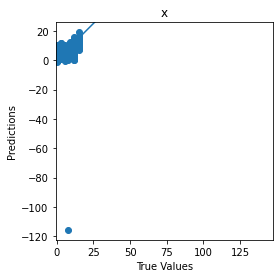

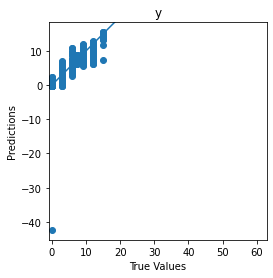

In [38]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

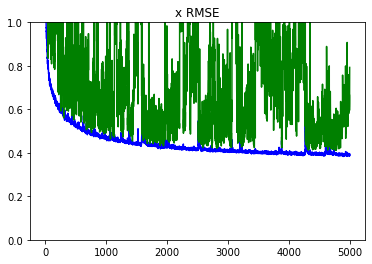

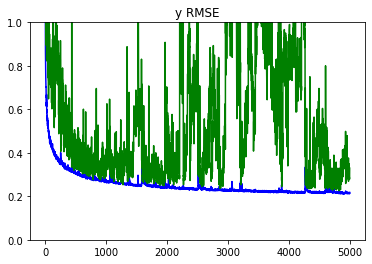

In [39]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [40]:
# Save model
model.save('./xyForcePlateN6/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlateN6/assets


In [ ]:
# Restore model
loaded_model = tf.keras.models.load_model('./xyForcePlate6/')

In [ ]:
dataVal.iloc[:,:4].shape

In [ ]:
# Run predict with restored model
predictions = loaded_model.predict(dataVal.iloc[:,:4])
x_pred = predictions[0]
y_pred = predictions[1]

In [ ]:
norm_test_X.shape

In [ ]:
norm_test_X[0]

In [ ]:
print(x_pred)

In [ ]:
print(dataVal.iloc[:,:4])

################################################################################